In [1]:
import numpy as np
import  matplotlib.pyplot as plt
from tensorflow import random
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import  mean_squared_error
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn
import seaborn as sns
import shap
import h5py
import joblib

###### Download the trained optimal model

In [2]:
#Optimal depth random forest model
modeldeepforest = joblib.load(filename="best_deepforest_modelzero_one.h5")
#Optimal neural network model
from tensorflow.keras.models import load_model  
modelkeras = load_model('best_keras_model.h5')
#Optimal catboost model
modelcb = joblib.load(filename="best_catboost_model.h5")
#Optimal decision tree model
modeldt = joblib.load(filename="best_decisiontree_model.h5")
#Optimal SVM model
modelsvm = joblib.load(filename="best_SVM_model.h5")
#Optimal Random forest model
modelrf = joblib.load(filename="best_RandomForest_model.h5")

###### Download test sets and training sets corresponding to each optimal model that may be used by some evaluations

In [3]:
#depth random forest
testx_deepforest = pd.read_excel('deepforest_best_test_x1zero_one.xlsx')
testy_deepforest = pd.read_excel('deepforest_best_test_y1zero_one.xlsx')
trainx_deepforest = pd.read_excel('deepforest_best_train_x1zero_one.xlsx')
# keras
testx_keras = pd.read_excel('keras_best_test_x1.xlsx')
testy_keras = pd.read_excel('keras_best_test_y1.xlsx')
trainx_keras = pd.read_excel('keras_best_train_x1.xlsx')
#catboost
testx_cb = pd.read_excel('best_testx1_cb.xlsx')
testy_cb = pd.read_excel('best_testy1_cb.xlsx')
trainx_cb = pd.read_excel('best_trainx1_cb.xlsx')
#decision tree
testx_dt = pd.read_excel('best_testx1_dt.xlsx')
testy_dt = pd.read_excel('best_testy1_dt.xlsx')
trainx_dt = pd.read_excel('best_trainx1_dt.xlsx')
#SVM
testx_svm = pd.read_excel('best_testx1_sv.xlsx')
testy_svm = pd.read_excel('best_testy1_sv.xlsx')
trainx_svm = pd.read_excel('best_trainx1_sv.xlsx')
#Random forest
testx_rf = pd.read_excel('best_testx1_rf.xlsx')
testy_rf = pd.read_excel('best_testy1_rf.xlsx')
trainx_rf = pd.read_excel('best_trainx1_rf.xlsx')

###### Random forest

In [5]:
predy_deepforest = modeldeepforest.predict(testx_deepforest)
predy_keras = modelkeras.predict(testx_keras)
predy_cb = modelcb.predict(testx_cb)
predy_dt = modeldt.predict(testx_dt)
predy_svm = modelsvm.predict(testx_svm)
predy_rf = modelrf.predict(testx_rf)

[2023-03-04 12:48:53.728] Start to evalute the model:
[2023-03-04 12:48:53.728] Evaluating cascade layer = 0 
[2023-03-04 12:48:53.787] Evaluating cascade layer = 1 


In [53]:
select_features3 = [ 'Age',  'Antiemetic regimen',
       'Anticipatory nausea and vomiting', 
       'Ccr']
select_features2 = [ 'Age', 'HED', 'Antiemetic regimen',
       'Anticipatory nausea and vomiting',
       'Drinking',
       'Ccr']
select_features1 = ['Gender', 'Age', 'HED', 'Antiemetic regimen',
       'Anticipatory nausea and vomiting', 
       'Nausea or vomiting in the prior cycle','Drinking',
       'Ccr','TBILI']

In [54]:
modeldeepforest0_1 = joblib.load(filename="best_deepforest_model_delectshape0.1.h5")
modeldeepforest0_2 = joblib.load(filename="best_deepforest_model_delectshape0.2.h5")
modeldeepforest0_3 = joblib.load(filename="best_deepforest_model_delectshape0.3.h5")
modeldeepforestNOSMOTE = joblib.load(filename="best_deepforest_model_delectshapenosmote.h5")

In [55]:
testx_deepforest0_1 = pd.read_excel('deepforest_best_test_x10.1.xlsx')[select_features1]
testy_deepforest0_1 = pd.read_excel('deepforest_best_test_y10.1.xlsx')

testx_deepforest0_2 = pd.read_excel('deepforest_best_test_x10.1.xlsx')[select_features2]
testy_deepforest0_2 = pd.read_excel('deepforest_best_test_y10.1.xlsx')

testx_deepforest0_3 = pd.read_excel('deepforest_best_test_x10.1.xlsx')[select_features3]
testy_deepforest0_3 = pd.read_excel('deepforest_best_test_y10.1.xlsx')

testx_deepforestNOSMOTE = pd.read_excel('deepforest_best_test_x10.1.xlsx')
testy_deepforestNOSMOTE = pd.read_excel('deepforest_best_test_y10.1.xlsx')


In [56]:
predy_deepforest0_1 = modeldeepforest0_1.predict(testx_deepforest0_1)
predy_deepforest0_2 = modeldeepforest0_2.predict(testx_deepforest0_2)
predy_deepforest0_3 = modeldeepforest0_3.predict(testx_deepforest0_3)
predy_deepforestNOSMOTE = modeldeepforestNOSMOTE.predict(testx_deepforestNOSMOTE)

[2023-03-04 14:59:56.310] Start to evalute the model:
[2023-03-04 14:59:56.310] Evaluating cascade layer = 0 
[2023-03-04 14:59:56.370] Evaluating cascade layer = 1 
[2023-03-04 14:59:56.433] Start to evalute the model:
[2023-03-04 14:59:56.433] Evaluating cascade layer = 0 
[2023-03-04 14:59:56.513] Evaluating cascade layer = 1 
[2023-03-04 14:59:56.579] Start to evalute the model:
[2023-03-04 14:59:56.579] Evaluating cascade layer = 0 
[2023-03-04 14:59:56.649] Evaluating cascade layer = 1 
[2023-03-04 14:59:56.709] Start to evalute the model:
[2023-03-04 14:59:56.709] Evaluating cascade layer = 0 
[2023-03-04 14:59:56.788] Evaluating cascade layer = 1 
[2023-03-04 14:59:56.842] Evaluating cascade layer = 2 


In [47]:
testy_deepforest0_1

CINV
0    0.01
1    0.99
2    0.99
3    0.01
4    0.01
..    ...
346  0.01
347  0.01
348  0.01
349  0.01
350  0.01

[351 rows x 1 columns]

In [35]:
roc_auc_score(testy_deepforest0_1,predy_deepforest0_1)

0.8233026343970872

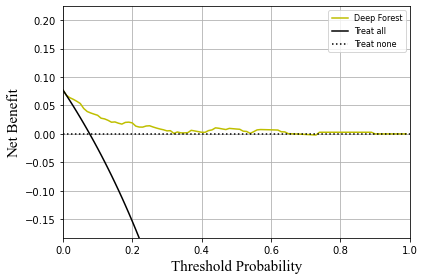

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model


def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all

if __name__ == '__main__':
    thresh_group = np.arange(0,1,0.01)
    
    #net_benefit_model0 = calculate_net_benefit_model(thresh_group, predy_deepforest0_1, testy_deepforest0_1)
    #net_benefit_mode20 = calculate_net_benefit_model(thresh_group, predy_deepforest0_2, testy_deepforest0_2)
    #net_benefit_mode30 = calculate_net_benefit_model(thresh_group, predy_deepforest0_3, testy_deepforest0_3)
    #net_benefit_modelNOSMOTE = calculate_net_benefit_model(thresh_group, predy_deepforestNOSMOTE, testy_deepforestNOSMOTE)
    net_benefit_model6 = calculate_net_benefit_model(thresh_group, predy_deepforest, testy_deepforest)
    net_benefit_all = calculate_net_benefit_all(thresh_group, testy_deepforest)
    
    #plt.plot(thresh_group, net_benefit_model0, color = 'royalblue', label = 'Deep Forest(Delect Shap<0.01)')
    #plt.plot(thresh_group, net_benefit_mode20, color = 'darkorange', label = 'Deep Forest(Delect Shap<0.02)')
    #plt.plot(thresh_group, net_benefit_mode30, color = 'forestgreen', label = 'Deep Forest(Delect Shap<0.03)')
    
    #plt.plot(thresh_group, net_benefit_modelNOSMOTE, color = 'red', label = 'Deep Forest(NO SMOTE)')
    plt.plot(thresh_group, net_benefit_model6, color = 'y', label = 'Deep Forest')
    
    
    plt.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
    plt.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')
    
    plt.xlim(0,1)
    plt.ylim(net_benefit_model0.min() - 0.15, net_benefit_model0.max() + 0.15)#adjustify the y axis limitation
    plt.xlabel(
        xlabel = 'Threshold Probability', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    plt.ylabel(
        ylabel = 'Net Benefit', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    plt.grid('major')
    #plt.spines['right'].set_color((0.9, 0.9, 0.9))
    #plt.spines['top'].set_color((0.9, 0.9, 0.9))
    plt.legend(loc = 'upper right',prop = {'size':8})
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('jueceaal.png', dpi = 300)
    plt.show()

In [1]:
import numpy as np
from scipy import stats
 
AUC_deepforest01 = [0.7457178940721446,0.7790476190476191,0.7875998225377108,0.820527441197434,0.8328369322412509]
AUC_deepforest02 = [0.7808185404339251,0.7721988622310166,0.7799546485260771,0.7979160692094447,0.8059210526315789]
AUC_deepforest03 = [0.7804069501600367,0.788955733808675,0.7794365721997301,0.7471605575632422,0.764725435447414]
AUC_deepforestNOSMOTE = [0.809005661712668,0.8003225806451613,0.8164516129032258,0.7797739541160593,0.7559709241952233]


averageValue = np.mean(AUC_deepforestNOSMOTE)
print("The sample mean is：", averageValue)
standardError = stats.sem(AUC_deepforestNOSMOTE)
print("Sample standard error：", standardError)

a = averageValue - 1.96 * standardError
b = averageValue + 1.96 * standardError
print("The interval estimate：[", a, "," ,b, "]")

The sample mean is： 0.7923049467144676
Sample standard error： 0.010962309955614645
The interval estimate：[ 0.7708188192014629 , 0.8137910742274723 ]


最佳阈值: 0.10300000000000001
[[228  88]
 [  6  28]]
              precision    recall  f1-score   support

           0    0.97436   0.72152   0.82909       316
           1    0.24138   0.82353   0.37333        34

    accuracy                        0.73143       350
   macro avg    0.60787   0.77252   0.60121       350
weighted avg    0.90316   0.73143   0.78482       350



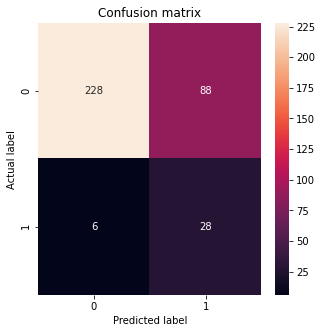

In [25]:
#deepforest
p = get_p(testy_deepforest0_1, predy_deepforest0_1)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_deepforest0_1)):
    if  predy_deepforest0_1[i] > p: #The prediction probability value is converted to the prediction label
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_deepforest0_1, pred_y_thr)
print(confusion_matrix(testy_deepforest0_1, pred_y_thr))
print(classification_report(testy_deepforest0_1, pred_y_thr, digits=5))

最佳阈值: 0.135
[[225  87]
 [  9  29]]
              precision    recall  f1-score   support

           0    0.96154   0.72115   0.82418       312
           1    0.25000   0.76316   0.37662        38

    accuracy                        0.72571       350
   macro avg    0.60577   0.74216   0.60040       350
weighted avg    0.88429   0.72571   0.77558       350



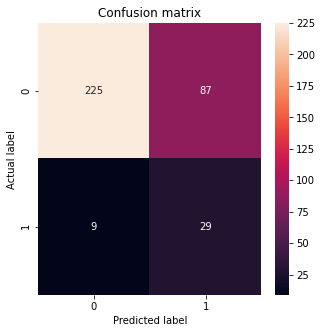

In [27]:
p = get_p(testy_deepforest0_2, predy_deepforest0_2)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_deepforest0_2)):
    if  predy_deepforest0_2[i] > p: 
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_deepforest0_2, pred_y_thr)
print(confusion_matrix(testy_deepforest0_2, pred_y_thr))
print(classification_report(testy_deepforest0_2, pred_y_thr, digits=5))

最佳阈值: 0.169
[[260  50]
 [ 12  28]]
              precision    recall  f1-score   support

           0    0.95588   0.83871   0.89347       310
           1    0.35897   0.70000   0.47458        40

    accuracy                        0.82286       350
   macro avg    0.65743   0.76935   0.68402       350
weighted avg    0.88766   0.82286   0.84560       350



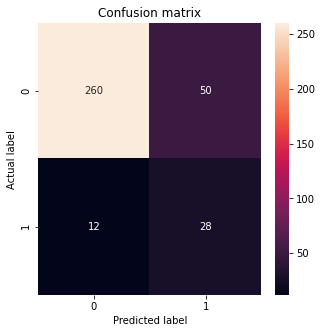

In [30]:
p = get_p(testy_deepforestNOSMOTE, predy_deepforestNOSMOTE)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_deepforestNOSMOTE)):
    if  predy_deepforestNOSMOTE[i] > p: 
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_deepforestNOSMOTE, pred_y_thr)
print(confusion_matrix(testy_deepforestNOSMOTE, pred_y_thr))
print(classification_report(testy_deepforestNOSMOTE, pred_y_thr, digits=5))

最佳阈值: 0.121
[[195 111]
 [  5  39]]
              precision    recall  f1-score   support

           0    0.97500   0.63725   0.77075       306
           1    0.26000   0.88636   0.40206        44

    accuracy                        0.66857       350
   macro avg    0.61750   0.76181   0.58641       350
weighted avg    0.88511   0.66857   0.72440       350



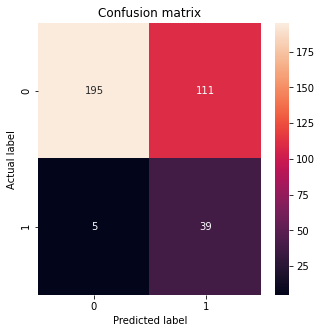

In [33]:
p = get_p(testy_deepforest0_3, predy_deepforest0_3)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_deepforest0_3)):
    if  predy_deepforest0_3[i] > p: 
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_deepforest0_3, pred_y_thr)
print(confusion_matrix(testy_deepforest0_3, pred_y_thr))
print(classification_report(testy_deepforest0_3, pred_y_thr, digits=5))

In [34]:
roc_auc_score(testy_deepforest0_3, pred_y_thr)

0.7618092691622103

###### ROC curve drawing

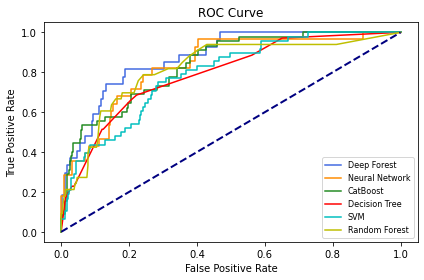

In [13]:
from sklearn.metrics import roc_curve
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
auc_deepforest = roc_auc_score(testy_deepforest,predy_deepforest)
auc_keras = roc_auc_score(testy_keras,predy_keras)
auc_cb = roc_auc_score(testy_cb,predy_cb)
auc_dt = roc_auc_score(testy_dt,predy_dt)
auc_sv = roc_auc_score(testy_svm,predy_svm)
auc_rf = roc_auc_score(testy_rf,predy_rf)

fpr0,tpr0, thresholds = roc_curve(testy_deepforest,predy_deepforest)
fpr,tpr, thresholds = roc_curve(testy_keras,predy_keras)
fpr2,tpr2, thresholds2 = roc_curve(testy_cb,predy_cb)
fpr3,tpr3, thresholds3 = roc_curve(testy_dt,predy_dt)
fpr4,tpr4, thresholds4 = roc_curve(testy_svm,predy_svm)
fpr5,tpr5, thresholds5 = roc_curve(testy_rf,predy_rf)

plt.plot(fpr0,tpr0,color='royalblue',label='Deep Forest')
plt.plot(fpr,tpr,color='darkorange',label='Neural Network')
plt.plot(fpr2,tpr2,color='forestgreen',label='CatBoost')
plt.plot(fpr3,tpr3,color='red',label='Decision Tree')
plt.plot(fpr4,tpr4,color='c',label='SVM')
plt.plot(fpr5,tpr5,color='y',label='Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right",prop = {'size':8})
plt.tight_layout()
plt.savefig('roc1',dpi=300)

plt.show()

###### Decision curve drawing

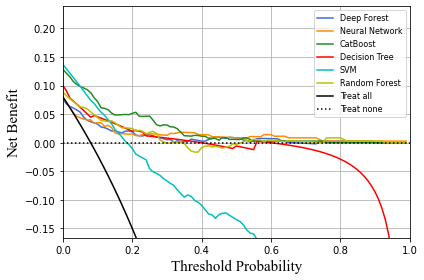

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model


def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all


def plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all):
    #Plot
    ax.plot(thresh_group, net_benefit_model, color = 'crimson', label = 'Model')
    ax.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
    ax.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')

    ax.set_xlim(0,1)
    ax.set_ylim(net_benefit_model.min() - 0.15, net_benefit_model.max() + 0.15)#adjustify the y axis limitation
    ax.set_xlabel(
        xlabel = 'Threshold Probability', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    ax.set_ylabel(
        ylabel = 'Net Benefit', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    ax.grid('major')
    ax.spines['right'].set_color((0.9, 0.9, 0.9))
    ax.spines['top'].set_color((0.9, 0.9, 0.9))
    ax.legend(loc = 'upper right')

    return ax


if __name__ == '__main__':
    thresh_group = np.arange(0,1,0.01)
    
    net_benefit_model0 = calculate_net_benefit_model(thresh_group, predy_deepforest, testy_deepforest)
    net_benefit_model1 = calculate_net_benefit_model(thresh_group, predy_keras, testy_keras)
    net_benefit_model2 = calculate_net_benefit_model(thresh_group, predy_cb, testy_cb)
    net_benefit_model3 = calculate_net_benefit_model(thresh_group, predy_dt, testy_dt)
    net_benefit_model4 = calculate_net_benefit_model(thresh_group, predy_svm, testy_svm)
    net_benefit_model5 = calculate_net_benefit_model(thresh_group, predy_rf, testy_rf)
    net_benefit_all = calculate_net_benefit_all(thresh_group, testy_keras)
    
    plt.plot(thresh_group, net_benefit_model0, color = 'royalblue', label = 'Deep Forest')
    plt.plot(thresh_group, net_benefit_model1, color = 'darkorange', label = 'Neural Network')
    plt.plot(thresh_group, net_benefit_model2, color = 'forestgreen', label = 'CatBoost')
    plt.plot(thresh_group, net_benefit_model3, color = 'red', label = 'Decision Tree')
    plt.plot(thresh_group, net_benefit_model4, color = 'c', label = 'SVM')
    plt.plot(thresh_group, net_benefit_model5, color = 'y', label = 'Random Forest')
    
    plt.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
    plt.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')
    
    plt.xlim(0,1)
    plt.ylim(net_benefit_model5.min() - 0.15, net_benefit_model5.max() + 0.15)#adjustify the y axis limitation
    plt.xlabel(
        xlabel = 'Threshold Probability', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    plt.ylabel(
        ylabel = 'Net Benefit', 
        fontdict= {'family': 'Times New Roman', 'fontsize': 15}
        )
    plt.grid('major')
    #plt.spines['right'].set_color((0.9, 0.9, 0.9))
    #plt.spines['top'].set_color((0.9, 0.9, 0.9))
    plt.legend(loc = 'upper right',prop = {'size':8})
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig('juece.png', dpi = 300)
    plt.show()

###### Calibration curve drawing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
pre = []
estimators = [modeldeepforest,modelkeras,modelcb,modeldt,modelsvm,modelrf]
color1 = ['royalblue','darkorange','forestgreen','red','c','y']
fig, ax = plt.subplots(figsize=(8, 6))
X_testlist = [testx_deepforest,testx_keras,testx_cb,testx_dt,testx_svm,testx_rf]
Y_testlist = [testy_deepforest,testy_keras,testy_cb,testy_dt,testy_svm,testy_rf]
name = ['Deep Forest','Neural Network','CatBoost','Decision Tree','SVM','Random Forest']

for i, estimator in enumerate(estimators):
        proba = estimator.predict(X_testlist[i])
        pre.append(proba)
        scaler = MinMaxScaler(feature_range=(0,0.999))
        proba = scaler.fit_transform(np.reshape(np.array(estimator.predict(X_testlist[i])),(-1,1))) 
        trueproba, predproba = calibration_curve(Y_testlist[i], proba)
        print(roc_auc_score(Y_testlist[i], proba))
        bls = brier_score_loss(Y_testlist[i], proba, pos_label=1)
        ax.plot(trueproba, predproba, marker="o",color = color1[i], label='{}(Brier score={:.3f})'.format(name[i], bls))
ax.set_xlabel('Mean Predicted Probability')
ax.set_ylabel('True Probability')
ax.set_ylim(-0.05, 1.05)
ax.plot([0, 1], [0, 1], '--', c='k', label='Perfectly Clibration')
#ax.legend(loc='best')
ax.legend(loc="best",prop = {'size':11})
plt.tight_layout()
fig.savefig('calibration_df.png', dpi = 300)
plt.show()

NameError: name 'modeldeepforest' is not defined

###### shap model interpretation

In [64]:
#Visualize model features using SHAP
X_train1 = trainx_deepforest
X_test1 = testx_deepforest
explainer = shap.SamplingExplainer(modeldeepforest.predict, X_train1)
shap_values = explainer(X_test1)

[2023-03-01 08:30:13.842] Start to evalute the model:
[2023-03-01 08:30:13.843] Evaluating cascade layer = 0 
[2023-03-01 08:30:13.946] Evaluating cascade layer = 1 


  0%|          | 0/350 [00:00<?, ?it/s]

[2023-03-01 08:30:14.902] Start to evalute the model:
[2023-03-01 08:30:14.902] Evaluating cascade layer = 0 
[2023-03-01 08:30:14.941] Evaluating cascade layer = 1 
[2023-03-01 08:30:14.980] Start to evalute the model:
[2023-03-01 08:30:14.981] Evaluating cascade layer = 0 
[2023-03-01 08:30:15.018] Evaluating cascade layer = 1 
[2023-03-01 08:30:15.076] Start to evalute the model:
[2023-03-01 08:30:15.077] Evaluating cascade layer = 0 
[2023-03-01 08:30:15.124] Evaluating cascade layer = 1 
[2023-03-01 08:30:15.173] Start to evalute the model:
[2023-03-01 08:30:15.173] Evaluating cascade layer = 0 
[2023-03-01 08:30:15.207] Evaluating cascade layer = 1 
[2023-03-01 08:30:15.254] Start to evalute the model:
[2023-03-01 08:30:15.254] Evaluating cascade layer = 0 
[2023-03-01 08:30:15.301] Evaluating cascade layer = 1 
[2023-03-01 08:30:15.359] Start to evalute the model:
[2023-03-01 08:30:15.359] Evaluating cascade layer = 0 
[2023-03-01 08:30:15.395] Evaluating cascade layer = 1 
[202

[2023-03-01 08:30:21.096] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.138] Start to evalute the model:
[2023-03-01 08:30:21.138] Evaluating cascade layer = 0 
[2023-03-01 08:30:21.177] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.242] Start to evalute the model:
[2023-03-01 08:30:21.242] Evaluating cascade layer = 0 
[2023-03-01 08:30:21.290] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.329] Start to evalute the model:
[2023-03-01 08:30:21.329] Evaluating cascade layer = 0 
[2023-03-01 08:30:21.376] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.422] Start to evalute the model:
[2023-03-01 08:30:21.422] Evaluating cascade layer = 0 
[2023-03-01 08:30:21.469] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.526] Start to evalute the model:
[2023-03-01 08:30:21.527] Evaluating cascade layer = 0 
[2023-03-01 08:30:21.573] Evaluating cascade layer = 1 
[2023-03-01 08:30:21.620] Start to evalute the model:
[2023-03-01 08:30:21.621] Evaluating cascade layer = 0 
[202

[2023-03-01 08:30:27.689] Start to evalute the model:
[2023-03-01 08:30:27.689] Evaluating cascade layer = 0 
[2023-03-01 08:30:27.736] Evaluating cascade layer = 1 
[2023-03-01 08:30:27.783] Start to evalute the model:
[2023-03-01 08:30:27.783] Evaluating cascade layer = 0 
[2023-03-01 08:30:27.830] Evaluating cascade layer = 1 
[2023-03-01 08:30:27.877] Start to evalute the model:
[2023-03-01 08:30:27.877] Evaluating cascade layer = 0 
[2023-03-01 08:30:27.921] Evaluating cascade layer = 1 
[2023-03-01 08:30:27.968] Start to evalute the model:
[2023-03-01 08:30:27.968] Evaluating cascade layer = 0 
[2023-03-01 08:30:28.015] Evaluating cascade layer = 1 
[2023-03-01 08:30:28.061] Start to evalute the model:
[2023-03-01 08:30:28.061] Evaluating cascade layer = 0 
[2023-03-01 08:30:28.108] Evaluating cascade layer = 1 
[2023-03-01 08:30:29.050] Start to evalute the model:
[2023-03-01 08:30:29.050] Evaluating cascade layer = 0 
[2023-03-01 08:30:29.097] Evaluating cascade layer = 1 
[202

[2023-03-01 08:30:35.016] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.063] Start to evalute the model:
[2023-03-01 08:30:35.063] Evaluating cascade layer = 0 
[2023-03-01 08:30:35.110] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.157] Start to evalute the model:
[2023-03-01 08:30:35.157] Evaluating cascade layer = 0 
[2023-03-01 08:30:35.204] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.248] Start to evalute the model:
[2023-03-01 08:30:35.248] Evaluating cascade layer = 0 
[2023-03-01 08:30:35.295] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.342] Start to evalute the model:
[2023-03-01 08:30:35.342] Evaluating cascade layer = 0 
[2023-03-01 08:30:35.389] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.436] Start to evalute the model:
[2023-03-01 08:30:35.436] Evaluating cascade layer = 0 
[2023-03-01 08:30:35.478] Evaluating cascade layer = 1 
[2023-03-01 08:30:35.524] Start to evalute the model:
[2023-03-01 08:30:35.524] Evaluating cascade layer = 0 
[202

[2023-03-01 08:30:41.373] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.419] Start to evalute the model:
[2023-03-01 08:30:41.419] Evaluating cascade layer = 0 
[2023-03-01 08:30:41.466] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.529] Start to evalute the model:
[2023-03-01 08:30:41.529] Evaluating cascade layer = 0 
[2023-03-01 08:30:41.576] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.617] Start to evalute the model:
[2023-03-01 08:30:41.617] Evaluating cascade layer = 0 
[2023-03-01 08:30:41.664] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.711] Start to evalute the model:
[2023-03-01 08:30:41.711] Evaluating cascade layer = 0 
[2023-03-01 08:30:41.758] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.808] Start to evalute the model:
[2023-03-01 08:30:41.808] Evaluating cascade layer = 0 
[2023-03-01 08:30:41.855] Evaluating cascade layer = 1 
[2023-03-01 08:30:41.902] Start to evalute the model:
[2023-03-01 08:30:41.902] Evaluating cascade layer = 0 
[202

[2023-03-01 08:30:48.303] Evaluating cascade layer = 0 
[2023-03-01 08:30:48.368] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.306] Start to evalute the model:
[2023-03-01 08:30:49.306] Evaluating cascade layer = 0 
[2023-03-01 08:30:49.337] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.384] Start to evalute the model:
[2023-03-01 08:30:49.384] Evaluating cascade layer = 0 
[2023-03-01 08:30:49.431] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.478] Start to evalute the model:
[2023-03-01 08:30:49.478] Evaluating cascade layer = 0 
[2023-03-01 08:30:49.527] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.563] Start to evalute the model:
[2023-03-01 08:30:49.563] Evaluating cascade layer = 0 
[2023-03-01 08:30:49.610] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.657] Start to evalute the model:
[2023-03-01 08:30:49.657] Evaluating cascade layer = 0 
[2023-03-01 08:30:49.703] Evaluating cascade layer = 1 
[2023-03-01 08:30:49.761] Start to evalute the model:
[202

[2023-03-01 08:30:55.622] Evaluating cascade layer = 1 
[2023-03-01 08:30:55.669] Start to evalute the model:
[2023-03-01 08:30:55.669] Evaluating cascade layer = 0 
[2023-03-01 08:30:55.716] Evaluating cascade layer = 1 
[2023-03-01 08:30:55.763] Start to evalute the model:
[2023-03-01 08:30:55.763] Evaluating cascade layer = 0 
[2023-03-01 08:30:55.794] Evaluating cascade layer = 1 
[2023-03-01 08:30:55.845] Start to evalute the model:
[2023-03-01 08:30:55.845] Evaluating cascade layer = 0 
[2023-03-01 08:30:55.892] Evaluating cascade layer = 1 
[2023-03-01 08:30:55.939] Start to evalute the model:
[2023-03-01 08:30:55.939] Evaluating cascade layer = 0 
[2023-03-01 08:30:55.985] Evaluating cascade layer = 1 
[2023-03-01 08:30:56.032] Start to evalute the model:
[2023-03-01 08:30:56.032] Evaluating cascade layer = 0 
[2023-03-01 08:30:56.080] Evaluating cascade layer = 1 
[2023-03-01 08:30:56.127] Start to evalute the model:
[2023-03-01 08:30:56.127] Evaluating cascade layer = 0 
[202

[2023-03-01 08:31:02.552] Evaluating cascade layer = 0 
[2023-03-01 08:31:02.595] Evaluating cascade layer = 1 
[2023-03-01 08:31:02.642] Start to evalute the model:
[2023-03-01 08:31:02.642] Evaluating cascade layer = 0 
[2023-03-01 08:31:02.689] Evaluating cascade layer = 1 
[2023-03-01 08:31:02.736] Start to evalute the model:
[2023-03-01 08:31:02.736] Evaluating cascade layer = 0 
[2023-03-01 08:31:02.784] Evaluating cascade layer = 1 
[2023-03-01 08:31:02.830] Start to evalute the model:
[2023-03-01 08:31:02.830] Evaluating cascade layer = 0 
[2023-03-01 08:31:02.877] Evaluating cascade layer = 1 
[2023-03-01 08:31:02.924] Start to evalute the model:
[2023-03-01 08:31:02.924] Evaluating cascade layer = 0 
[2023-03-01 08:31:02.986] Evaluating cascade layer = 1 
[2023-03-01 08:31:03.939] Start to evalute the model:
[2023-03-01 08:31:03.939] Evaluating cascade layer = 0 
[2023-03-01 08:31:03.986] Evaluating cascade layer = 1 
[2023-03-01 08:31:04.064] Start to evalute the model:
[202

[2023-03-01 08:31:10.207] Start to evalute the model:
[2023-03-01 08:31:10.207] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.254] Evaluating cascade layer = 1 
[2023-03-01 08:31:10.301] Start to evalute the model:
[2023-03-01 08:31:10.301] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.379] Evaluating cascade layer = 1 
[2023-03-01 08:31:10.450] Start to evalute the model:
[2023-03-01 08:31:10.450] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.497] Evaluating cascade layer = 1 
[2023-03-01 08:31:10.544] Start to evalute the model:
[2023-03-01 08:31:10.544] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.591] Evaluating cascade layer = 1 
[2023-03-01 08:31:10.658] Start to evalute the model:
[2023-03-01 08:31:10.658] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.707] Evaluating cascade layer = 1 
[2023-03-01 08:31:10.754] Start to evalute the model:
[2023-03-01 08:31:10.754] Evaluating cascade layer = 0 
[2023-03-01 08:31:10.801] Evaluating cascade layer = 1 
[202

[2023-03-01 08:31:17.013] Start to evalute the model:
[2023-03-01 08:31:17.013] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.060] Evaluating cascade layer = 1 
[2023-03-01 08:31:17.107] Start to evalute the model:
[2023-03-01 08:31:17.107] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.154] Evaluating cascade layer = 1 
[2023-03-01 08:31:17.200] Start to evalute the model:
[2023-03-01 08:31:17.200] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.249] Evaluating cascade layer = 1 
[2023-03-01 08:31:17.296] Start to evalute the model:
[2023-03-01 08:31:17.296] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.343] Evaluating cascade layer = 1 
[2023-03-01 08:31:17.414] Start to evalute the model:
[2023-03-01 08:31:17.415] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.474] Evaluating cascade layer = 1 
[2023-03-01 08:31:17.536] Start to evalute the model:
[2023-03-01 08:31:17.536] Evaluating cascade layer = 0 
[2023-03-01 08:31:17.583] Evaluating cascade layer = 1 
[202

[2023-03-01 08:31:24.553] Start to evalute the model:
[2023-03-01 08:31:24.553] Evaluating cascade layer = 0 
[2023-03-01 08:31:24.613] Evaluating cascade layer = 1 
[2023-03-01 08:31:24.660] Start to evalute the model:
[2023-03-01 08:31:24.660] Evaluating cascade layer = 0 
[2023-03-01 08:31:24.706] Evaluating cascade layer = 1 
[2023-03-01 08:31:24.762] Start to evalute the model:
[2023-03-01 08:31:24.763] Evaluating cascade layer = 0 
[2023-03-01 08:31:24.806] Evaluating cascade layer = 1 
[2023-03-01 08:31:24.853] Start to evalute the model:
[2023-03-01 08:31:24.853] Evaluating cascade layer = 0 
[2023-03-01 08:31:24.900] Evaluating cascade layer = 1 
[2023-03-01 08:31:24.947] Start to evalute the model:
[2023-03-01 08:31:24.947] Evaluating cascade layer = 0 
[2023-03-01 08:31:24.997] Evaluating cascade layer = 1 
[2023-03-01 08:31:25.036] Start to evalute the model:
[2023-03-01 08:31:25.036] Evaluating cascade layer = 0 
[2023-03-01 08:31:25.082] Evaluating cascade layer = 1 
[202

[2023-03-01 08:31:31.062] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.110] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.157] Start to evalute the model:
[2023-03-01 08:31:31.157] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.204] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.251] Start to evalute the model:
[2023-03-01 08:31:31.251] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.298] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.345] Start to evalute the model:
[2023-03-01 08:31:31.345] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.392] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.438] Start to evalute the model:
[2023-03-01 08:31:31.438] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.478] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.541] Start to evalute the model:
[2023-03-01 08:31:31.541] Evaluating cascade layer = 0 
[2023-03-01 08:31:31.603] Evaluating cascade layer = 1 
[2023-03-01 08:31:31.673] Start to evalute the model:
[202

[2023-03-01 08:31:37.629] Start to evalute the model:
[2023-03-01 08:31:37.629] Evaluating cascade layer = 0 
[2023-03-01 08:31:37.676] Evaluating cascade layer = 1 
[2023-03-01 08:31:37.722] Start to evalute the model:
[2023-03-01 08:31:37.722] Evaluating cascade layer = 0 
[2023-03-01 08:31:37.769] Evaluating cascade layer = 1 
[2023-03-01 08:31:37.816] Start to evalute the model:
[2023-03-01 08:31:37.816] Evaluating cascade layer = 0 
[2023-03-01 08:31:37.860] Evaluating cascade layer = 1 
[2023-03-01 08:31:38.795] Start to evalute the model:
[2023-03-01 08:31:38.795] Evaluating cascade layer = 0 
[2023-03-01 08:31:38.826] Evaluating cascade layer = 1 
[2023-03-01 08:31:38.857] Start to evalute the model:
[2023-03-01 08:31:38.857] Evaluating cascade layer = 0 
[2023-03-01 08:31:38.904] Evaluating cascade layer = 1 
[2023-03-01 08:31:38.951] Start to evalute the model:
[2023-03-01 08:31:38.951] Evaluating cascade layer = 0 
[2023-03-01 08:31:39.010] Evaluating cascade layer = 1 
[202

[2023-03-01 08:31:44.861] Start to evalute the model:
[2023-03-01 08:31:44.861] Evaluating cascade layer = 0 
[2023-03-01 08:31:44.907] Evaluating cascade layer = 1 
[2023-03-01 08:31:44.954] Start to evalute the model:
[2023-03-01 08:31:44.954] Evaluating cascade layer = 0 
[2023-03-01 08:31:45.001] Evaluating cascade layer = 1 
[2023-03-01 08:31:45.048] Start to evalute the model:
[2023-03-01 08:31:45.048] Evaluating cascade layer = 0 
[2023-03-01 08:31:45.097] Evaluating cascade layer = 1 
[2023-03-01 08:31:45.144] Start to evalute the model:
[2023-03-01 08:31:45.144] Evaluating cascade layer = 0 
[2023-03-01 08:31:45.190] Evaluating cascade layer = 1 
[2023-03-01 08:31:45.237] Start to evalute the model:
[2023-03-01 08:31:45.237] Evaluating cascade layer = 0 
[2023-03-01 08:31:45.282] Evaluating cascade layer = 1 
[2023-03-01 08:31:45.329] Start to evalute the model:
[2023-03-01 08:31:45.329] Evaluating cascade layer = 0 
[2023-03-01 08:31:45.376] Evaluating cascade layer = 1 
[202

[2023-03-01 08:31:51.140] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.186] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.233] Start to evalute the model:
[2023-03-01 08:31:51.233] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.280] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.327] Start to evalute the model:
[2023-03-01 08:31:51.327] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.375] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.421] Start to evalute the model:
[2023-03-01 08:31:51.421] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.468] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.515] Start to evalute the model:
[2023-03-01 08:31:51.515] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.562] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.609] Start to evalute the model:
[2023-03-01 08:31:51.609] Evaluating cascade layer = 0 
[2023-03-01 08:31:51.656] Evaluating cascade layer = 1 
[2023-03-01 08:31:51.703] Start to evalute the model:
[202

[2023-03-01 08:31:58.912] Start to evalute the model:
[2023-03-01 08:31:58.912] Evaluating cascade layer = 0 
[2023-03-01 08:31:58.943] Evaluating cascade layer = 1 
[2023-03-01 08:31:58.974] Start to evalute the model:
[2023-03-01 08:31:58.990] Evaluating cascade layer = 0 
[2023-03-01 08:31:59.021] Evaluating cascade layer = 1 
[2023-03-01 08:31:59.068] Start to evalute the model:
[2023-03-01 08:31:59.068] Evaluating cascade layer = 0 
[2023-03-01 08:31:59.136] Evaluating cascade layer = 1 
[2023-03-01 08:31:59.198] Start to evalute the model:
[2023-03-01 08:31:59.198] Evaluating cascade layer = 0 
[2023-03-01 08:31:59.261] Evaluating cascade layer = 1 
[2023-03-01 08:31:59.308] Start to evalute the model:
[2023-03-01 08:31:59.308] Evaluating cascade layer = 0 
[2023-03-01 08:31:59.358] Evaluating cascade layer = 1 
[2023-03-01 08:31:59.405] Start to evalute the model:
[2023-03-01 08:31:59.405] Evaluating cascade layer = 0 
[2023-03-01 08:31:59.452] Evaluating cascade layer = 1 
[202

[2023-03-01 08:32:05.437] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.486] Evaluating cascade layer = 1 
[2023-03-01 08:32:05.533] Start to evalute the model:
[2023-03-01 08:32:05.533] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.580] Evaluating cascade layer = 1 
[2023-03-01 08:32:05.626] Start to evalute the model:
[2023-03-01 08:32:05.626] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.673] Evaluating cascade layer = 1 
[2023-03-01 08:32:05.720] Start to evalute the model:
[2023-03-01 08:32:05.720] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.767] Evaluating cascade layer = 1 
[2023-03-01 08:32:05.814] Start to evalute the model:
[2023-03-01 08:32:05.814] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.861] Evaluating cascade layer = 1 
[2023-03-01 08:32:05.908] Start to evalute the model:
[2023-03-01 08:32:05.908] Evaluating cascade layer = 0 
[2023-03-01 08:32:05.955] Evaluating cascade layer = 1 
[2023-03-01 08:32:06.001] Start to evalute the model:
[202

[2023-03-01 08:32:11.736] Evaluating cascade layer = 0 
[2023-03-01 08:32:11.791] Evaluating cascade layer = 1 
[2023-03-01 08:32:11.837] Start to evalute the model:
[2023-03-01 08:32:11.837] Evaluating cascade layer = 0 
[2023-03-01 08:32:11.884] Evaluating cascade layer = 1 
[2023-03-01 08:32:11.931] Start to evalute the model:
[2023-03-01 08:32:11.931] Evaluating cascade layer = 0 
[2023-03-01 08:32:11.979] Evaluating cascade layer = 1 
[2023-03-01 08:32:12.026] Start to evalute the model:
[2023-03-01 08:32:12.026] Evaluating cascade layer = 0 
[2023-03-01 08:32:12.073] Evaluating cascade layer = 1 
[2023-03-01 08:32:12.923] Start to evalute the model:
[2023-03-01 08:32:12.923] Evaluating cascade layer = 0 
[2023-03-01 08:32:12.970] Evaluating cascade layer = 1 
[2023-03-01 08:32:13.001] Start to evalute the model:
[2023-03-01 08:32:13.001] Evaluating cascade layer = 0 
[2023-03-01 08:32:13.048] Evaluating cascade layer = 1 
[2023-03-01 08:32:13.095] Start to evalute the model:
[202

[2023-03-01 08:32:18.924] Start to evalute the model:
[2023-03-01 08:32:18.924] Evaluating cascade layer = 0 
[2023-03-01 08:32:18.970] Evaluating cascade layer = 1 
[2023-03-01 08:32:19.017] Start to evalute the model:
[2023-03-01 08:32:19.017] Evaluating cascade layer = 0 
[2023-03-01 08:32:19.064] Evaluating cascade layer = 1 
[2023-03-01 08:32:19.111] Start to evalute the model:
[2023-03-01 08:32:19.111] Evaluating cascade layer = 0 
[2023-03-01 08:32:19.160] Evaluating cascade layer = 1 
[2023-03-01 08:32:19.207] Start to evalute the model:
[2023-03-01 08:32:19.207] Evaluating cascade layer = 0 
[2023-03-01 08:32:19.253] Evaluating cascade layer = 1 
[2023-03-01 08:32:19.300] Start to evalute the model:
[2023-03-01 08:32:19.300] Evaluating cascade layer = 0 
[2023-03-01 08:32:19.347] Evaluating cascade layer = 1 
[2023-03-01 08:32:19.394] Start to evalute the model:
[2023-03-01 08:32:19.394] Evaluating cascade layer = 0 
[2023-03-01 08:32:19.441] Evaluating cascade layer = 1 
[202

[2023-03-01 08:32:25.189] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.234] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.281] Start to evalute the model:
[2023-03-01 08:32:25.281] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.328] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.375] Start to evalute the model:
[2023-03-01 08:32:25.375] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.416] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.462] Start to evalute the model:
[2023-03-01 08:32:25.462] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.509] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.556] Start to evalute the model:
[2023-03-01 08:32:25.556] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.609] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.656] Start to evalute the model:
[2023-03-01 08:32:25.656] Evaluating cascade layer = 0 
[2023-03-01 08:32:25.703] Evaluating cascade layer = 1 
[2023-03-01 08:32:25.750] Start to evalute the model:
[202

[2023-03-01 08:32:32.257] Start to evalute the model:
[2023-03-01 08:32:32.257] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.288] Evaluating cascade layer = 1 
[2023-03-01 08:32:32.335] Start to evalute the model:
[2023-03-01 08:32:32.335] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.382] Evaluating cascade layer = 1 
[2023-03-01 08:32:32.429] Start to evalute the model:
[2023-03-01 08:32:32.429] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.464] Evaluating cascade layer = 1 
[2023-03-01 08:32:32.514] Start to evalute the model:
[2023-03-01 08:32:32.514] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.561] Evaluating cascade layer = 1 
[2023-03-01 08:32:32.608] Start to evalute the model:
[2023-03-01 08:32:32.608] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.655] Evaluating cascade layer = 1 
[2023-03-01 08:32:32.706] Start to evalute the model:
[2023-03-01 08:32:32.706] Evaluating cascade layer = 0 
[2023-03-01 08:32:32.753] Evaluating cascade layer = 1 
[202

[2023-03-01 08:32:38.700] Evaluating cascade layer = 1 
[2023-03-01 08:32:38.747] Start to evalute the model:
[2023-03-01 08:32:38.747] Evaluating cascade layer = 0 
[2023-03-01 08:32:38.794] Evaluating cascade layer = 1 
[2023-03-01 08:32:38.841] Start to evalute the model:
[2023-03-01 08:32:38.841] Evaluating cascade layer = 0 
[2023-03-01 08:32:38.887] Evaluating cascade layer = 1 
[2023-03-01 08:32:38.929] Start to evalute the model:
[2023-03-01 08:32:38.929] Evaluating cascade layer = 0 
[2023-03-01 08:32:38.976] Evaluating cascade layer = 1 
[2023-03-01 08:32:39.023] Start to evalute the model:
[2023-03-01 08:32:39.023] Evaluating cascade layer = 0 
[2023-03-01 08:32:39.070] Evaluating cascade layer = 1 
[2023-03-01 08:32:39.117] Start to evalute the model:
[2023-03-01 08:32:39.117] Evaluating cascade layer = 0 
[2023-03-01 08:32:39.167] Evaluating cascade layer = 1 
[2023-03-01 08:32:39.214] Start to evalute the model:
[2023-03-01 08:32:39.214] Evaluating cascade layer = 0 
[202

[2023-03-01 08:32:44.904] Evaluating cascade layer = 0 
[2023-03-01 08:32:44.952] Evaluating cascade layer = 1 
[2023-03-01 08:32:44.999] Start to evalute the model:
[2023-03-01 08:32:44.999] Evaluating cascade layer = 0 
[2023-03-01 08:32:45.045] Evaluating cascade layer = 1 
[2023-03-01 08:32:45.092] Start to evalute the model:
[2023-03-01 08:32:45.092] Evaluating cascade layer = 0 
[2023-03-01 08:32:45.138] Evaluating cascade layer = 1 
[2023-03-01 08:32:45.185] Start to evalute the model:
[2023-03-01 08:32:45.185] Evaluating cascade layer = 0 
[2023-03-01 08:32:45.232] Evaluating cascade layer = 1 
[2023-03-01 08:32:46.086] Start to evalute the model:
[2023-03-01 08:32:46.086] Evaluating cascade layer = 0 
[2023-03-01 08:32:46.117] Evaluating cascade layer = 1 
[2023-03-01 08:32:46.164] Start to evalute the model:
[2023-03-01 08:32:46.164] Evaluating cascade layer = 0 
[2023-03-01 08:32:46.211] Evaluating cascade layer = 1 
[2023-03-01 08:32:46.258] Start to evalute the model:
[202

[2023-03-01 08:32:52.036] Start to evalute the model:
[2023-03-01 08:32:52.036] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.083] Evaluating cascade layer = 1 
[2023-03-01 08:32:52.130] Start to evalute the model:
[2023-03-01 08:32:52.130] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.177] Evaluating cascade layer = 1 
[2023-03-01 08:32:52.223] Start to evalute the model:
[2023-03-01 08:32:52.223] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.270] Evaluating cascade layer = 1 
[2023-03-01 08:32:52.317] Start to evalute the model:
[2023-03-01 08:32:52.317] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.364] Evaluating cascade layer = 1 
[2023-03-01 08:32:52.411] Start to evalute the model:
[2023-03-01 08:32:52.411] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.460] Evaluating cascade layer = 1 
[2023-03-01 08:32:52.507] Start to evalute the model:
[2023-03-01 08:32:52.507] Evaluating cascade layer = 0 
[2023-03-01 08:32:52.554] Evaluating cascade layer = 1 
[202

[2023-03-01 08:32:58.647] Start to evalute the model:
[2023-03-01 08:32:58.647] Evaluating cascade layer = 0 
[2023-03-01 08:32:58.694] Evaluating cascade layer = 1 
[2023-03-01 08:32:58.772] Start to evalute the model:
[2023-03-01 08:32:58.772] Evaluating cascade layer = 0 
[2023-03-01 08:32:58.819] Evaluating cascade layer = 1 
[2023-03-01 08:32:58.881] Start to evalute the model:
[2023-03-01 08:32:58.881] Evaluating cascade layer = 0 
[2023-03-01 08:32:58.928] Evaluating cascade layer = 1 
[2023-03-01 08:32:59.044] Start to evalute the model:
[2023-03-01 08:32:59.045] Evaluating cascade layer = 0 
[2023-03-01 08:32:59.127] Evaluating cascade layer = 1 
[2023-03-01 08:32:59.192] Start to evalute the model:
[2023-03-01 08:32:59.192] Evaluating cascade layer = 0 
[2023-03-01 08:32:59.249] Evaluating cascade layer = 1 
[2023-03-01 08:32:59.294] Start to evalute the model:
[2023-03-01 08:32:59.294] Evaluating cascade layer = 0 
[2023-03-01 08:32:59.354] Evaluating cascade layer = 1 
[202

[2023-03-01 08:33:07.084] Start to evalute the model:
[2023-03-01 08:33:07.084] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.130] Evaluating cascade layer = 1 
[2023-03-01 08:33:07.162] Start to evalute the model:
[2023-03-01 08:33:07.162] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.209] Evaluating cascade layer = 1 
[2023-03-01 08:33:07.255] Start to evalute the model:
[2023-03-01 08:33:07.255] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.302] Evaluating cascade layer = 1 
[2023-03-01 08:33:07.365] Start to evalute the model:
[2023-03-01 08:33:07.365] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.412] Evaluating cascade layer = 1 
[2023-03-01 08:33:07.458] Start to evalute the model:
[2023-03-01 08:33:07.458] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.552] Evaluating cascade layer = 1 
[2023-03-01 08:33:07.630] Start to evalute the model:
[2023-03-01 08:33:07.630] Evaluating cascade layer = 0 
[2023-03-01 08:33:07.677] Evaluating cascade layer = 1 
[202

[2023-03-01 08:33:14.023] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.070] Start to evalute the model:
[2023-03-01 08:33:14.085] Evaluating cascade layer = 0 
[2023-03-01 08:33:14.117] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.179] Start to evalute the model:
[2023-03-01 08:33:14.179] Evaluating cascade layer = 0 
[2023-03-01 08:33:14.226] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.273] Start to evalute the model:
[2023-03-01 08:33:14.273] Evaluating cascade layer = 0 
[2023-03-01 08:33:14.320] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.367] Start to evalute the model:
[2023-03-01 08:33:14.367] Evaluating cascade layer = 0 
[2023-03-01 08:33:14.413] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.460] Start to evalute the model:
[2023-03-01 08:33:14.460] Evaluating cascade layer = 0 
[2023-03-01 08:33:14.507] Evaluating cascade layer = 1 
[2023-03-01 08:33:14.554] Start to evalute the model:
[2023-03-01 08:33:14.554] Evaluating cascade layer = 0 
[202

[2023-03-01 08:33:20.631] Evaluating cascade layer = 0 
[2023-03-01 08:33:20.678] Evaluating cascade layer = 1 
[2023-03-01 08:33:20.725] Start to evalute the model:
[2023-03-01 08:33:20.725] Evaluating cascade layer = 0 
[2023-03-01 08:33:20.772] Evaluating cascade layer = 1 
[2023-03-01 08:33:20.819] Start to evalute the model:
[2023-03-01 08:33:20.819] Evaluating cascade layer = 0 
[2023-03-01 08:33:20.865] Evaluating cascade layer = 1 
[2023-03-01 08:33:20.912] Start to evalute the model:
[2023-03-01 08:33:20.912] Evaluating cascade layer = 0 
[2023-03-01 08:33:20.959] Evaluating cascade layer = 1 
[2023-03-01 08:33:21.803] Start to evalute the model:
[2023-03-01 08:33:21.803] Evaluating cascade layer = 0 
[2023-03-01 08:33:21.850] Evaluating cascade layer = 1 
[2023-03-01 08:33:21.881] Start to evalute the model:
[2023-03-01 08:33:21.881] Evaluating cascade layer = 0 
[2023-03-01 08:33:21.928] Evaluating cascade layer = 1 
[2023-03-01 08:33:21.975] Start to evalute the model:
[202

[2023-03-01 08:33:28.036] Start to evalute the model:
[2023-03-01 08:33:28.036] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.083] Evaluating cascade layer = 1 
[2023-03-01 08:33:28.146] Start to evalute the model:
[2023-03-01 08:33:28.146] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.193] Evaluating cascade layer = 1 
[2023-03-01 08:33:28.243] Start to evalute the model:
[2023-03-01 08:33:28.243] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.293] Evaluating cascade layer = 1 
[2023-03-01 08:33:28.339] Start to evalute the model:
[2023-03-01 08:33:28.339] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.392] Evaluating cascade layer = 1 
[2023-03-01 08:33:28.446] Start to evalute the model:
[2023-03-01 08:33:28.446] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.497] Evaluating cascade layer = 1 
[2023-03-01 08:33:28.548] Start to evalute the model:
[2023-03-01 08:33:28.548] Evaluating cascade layer = 0 
[2023-03-01 08:33:28.596] Evaluating cascade layer = 1 
[202

[2023-03-01 08:33:35.149] Start to evalute the model:
[2023-03-01 08:33:35.149] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.203] Evaluating cascade layer = 1 
[2023-03-01 08:33:35.255] Start to evalute the model:
[2023-03-01 08:33:35.255] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.300] Evaluating cascade layer = 1 
[2023-03-01 08:33:35.340] Start to evalute the model:
[2023-03-01 08:33:35.340] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.387] Evaluating cascade layer = 1 
[2023-03-01 08:33:35.434] Start to evalute the model:
[2023-03-01 08:33:35.434] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.530] Evaluating cascade layer = 1 
[2023-03-01 08:33:35.594] Start to evalute the model:
[2023-03-01 08:33:35.594] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.641] Evaluating cascade layer = 1 
[2023-03-01 08:33:35.687] Start to evalute the model:
[2023-03-01 08:33:35.687] Evaluating cascade layer = 0 
[2023-03-01 08:33:35.742] Evaluating cascade layer = 1 
[202

[2023-03-01 08:33:42.755] Start to evalute the model:
[2023-03-01 08:33:42.756] Evaluating cascade layer = 0 
[2023-03-01 08:33:42.794] Evaluating cascade layer = 1 
[2023-03-01 08:33:42.825] Start to evalute the model:
[2023-03-01 08:33:42.825] Evaluating cascade layer = 0 
[2023-03-01 08:33:42.872] Evaluating cascade layer = 1 
[2023-03-01 08:33:42.919] Start to evalute the model:
[2023-03-01 08:33:42.919] Evaluating cascade layer = 0 
[2023-03-01 08:33:42.965] Evaluating cascade layer = 1 
[2023-03-01 08:33:43.012] Start to evalute the model:
[2023-03-01 08:33:43.012] Evaluating cascade layer = 0 
[2023-03-01 08:33:43.059] Evaluating cascade layer = 1 
[2023-03-01 08:33:43.106] Start to evalute the model:
[2023-03-01 08:33:43.106] Evaluating cascade layer = 0 
[2023-03-01 08:33:43.165] Evaluating cascade layer = 1 
[2023-03-01 08:33:43.228] Start to evalute the model:
[2023-03-01 08:33:43.228] Evaluating cascade layer = 0 
[2023-03-01 08:33:43.290] Evaluating cascade layer = 1 
[202

[2023-03-01 08:33:49.485] Evaluating cascade layer = 1 
[2023-03-01 08:33:49.531] Start to evalute the model:
[2023-03-01 08:33:49.531] Evaluating cascade layer = 0 
[2023-03-01 08:33:49.578] Evaluating cascade layer = 1 
[2023-03-01 08:33:49.625] Start to evalute the model:
[2023-03-01 08:33:49.625] Evaluating cascade layer = 0 
[2023-03-01 08:33:49.675] Evaluating cascade layer = 1 
[2023-03-01 08:33:49.722] Start to evalute the model:
[2023-03-01 08:33:49.722] Evaluating cascade layer = 0 
[2023-03-01 08:33:49.771] Evaluating cascade layer = 1 
[2023-03-01 08:33:49.817] Start to evalute the model:
[2023-03-01 08:33:49.817] Evaluating cascade layer = 0 
[2023-03-01 08:33:49.864] Evaluating cascade layer = 1 
[2023-03-01 08:33:49.911] Start to evalute the model:
[2023-03-01 08:33:49.911] Evaluating cascade layer = 0 
[2023-03-01 08:33:49.958] Evaluating cascade layer = 1 
[2023-03-01 08:33:50.005] Start to evalute the model:
[2023-03-01 08:33:50.005] Evaluating cascade layer = 0 
[202

[2023-03-01 08:33:56.313] Evaluating cascade layer = 1 
[2023-03-01 08:33:56.363] Start to evalute the model:
[2023-03-01 08:33:56.363] Evaluating cascade layer = 0 
[2023-03-01 08:33:56.412] Evaluating cascade layer = 1 
[2023-03-01 08:33:56.463] Start to evalute the model:
[2023-03-01 08:33:56.463] Evaluating cascade layer = 0 
[2023-03-01 08:33:56.510] Evaluating cascade layer = 1 
[2023-03-01 08:33:56.547] Start to evalute the model:
[2023-03-01 08:33:56.547] Evaluating cascade layer = 0 
[2023-03-01 08:33:56.594] Evaluating cascade layer = 1 
[2023-03-01 08:33:56.656] Start to evalute the model:
[2023-03-01 08:33:56.656] Evaluating cascade layer = 0 
[2023-03-01 08:33:56.702] Evaluating cascade layer = 1 
[2023-03-01 08:33:57.624] Start to evalute the model:
[2023-03-01 08:33:57.624] Evaluating cascade layer = 0 
[2023-03-01 08:33:57.663] Evaluating cascade layer = 1 
[2023-03-01 08:33:57.704] Start to evalute the model:
[2023-03-01 08:33:57.704] Evaluating cascade layer = 0 
[202

[2023-03-01 08:34:03.915] Evaluating cascade layer = 0 
[2023-03-01 08:34:03.962] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.018] Start to evalute the model:
[2023-03-01 08:34:04.018] Evaluating cascade layer = 0 
[2023-03-01 08:34:04.069] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.127] Start to evalute the model:
[2023-03-01 08:34:04.127] Evaluating cascade layer = 0 
[2023-03-01 08:34:04.180] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.235] Start to evalute the model:
[2023-03-01 08:34:04.236] Evaluating cascade layer = 0 
[2023-03-01 08:34:04.271] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.334] Start to evalute the model:
[2023-03-01 08:34:04.334] Evaluating cascade layer = 0 
[2023-03-01 08:34:04.412] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.474] Start to evalute the model:
[2023-03-01 08:34:04.474] Evaluating cascade layer = 0 
[2023-03-01 08:34:04.521] Evaluating cascade layer = 1 
[2023-03-01 08:34:04.568] Start to evalute the model:
[202

[2023-03-01 08:34:11.022] Start to evalute the model:
[2023-03-01 08:34:11.022] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.068] Evaluating cascade layer = 1 
[2023-03-01 08:34:11.120] Start to evalute the model:
[2023-03-01 08:34:11.120] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.165] Evaluating cascade layer = 1 
[2023-03-01 08:34:11.217] Start to evalute the model:
[2023-03-01 08:34:11.221] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.273] Evaluating cascade layer = 1 
[2023-03-01 08:34:11.325] Start to evalute the model:
[2023-03-01 08:34:11.326] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.377] Evaluating cascade layer = 1 
[2023-03-01 08:34:11.424] Start to evalute the model:
[2023-03-01 08:34:11.424] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.476] Evaluating cascade layer = 1 
[2023-03-01 08:34:11.524] Start to evalute the model:
[2023-03-01 08:34:11.524] Evaluating cascade layer = 0 
[2023-03-01 08:34:11.579] Evaluating cascade layer = 1 
[202

[2023-03-01 08:34:18.862] Start to evalute the model:
[2023-03-01 08:34:18.862] Evaluating cascade layer = 0 
[2023-03-01 08:34:18.893] Evaluating cascade layer = 1 
[2023-03-01 08:34:18.940] Start to evalute the model:
[2023-03-01 08:34:18.940] Evaluating cascade layer = 0 
[2023-03-01 08:34:18.987] Evaluating cascade layer = 1 
[2023-03-01 08:34:19.033] Start to evalute the model:
[2023-03-01 08:34:19.033] Evaluating cascade layer = 0 
[2023-03-01 08:34:19.080] Evaluating cascade layer = 1 
[2023-03-01 08:34:19.127] Start to evalute the model:
[2023-03-01 08:34:19.127] Evaluating cascade layer = 0 
[2023-03-01 08:34:19.174] Evaluating cascade layer = 1 
[2023-03-01 08:34:19.221] Start to evalute the model:
[2023-03-01 08:34:19.221] Evaluating cascade layer = 0 
[2023-03-01 08:34:19.268] Evaluating cascade layer = 1 
[2023-03-01 08:34:19.315] Start to evalute the model:
[2023-03-01 08:34:19.315] Evaluating cascade layer = 0 
[2023-03-01 08:34:19.361] Evaluating cascade layer = 1 
[202

[2023-03-01 08:34:25.319] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.369] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.416] Start to evalute the model:
[2023-03-01 08:34:25.416] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.463] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.511] Start to evalute the model:
[2023-03-01 08:34:25.512] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.555] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.609] Start to evalute the model:
[2023-03-01 08:34:25.609] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.656] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.700] Start to evalute the model:
[2023-03-01 08:34:25.700] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.747] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.798] Start to evalute the model:
[2023-03-01 08:34:25.798] Evaluating cascade layer = 0 
[2023-03-01 08:34:25.847] Evaluating cascade layer = 1 
[2023-03-01 08:34:25.895] Start to evalute the model:
[202

[2023-03-01 08:34:31.865] Start to evalute the model:
[2023-03-01 08:34:31.865] Evaluating cascade layer = 0 
[2023-03-01 08:34:31.912] Evaluating cascade layer = 1 
[2023-03-01 08:34:31.959] Start to evalute the model:
[2023-03-01 08:34:31.959] Evaluating cascade layer = 0 
[2023-03-01 08:34:32.006] Evaluating cascade layer = 1 
[2023-03-01 08:34:32.053] Start to evalute the model:
[2023-03-01 08:34:32.053] Evaluating cascade layer = 0 
[2023-03-01 08:34:32.100] Evaluating cascade layer = 1 
[2023-03-01 08:34:32.952] Start to evalute the model:
[2023-03-01 08:34:32.953] Evaluating cascade layer = 0 
[2023-03-01 08:34:32.995] Evaluating cascade layer = 1 
[2023-03-01 08:34:33.037] Start to evalute the model:
[2023-03-01 08:34:33.037] Evaluating cascade layer = 0 
[2023-03-01 08:34:33.086] Evaluating cascade layer = 1 
[2023-03-01 08:34:33.141] Start to evalute the model:
[2023-03-01 08:34:33.141] Evaluating cascade layer = 0 
[2023-03-01 08:34:33.194] Evaluating cascade layer = 1 
[202

[2023-03-01 08:34:39.064] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.113] Start to evalute the model:
[2023-03-01 08:34:39.113] Evaluating cascade layer = 0 
[2023-03-01 08:34:39.160] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.207] Start to evalute the model:
[2023-03-01 08:34:39.207] Evaluating cascade layer = 0 
[2023-03-01 08:34:39.254] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.301] Start to evalute the model:
[2023-03-01 08:34:39.301] Evaluating cascade layer = 0 
[2023-03-01 08:34:39.348] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.394] Start to evalute the model:
[2023-03-01 08:34:39.394] Evaluating cascade layer = 0 
[2023-03-01 08:34:39.441] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.488] Start to evalute the model:
[2023-03-01 08:34:39.488] Evaluating cascade layer = 0 
[2023-03-01 08:34:39.536] Evaluating cascade layer = 1 
[2023-03-01 08:34:39.583] Start to evalute the model:
[2023-03-01 08:34:39.583] Evaluating cascade layer = 0 
[202

[2023-03-01 08:34:45.493] Evaluating cascade layer = 0 
[2023-03-01 08:34:45.543] Evaluating cascade layer = 1 
[2023-03-01 08:34:45.590] Start to evalute the model:
[2023-03-01 08:34:45.590] Evaluating cascade layer = 0 
[2023-03-01 08:34:45.637] Evaluating cascade layer = 1 
[2023-03-01 08:34:45.688] Start to evalute the model:
[2023-03-01 08:34:45.688] Evaluating cascade layer = 0 
[2023-03-01 08:34:45.724] Evaluating cascade layer = 1 
[2023-03-01 08:34:45.771] Start to evalute the model:
[2023-03-01 08:34:45.771] Evaluating cascade layer = 0 
[2023-03-01 08:34:45.818] Evaluating cascade layer = 1 
[2023-03-01 08:34:45.865] Start to evalute the model:
[2023-03-01 08:34:45.865] Evaluating cascade layer = 0 
[2023-03-01 08:34:45.916] Evaluating cascade layer = 1 
[2023-03-01 08:34:45.963] Start to evalute the model:
[2023-03-01 08:34:45.963] Evaluating cascade layer = 0 
[2023-03-01 08:34:46.010] Evaluating cascade layer = 1 
[2023-03-01 08:34:46.057] Start to evalute the model:
[202

[2023-03-01 08:34:51.891] Start to evalute the model:
[2023-03-01 08:34:51.891] Evaluating cascade layer = 0 
[2023-03-01 08:34:51.938] Evaluating cascade layer = 1 
[2023-03-01 08:34:52.860] Start to evalute the model:
[2023-03-01 08:34:52.860] Evaluating cascade layer = 0 
[2023-03-01 08:34:52.897] Evaluating cascade layer = 1 
[2023-03-01 08:34:52.928] Start to evalute the model:
[2023-03-01 08:34:52.928] Evaluating cascade layer = 0 
[2023-03-01 08:34:52.975] Evaluating cascade layer = 1 
[2023-03-01 08:34:53.022] Start to evalute the model:
[2023-03-01 08:34:53.022] Evaluating cascade layer = 0 
[2023-03-01 08:34:53.070] Evaluating cascade layer = 1 
[2023-03-01 08:34:53.135] Start to evalute the model:
[2023-03-01 08:34:53.135] Evaluating cascade layer = 0 
[2023-03-01 08:34:53.185] Evaluating cascade layer = 1 
[2023-03-01 08:34:53.223] Start to evalute the model:
[2023-03-01 08:34:53.223] Evaluating cascade layer = 0 
[2023-03-01 08:34:53.283] Evaluating cascade layer = 1 
[202

[2023-03-01 08:34:59.133] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.190] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.237] Start to evalute the model:
[2023-03-01 08:34:59.237] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.284] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.335] Start to evalute the model:
[2023-03-01 08:34:59.335] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.384] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.431] Start to evalute the model:
[2023-03-01 08:34:59.431] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.478] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.525] Start to evalute the model:
[2023-03-01 08:34:59.525] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.564] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.611] Start to evalute the model:
[2023-03-01 08:34:59.611] Evaluating cascade layer = 0 
[2023-03-01 08:34:59.658] Evaluating cascade layer = 1 
[2023-03-01 08:34:59.704] Start to evalute the model:
[202

[2023-03-01 08:35:05.489] Evaluating cascade layer = 0 
[2023-03-01 08:35:05.544] Evaluating cascade layer = 1 
[2023-03-01 08:35:05.591] Start to evalute the model:
[2023-03-01 08:35:05.591] Evaluating cascade layer = 0 
[2023-03-01 08:35:05.638] Evaluating cascade layer = 1 
[2023-03-01 08:35:05.689] Start to evalute the model:
[2023-03-01 08:35:05.689] Evaluating cascade layer = 0 
[2023-03-01 08:35:05.739] Evaluating cascade layer = 1 
[2023-03-01 08:35:05.785] Start to evalute the model:
[2023-03-01 08:35:05.785] Evaluating cascade layer = 0 
[2023-03-01 08:35:05.832] Evaluating cascade layer = 1 
[2023-03-01 08:35:05.879] Start to evalute the model:
[2023-03-01 08:35:05.879] Evaluating cascade layer = 0 
[2023-03-01 08:35:05.924] Evaluating cascade layer = 1 
[2023-03-01 08:35:05.971] Start to evalute the model:
[2023-03-01 08:35:05.971] Evaluating cascade layer = 0 
[2023-03-01 08:35:06.018] Evaluating cascade layer = 1 
[2023-03-01 08:35:06.880] Start to evalute the model:
[202

[2023-03-01 08:35:12.920] Evaluating cascade layer = 1 
[2023-03-01 08:35:12.987] Start to evalute the model:
[2023-03-01 08:35:12.987] Evaluating cascade layer = 0 
[2023-03-01 08:35:13.065] Evaluating cascade layer = 1 
[2023-03-01 08:35:13.112] Start to evalute the model:
[2023-03-01 08:35:13.112] Evaluating cascade layer = 0 
[2023-03-01 08:35:13.161] Evaluating cascade layer = 1 
[2023-03-01 08:35:13.207] Start to evalute the model:
[2023-03-01 08:35:13.207] Evaluating cascade layer = 0 
[2023-03-01 08:35:13.254] Evaluating cascade layer = 1 
[2023-03-01 08:35:13.301] Start to evalute the model:
[2023-03-01 08:35:13.301] Evaluating cascade layer = 0 
[2023-03-01 08:35:13.350] Evaluating cascade layer = 1 
[2023-03-01 08:35:13.397] Start to evalute the model:
[2023-03-01 08:35:13.397] Evaluating cascade layer = 0 
[2023-03-01 08:35:13.444] Evaluating cascade layer = 1 
[2023-03-01 08:35:13.490] Start to evalute the model:
[2023-03-01 08:35:13.490] Evaluating cascade layer = 0 
[202

[2023-03-01 08:35:19.461] Start to evalute the model:
[2023-03-01 08:35:19.476] Evaluating cascade layer = 0 
[2023-03-01 08:35:19.517] Evaluating cascade layer = 1 
[2023-03-01 08:35:19.564] Start to evalute the model:
[2023-03-01 08:35:19.564] Evaluating cascade layer = 0 
[2023-03-01 08:35:19.610] Evaluating cascade layer = 1 
[2023-03-01 08:35:19.657] Start to evalute the model:
[2023-03-01 08:35:19.673] Evaluating cascade layer = 0 
[2023-03-01 08:35:19.710] Evaluating cascade layer = 1 
[2023-03-01 08:35:19.788] Start to evalute the model:
[2023-03-01 08:35:19.788] Evaluating cascade layer = 0 
[2023-03-01 08:35:19.851] Evaluating cascade layer = 1 
[2023-03-01 08:35:19.904] Start to evalute the model:
[2023-03-01 08:35:19.904] Evaluating cascade layer = 0 
[2023-03-01 08:35:19.951] Evaluating cascade layer = 1 
[2023-03-01 08:35:19.997] Start to evalute the model:
[2023-03-01 08:35:19.997] Evaluating cascade layer = 0 
[2023-03-01 08:35:20.044] Evaluating cascade layer = 1 
[202

[2023-03-01 08:35:26.371] Evaluating cascade layer = 0 
[2023-03-01 08:35:26.426] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.272] Start to evalute the model:
[2023-03-01 08:35:27.272] Evaluating cascade layer = 0 
[2023-03-01 08:35:27.319] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.351] Start to evalute the model:
[2023-03-01 08:35:27.351] Evaluating cascade layer = 0 
[2023-03-01 08:35:27.397] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.444] Start to evalute the model:
[2023-03-01 08:35:27.444] Evaluating cascade layer = 0 
[2023-03-01 08:35:27.501] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.549] Start to evalute the model:
[2023-03-01 08:35:27.549] Evaluating cascade layer = 0 
[2023-03-01 08:35:27.581] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.643] Start to evalute the model:
[2023-03-01 08:35:27.643] Evaluating cascade layer = 0 
[2023-03-01 08:35:27.690] Evaluating cascade layer = 1 
[2023-03-01 08:35:27.730] Start to evalute the model:
[202

[2023-03-01 08:35:33.508] Evaluating cascade layer = 0 
[2023-03-01 08:35:33.565] Evaluating cascade layer = 1 
[2023-03-01 08:35:33.612] Start to evalute the model:
[2023-03-01 08:35:33.612] Evaluating cascade layer = 0 
[2023-03-01 08:35:33.659] Evaluating cascade layer = 1 
[2023-03-01 08:35:33.710] Start to evalute the model:
[2023-03-01 08:35:33.710] Evaluating cascade layer = 0 
[2023-03-01 08:35:33.744] Evaluating cascade layer = 1 
[2023-03-01 08:35:33.791] Start to evalute the model:
[2023-03-01 08:35:33.807] Evaluating cascade layer = 0 
[2023-03-01 08:35:33.838] Evaluating cascade layer = 1 
[2023-03-01 08:35:33.885] Start to evalute the model:
[2023-03-01 08:35:33.900] Evaluating cascade layer = 0 
[2023-03-01 08:35:33.947] Evaluating cascade layer = 1 
[2023-03-01 08:35:33.994] Start to evalute the model:
[2023-03-01 08:35:33.994] Evaluating cascade layer = 0 
[2023-03-01 08:35:34.041] Evaluating cascade layer = 1 
[2023-03-01 08:35:34.088] Start to evalute the model:
[202

[2023-03-01 08:35:40.447] Evaluating cascade layer = 0 
[2023-03-01 08:35:40.496] Evaluating cascade layer = 1 
[2023-03-01 08:35:40.543] Start to evalute the model:
[2023-03-01 08:35:40.543] Evaluating cascade layer = 0 
[2023-03-01 08:35:40.590] Evaluating cascade layer = 1 
[2023-03-01 08:35:40.637] Start to evalute the model:
[2023-03-01 08:35:40.637] Evaluating cascade layer = 0 
[2023-03-01 08:35:40.684] Evaluating cascade layer = 1 
[2023-03-01 08:35:40.730] Start to evalute the model:
[2023-03-01 08:35:40.730] Evaluating cascade layer = 0 
[2023-03-01 08:35:40.777] Evaluating cascade layer = 1 
[2023-03-01 08:35:40.824] Start to evalute the model:
[2023-03-01 08:35:40.824] Evaluating cascade layer = 0 
[2023-03-01 08:35:40.871] Evaluating cascade layer = 1 
[2023-03-01 08:35:41.741] Start to evalute the model:
[2023-03-01 08:35:41.741] Evaluating cascade layer = 0 
[2023-03-01 08:35:41.773] Evaluating cascade layer = 1 
[2023-03-01 08:35:41.819] Start to evalute the model:
[202

[2023-03-01 08:35:47.739] Start to evalute the model:
[2023-03-01 08:35:47.739] Evaluating cascade layer = 0 
[2023-03-01 08:35:47.786] Evaluating cascade layer = 1 
[2023-03-01 08:35:47.833] Start to evalute the model:
[2023-03-01 08:35:47.833] Evaluating cascade layer = 0 
[2023-03-01 08:35:47.880] Evaluating cascade layer = 1 
[2023-03-01 08:35:47.927] Start to evalute the model:
[2023-03-01 08:35:47.927] Evaluating cascade layer = 0 
[2023-03-01 08:35:47.974] Evaluating cascade layer = 1 
[2023-03-01 08:35:48.020] Start to evalute the model:
[2023-03-01 08:35:48.020] Evaluating cascade layer = 0 
[2023-03-01 08:35:48.067] Evaluating cascade layer = 1 
[2023-03-01 08:35:48.114] Start to evalute the model:
[2023-03-01 08:35:48.114] Evaluating cascade layer = 0 
[2023-03-01 08:35:48.161] Evaluating cascade layer = 1 
[2023-03-01 08:35:48.208] Start to evalute the model:
[2023-03-01 08:35:48.208] Evaluating cascade layer = 0 
[2023-03-01 08:35:48.255] Evaluating cascade layer = 1 
[202

[2023-03-01 08:35:53.984] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.031] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.078] Start to evalute the model:
[2023-03-01 08:35:54.078] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.125] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.172] Start to evalute the model:
[2023-03-01 08:35:54.172] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.212] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.258] Start to evalute the model:
[2023-03-01 08:35:54.258] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.305] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.352] Start to evalute the model:
[2023-03-01 08:35:54.352] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.403] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.450] Start to evalute the model:
[2023-03-01 08:35:54.450] Evaluating cascade layer = 0 
[2023-03-01 08:35:54.497] Evaluating cascade layer = 1 
[2023-03-01 08:35:54.544] Start to evalute the model:
[202

[2023-03-01 08:36:01.072] Start to evalute the model:
[2023-03-01 08:36:01.072] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.119] Evaluating cascade layer = 1 
[2023-03-01 08:36:01.150] Start to evalute the model:
[2023-03-01 08:36:01.150] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.197] Evaluating cascade layer = 1 
[2023-03-01 08:36:01.244] Start to evalute the model:
[2023-03-01 08:36:01.244] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.300] Evaluating cascade layer = 1 
[2023-03-01 08:36:01.347] Start to evalute the model:
[2023-03-01 08:36:01.347] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.394] Evaluating cascade layer = 1 
[2023-03-01 08:36:01.441] Start to evalute the model:
[2023-03-01 08:36:01.441] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.488] Evaluating cascade layer = 1 
[2023-03-01 08:36:01.529] Start to evalute the model:
[2023-03-01 08:36:01.529] Evaluating cascade layer = 0 
[2023-03-01 08:36:01.576] Evaluating cascade layer = 1 
[202

[2023-03-01 08:36:07.469] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.516] Evaluating cascade layer = 1 
[2023-03-01 08:36:07.571] Start to evalute the model:
[2023-03-01 08:36:07.571] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.618] Evaluating cascade layer = 1 
[2023-03-01 08:36:07.665] Start to evalute the model:
[2023-03-01 08:36:07.665] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.712] Evaluating cascade layer = 1 
[2023-03-01 08:36:07.759] Start to evalute the model:
[2023-03-01 08:36:07.759] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.805] Evaluating cascade layer = 1 
[2023-03-01 08:36:07.852] Start to evalute the model:
[2023-03-01 08:36:07.852] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.899] Evaluating cascade layer = 1 
[2023-03-01 08:36:07.946] Start to evalute the model:
[2023-03-01 08:36:07.946] Evaluating cascade layer = 0 
[2023-03-01 08:36:07.993] Evaluating cascade layer = 1 
[2023-03-01 08:36:08.040] Start to evalute the model:
[202

[2023-03-01 08:36:13.876] Start to evalute the model:
[2023-03-01 08:36:13.876] Evaluating cascade layer = 0 
[2023-03-01 08:36:13.925] Evaluating cascade layer = 1 
[2023-03-01 08:36:13.962] Start to evalute the model:
[2023-03-01 08:36:13.962] Evaluating cascade layer = 0 
[2023-03-01 08:36:14.009] Evaluating cascade layer = 1 
[2023-03-01 08:36:14.071] Start to evalute the model:
[2023-03-01 08:36:14.071] Evaluating cascade layer = 0 
[2023-03-01 08:36:14.114] Evaluating cascade layer = 1 
[2023-03-01 08:36:14.161] Start to evalute the model:
[2023-03-01 08:36:14.161] Evaluating cascade layer = 0 
[2023-03-01 08:36:14.208] Evaluating cascade layer = 1 
[2023-03-01 08:36:15.061] Start to evalute the model:
[2023-03-01 08:36:15.061] Evaluating cascade layer = 0 
[2023-03-01 08:36:15.093] Evaluating cascade layer = 1 
[2023-03-01 08:36:15.139] Start to evalute the model:
[2023-03-01 08:36:15.139] Evaluating cascade layer = 0 
[2023-03-01 08:36:15.186] Evaluating cascade layer = 1 
[202

[2023-03-01 08:36:21.446] Start to evalute the model:
[2023-03-01 08:36:21.446] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.493] Evaluating cascade layer = 1 
[2023-03-01 08:36:21.540] Start to evalute the model:
[2023-03-01 08:36:21.540] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.587] Evaluating cascade layer = 1 
[2023-03-01 08:36:21.634] Start to evalute the model:
[2023-03-01 08:36:21.634] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.677] Evaluating cascade layer = 1 
[2023-03-01 08:36:21.724] Start to evalute the model:
[2023-03-01 08:36:21.724] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.771] Evaluating cascade layer = 1 
[2023-03-01 08:36:21.818] Start to evalute the model:
[2023-03-01 08:36:21.818] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.865] Evaluating cascade layer = 1 
[2023-03-01 08:36:21.912] Start to evalute the model:
[2023-03-01 08:36:21.912] Evaluating cascade layer = 0 
[2023-03-01 08:36:21.958] Evaluating cascade layer = 1 
[202

[2023-03-01 08:36:28.136] Start to evalute the model:
[2023-03-01 08:36:28.136] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.183] Evaluating cascade layer = 1 
[2023-03-01 08:36:28.229] Start to evalute the model:
[2023-03-01 08:36:28.229] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.276] Evaluating cascade layer = 1 
[2023-03-01 08:36:28.323] Start to evalute the model:
[2023-03-01 08:36:28.323] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.364] Evaluating cascade layer = 1 
[2023-03-01 08:36:28.411] Start to evalute the model:
[2023-03-01 08:36:28.411] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.457] Evaluating cascade layer = 1 
[2023-03-01 08:36:28.504] Start to evalute the model:
[2023-03-01 08:36:28.504] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.557] Evaluating cascade layer = 1 
[2023-03-01 08:36:28.604] Start to evalute the model:
[2023-03-01 08:36:28.604] Evaluating cascade layer = 0 
[2023-03-01 08:36:28.650] Evaluating cascade layer = 1 
[202

[2023-03-01 08:36:35.479] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.525] Start to evalute the model:
[2023-03-01 08:36:35.525] Evaluating cascade layer = 0 
[2023-03-01 08:36:35.572] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.618] Start to evalute the model:
[2023-03-01 08:36:35.618] Evaluating cascade layer = 0 
[2023-03-01 08:36:35.665] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.716] Start to evalute the model:
[2023-03-01 08:36:35.716] Evaluating cascade layer = 0 
[2023-03-01 08:36:35.763] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.810] Start to evalute the model:
[2023-03-01 08:36:35.810] Evaluating cascade layer = 0 
[2023-03-01 08:36:35.857] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.904] Start to evalute the model:
[2023-03-01 08:36:35.904] Evaluating cascade layer = 0 
[2023-03-01 08:36:35.948] Evaluating cascade layer = 1 
[2023-03-01 08:36:35.995] Start to evalute the model:
[2023-03-01 08:36:35.995] Evaluating cascade layer = 0 
[202

[2023-03-01 08:36:41.783] Evaluating cascade layer = 0 
[2023-03-01 08:36:41.829] Evaluating cascade layer = 1 
[2023-03-01 08:36:41.875] Start to evalute the model:
[2023-03-01 08:36:41.875] Evaluating cascade layer = 0 
[2023-03-01 08:36:41.922] Evaluating cascade layer = 1 
[2023-03-01 08:36:41.969] Start to evalute the model:
[2023-03-01 08:36:41.969] Evaluating cascade layer = 0 
[2023-03-01 08:36:42.017] Evaluating cascade layer = 1 
[2023-03-01 08:36:42.064] Start to evalute the model:
[2023-03-01 08:36:42.064] Evaluating cascade layer = 0 
[2023-03-01 08:36:42.110] Evaluating cascade layer = 1 
[2023-03-01 08:36:42.157] Start to evalute the model:
[2023-03-01 08:36:42.157] Evaluating cascade layer = 0 
[2023-03-01 08:36:42.204] Evaluating cascade layer = 1 
[2023-03-01 08:36:42.251] Start to evalute the model:
[2023-03-01 08:36:42.251] Evaluating cascade layer = 0 
[2023-03-01 08:36:42.298] Evaluating cascade layer = 1 
[2023-03-01 08:36:42.345] Start to evalute the model:
[202

[2023-03-01 08:36:48.122] Evaluating cascade layer = 0 
[2023-03-01 08:36:48.163] Evaluating cascade layer = 1 
[2023-03-01 08:36:48.210] Start to evalute the model:
[2023-03-01 08:36:48.210] Evaluating cascade layer = 0 
[2023-03-01 08:36:48.256] Evaluating cascade layer = 1 
[2023-03-01 08:36:49.130] Start to evalute the model:
[2023-03-01 08:36:49.130] Evaluating cascade layer = 0 
[2023-03-01 08:36:49.161] Evaluating cascade layer = 1 
[2023-03-01 08:36:49.208] Start to evalute the model:
[2023-03-01 08:36:49.208] Evaluating cascade layer = 0 
[2023-03-01 08:36:49.255] Evaluating cascade layer = 1 
[2023-03-01 08:36:49.301] Start to evalute the model:
[2023-03-01 08:36:49.301] Evaluating cascade layer = 0 
[2023-03-01 08:36:49.351] Evaluating cascade layer = 1 
[2023-03-01 08:36:49.388] Start to evalute the model:
[2023-03-01 08:36:49.388] Evaluating cascade layer = 0 
[2023-03-01 08:36:49.435] Evaluating cascade layer = 1 
[2023-03-01 08:36:49.481] Start to evalute the model:
[202

[2023-03-01 08:36:55.239] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.288] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.335] Start to evalute the model:
[2023-03-01 08:36:55.335] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.381] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.450] Start to evalute the model:
[2023-03-01 08:36:55.450] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.483] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.530] Start to evalute the model:
[2023-03-01 08:36:55.530] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.577] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.624] Start to evalute the model:
[2023-03-01 08:36:55.624] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.675] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.722] Start to evalute the model:
[2023-03-01 08:36:55.722] Evaluating cascade layer = 0 
[2023-03-01 08:36:55.769] Evaluating cascade layer = 1 
[2023-03-01 08:36:55.815] Start to evalute the model:
[202

[2023-03-01 08:37:01.478] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.525] Evaluating cascade layer = 1 
[2023-03-01 08:37:01.572] Start to evalute the model:
[2023-03-01 08:37:01.572] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.619] Evaluating cascade layer = 1 
[2023-03-01 08:37:01.666] Start to evalute the model:
[2023-03-01 08:37:01.666] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.706] Evaluating cascade layer = 1 
[2023-03-01 08:37:01.752] Start to evalute the model:
[2023-03-01 08:37:01.752] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.799] Evaluating cascade layer = 1 
[2023-03-01 08:37:01.846] Start to evalute the model:
[2023-03-01 08:37:01.846] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.893] Evaluating cascade layer = 1 
[2023-03-01 08:37:01.940] Start to evalute the model:
[2023-03-01 08:37:01.940] Evaluating cascade layer = 0 
[2023-03-01 08:37:01.987] Evaluating cascade layer = 1 
[2023-03-01 08:37:02.837] Start to evalute the model:
[202

[2023-03-01 08:37:08.722] Evaluating cascade layer = 1 
[2023-03-01 08:37:08.755] Start to evalute the model:
[2023-03-01 08:37:08.755] Evaluating cascade layer = 0 
[2023-03-01 08:37:08.802] Evaluating cascade layer = 1 
[2023-03-01 08:37:08.849] Start to evalute the model:
[2023-03-01 08:37:08.849] Evaluating cascade layer = 0 
[2023-03-01 08:37:08.896] Evaluating cascade layer = 1 
[2023-03-01 08:37:08.954] Start to evalute the model:
[2023-03-01 08:37:08.954] Evaluating cascade layer = 0 
[2023-03-01 08:37:09.001] Evaluating cascade layer = 1 
[2023-03-01 08:37:09.048] Start to evalute the model:
[2023-03-01 08:37:09.048] Evaluating cascade layer = 0 
[2023-03-01 08:37:09.095] Evaluating cascade layer = 1 
[2023-03-01 08:37:09.141] Start to evalute the model:
[2023-03-01 08:37:09.141] Evaluating cascade layer = 0 
[2023-03-01 08:37:09.184] Evaluating cascade layer = 1 
[2023-03-01 08:37:09.231] Start to evalute the model:
[2023-03-01 08:37:09.231] Evaluating cascade layer = 0 
[202

[2023-03-01 08:37:15.114] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.157] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.204] Start to evalute the model:
[2023-03-01 08:37:15.204] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.251] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.298] Start to evalute the model:
[2023-03-01 08:37:15.298] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.352] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.399] Start to evalute the model:
[2023-03-01 08:37:15.399] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.445] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.492] Start to evalute the model:
[2023-03-01 08:37:15.492] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.539] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.586] Start to evalute the model:
[2023-03-01 08:37:15.586] Evaluating cascade layer = 0 
[2023-03-01 08:37:15.633] Evaluating cascade layer = 1 
[2023-03-01 08:37:15.680] Start to evalute the model:
[202

[2023-03-01 08:37:21.823] Start to evalute the model:
[2023-03-01 08:37:21.823] Evaluating cascade layer = 0 
[2023-03-01 08:37:21.870] Evaluating cascade layer = 1 
[2023-03-01 08:37:21.917] Start to evalute the model:
[2023-03-01 08:37:21.917] Evaluating cascade layer = 0 
[2023-03-01 08:37:21.963] Evaluating cascade layer = 1 
[2023-03-01 08:37:22.916] Start to evalute the model:
[2023-03-01 08:37:22.916] Evaluating cascade layer = 0 
[2023-03-01 08:37:22.963] Evaluating cascade layer = 1 
[2023-03-01 08:37:22.994] Start to evalute the model:
[2023-03-01 08:37:22.994] Evaluating cascade layer = 0 
[2023-03-01 08:37:23.041] Evaluating cascade layer = 1 
[2023-03-01 08:37:23.087] Start to evalute the model:
[2023-03-01 08:37:23.087] Evaluating cascade layer = 0 
[2023-03-01 08:37:23.142] Evaluating cascade layer = 1 
[2023-03-01 08:37:23.189] Start to evalute the model:
[2023-03-01 08:37:23.189] Evaluating cascade layer = 0 
[2023-03-01 08:37:23.235] Evaluating cascade layer = 1 
[202

[2023-03-01 08:37:29.343] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.394] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.440] Start to evalute the model:
[2023-03-01 08:37:29.440] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.487] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.534] Start to evalute the model:
[2023-03-01 08:37:29.534] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.581] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.628] Start to evalute the model:
[2023-03-01 08:37:29.628] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.675] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.722] Start to evalute the model:
[2023-03-01 08:37:29.722] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.775] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.822] Start to evalute the model:
[2023-03-01 08:37:29.822] Evaluating cascade layer = 0 
[2023-03-01 08:37:29.869] Evaluating cascade layer = 1 
[2023-03-01 08:37:29.920] Start to evalute the model:
[202

[2023-03-01 08:37:36.045] Start to evalute the model:
[2023-03-01 08:37:36.045] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.095] Evaluating cascade layer = 1 
[2023-03-01 08:37:36.142] Start to evalute the model:
[2023-03-01 08:37:36.142] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.184] Evaluating cascade layer = 1 
[2023-03-01 08:37:36.231] Start to evalute the model:
[2023-03-01 08:37:36.231] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.281] Evaluating cascade layer = 1 
[2023-03-01 08:37:36.328] Start to evalute the model:
[2023-03-01 08:37:36.328] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.375] Evaluating cascade layer = 1 
[2023-03-01 08:37:36.421] Start to evalute the model:
[2023-03-01 08:37:36.421] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.469] Evaluating cascade layer = 1 
[2023-03-01 08:37:36.516] Start to evalute the model:
[2023-03-01 08:37:36.516] Evaluating cascade layer = 0 
[2023-03-01 08:37:36.563] Evaluating cascade layer = 1 
[202

[2023-03-01 08:37:43.210] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.257] Start to evalute the model:
[2023-03-01 08:37:43.257] Evaluating cascade layer = 0 
[2023-03-01 08:37:43.304] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.351] Start to evalute the model:
[2023-03-01 08:37:43.351] Evaluating cascade layer = 0 
[2023-03-01 08:37:43.398] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.442] Start to evalute the model:
[2023-03-01 08:37:43.442] Evaluating cascade layer = 0 
[2023-03-01 08:37:43.488] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.535] Start to evalute the model:
[2023-03-01 08:37:43.535] Evaluating cascade layer = 0 
[2023-03-01 08:37:43.582] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.629] Start to evalute the model:
[2023-03-01 08:37:43.629] Evaluating cascade layer = 0 
[2023-03-01 08:37:43.670] Evaluating cascade layer = 1 
[2023-03-01 08:37:43.717] Start to evalute the model:
[2023-03-01 08:37:43.717] Evaluating cascade layer = 0 
[202

[2023-03-01 08:37:49.526] Evaluating cascade layer = 0 
[2023-03-01 08:37:49.573] Evaluating cascade layer = 1 
[2023-03-01 08:37:49.620] Start to evalute the model:
[2023-03-01 08:37:49.620] Evaluating cascade layer = 0 
[2023-03-01 08:37:49.667] Evaluating cascade layer = 1 
[2023-03-01 08:37:49.714] Start to evalute the model:
[2023-03-01 08:37:49.714] Evaluating cascade layer = 0 
[2023-03-01 08:37:49.761] Evaluating cascade layer = 1 
[2023-03-01 08:37:49.808] Start to evalute the model:
[2023-03-01 08:37:49.808] Evaluating cascade layer = 0 
[2023-03-01 08:37:49.855] Evaluating cascade layer = 1 
[2023-03-01 08:37:49.901] Start to evalute the model:
[2023-03-01 08:37:49.901] Evaluating cascade layer = 0 
[2023-03-01 08:37:49.956] Evaluating cascade layer = 1 
[2023-03-01 08:37:50.003] Start to evalute the model:
[2023-03-01 08:37:50.003] Evaluating cascade layer = 0 
[2023-03-01 08:37:50.050] Evaluating cascade layer = 1 
[2023-03-01 08:37:50.097] Start to evalute the model:
[202

[2023-03-01 08:37:55.930] Evaluating cascade layer = 0 
[2023-03-01 08:37:55.976] Evaluating cascade layer = 1 
[2023-03-01 08:37:56.023] Start to evalute the model:
[2023-03-01 08:37:56.023] Evaluating cascade layer = 0 
[2023-03-01 08:37:56.070] Evaluating cascade layer = 1 
[2023-03-01 08:37:56.910] Start to evalute the model:
[2023-03-01 08:37:56.910] Evaluating cascade layer = 0 
[2023-03-01 08:37:56.941] Evaluating cascade layer = 1 
[2023-03-01 08:37:56.988] Start to evalute the model:
[2023-03-01 08:37:56.988] Evaluating cascade layer = 0 
[2023-03-01 08:37:57.035] Evaluating cascade layer = 1 
[2023-03-01 08:37:57.082] Start to evalute the model:
[2023-03-01 08:37:57.082] Evaluating cascade layer = 0 
[2023-03-01 08:37:57.135] Evaluating cascade layer = 1 
[2023-03-01 08:37:57.182] Start to evalute the model:
[2023-03-01 08:37:57.182] Evaluating cascade layer = 0 
[2023-03-01 08:37:57.229] Evaluating cascade layer = 1 
[2023-03-01 08:37:57.276] Start to evalute the model:
[202

[2023-03-01 08:38:03.143] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.200] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.246] Start to evalute the model:
[2023-03-01 08:38:03.246] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.293] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.344] Start to evalute the model:
[2023-03-01 08:38:03.344] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.394] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.441] Start to evalute the model:
[2023-03-01 08:38:03.441] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.488] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.535] Start to evalute the model:
[2023-03-01 08:38:03.535] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.582] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.628] Start to evalute the model:
[2023-03-01 08:38:03.628] Evaluating cascade layer = 0 
[2023-03-01 08:38:03.675] Evaluating cascade layer = 1 
[2023-03-01 08:38:03.722] Start to evalute the model:
[202

[2023-03-01 08:38:09.486] Evaluating cascade layer = 0 
[2023-03-01 08:38:09.531] Evaluating cascade layer = 1 
[2023-03-01 08:38:09.578] Start to evalute the model:
[2023-03-01 08:38:09.578] Evaluating cascade layer = 0 
[2023-03-01 08:38:09.625] Evaluating cascade layer = 1 
[2023-03-01 08:38:09.672] Start to evalute the model:
[2023-03-01 08:38:09.672] Evaluating cascade layer = 0 
[2023-03-01 08:38:09.721] Evaluating cascade layer = 1 
[2023-03-01 08:38:09.767] Start to evalute the model:
[2023-03-01 08:38:09.767] Evaluating cascade layer = 0 
[2023-03-01 08:38:09.814] Evaluating cascade layer = 1 
[2023-03-01 08:38:09.861] Start to evalute the model:
[2023-03-01 08:38:09.861] Evaluating cascade layer = 0 
[2023-03-01 08:38:09.908] Evaluating cascade layer = 1 
[2023-03-01 08:38:09.955] Start to evalute the model:
[2023-03-01 08:38:09.955] Evaluating cascade layer = 0 
[2023-03-01 08:38:10.002] Evaluating cascade layer = 1 
[2023-03-01 08:38:10.863] Start to evalute the model:
[202

[2023-03-01 08:38:16.705] Evaluating cascade layer = 1 
[2023-03-01 08:38:16.752] Start to evalute the model:
[2023-03-01 08:38:16.752] Evaluating cascade layer = 0 
[2023-03-01 08:38:16.799] Evaluating cascade layer = 1 
[2023-03-01 08:38:16.846] Start to evalute the model:
[2023-03-01 08:38:16.846] Evaluating cascade layer = 0 
[2023-03-01 08:38:16.893] Evaluating cascade layer = 1 
[2023-03-01 08:38:16.935] Start to evalute the model:
[2023-03-01 08:38:16.935] Evaluating cascade layer = 0 
[2023-03-01 08:38:16.982] Evaluating cascade layer = 1 
[2023-03-01 08:38:17.029] Start to evalute the model:
[2023-03-01 08:38:17.029] Evaluating cascade layer = 0 
[2023-03-01 08:38:17.075] Evaluating cascade layer = 1 
[2023-03-01 08:38:17.122] Start to evalute the model:
[2023-03-01 08:38:17.122] Evaluating cascade layer = 0 
[2023-03-01 08:38:17.171] Evaluating cascade layer = 1 
[2023-03-01 08:38:17.218] Start to evalute the model:
[2023-03-01 08:38:17.218] Evaluating cascade layer = 0 
[202

[2023-03-01 08:38:23.170] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.214] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.261] Start to evalute the model:
[2023-03-01 08:38:23.261] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.308] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.354] Start to evalute the model:
[2023-03-01 08:38:23.354] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.400] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.446] Start to evalute the model:
[2023-03-01 08:38:23.446] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.493] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.540] Start to evalute the model:
[2023-03-01 08:38:23.540] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.595] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.632] Start to evalute the model:
[2023-03-01 08:38:23.632] Evaluating cascade layer = 0 
[2023-03-01 08:38:23.679] Evaluating cascade layer = 1 
[2023-03-01 08:38:23.726] Start to evalute the model:
[202

[2023-03-01 08:38:29.818] Start to evalute the model:
[2023-03-01 08:38:29.818] Evaluating cascade layer = 0 
[2023-03-01 08:38:29.876] Evaluating cascade layer = 1 
[2023-03-01 08:38:30.761] Start to evalute the model:
[2023-03-01 08:38:30.761] Evaluating cascade layer = 0 
[2023-03-01 08:38:30.808] Evaluating cascade layer = 1 
[2023-03-01 08:38:30.839] Start to evalute the model:
[2023-03-01 08:38:30.839] Evaluating cascade layer = 0 
[2023-03-01 08:38:30.886] Evaluating cascade layer = 1 
[2023-03-01 08:38:30.933] Start to evalute the model:
[2023-03-01 08:38:30.933] Evaluating cascade layer = 0 
[2023-03-01 08:38:30.990] Evaluating cascade layer = 1 
[2023-03-01 08:38:31.037] Start to evalute the model:
[2023-03-01 08:38:31.037] Evaluating cascade layer = 0 
[2023-03-01 08:38:31.084] Evaluating cascade layer = 1 
[2023-03-01 08:38:31.131] Start to evalute the model:
[2023-03-01 08:38:31.131] Evaluating cascade layer = 0 
[2023-03-01 08:38:31.177] Evaluating cascade layer = 1 
[202

[2023-03-01 08:38:37.037] Start to evalute the model:
[2023-03-01 08:38:37.037] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.131] Evaluating cascade layer = 1 
[2023-03-01 08:38:37.178] Start to evalute the model:
[2023-03-01 08:38:37.178] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.224] Evaluating cascade layer = 1 
[2023-03-01 08:38:37.270] Start to evalute the model:
[2023-03-01 08:38:37.270] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.316] Evaluating cascade layer = 1 
[2023-03-01 08:38:37.363] Start to evalute the model:
[2023-03-01 08:38:37.363] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.426] Evaluating cascade layer = 1 
[2023-03-01 08:38:37.496] Start to evalute the model:
[2023-03-01 08:38:37.496] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.558] Evaluating cascade layer = 1 
[2023-03-01 08:38:37.614] Start to evalute the model:
[2023-03-01 08:38:37.614] Evaluating cascade layer = 0 
[2023-03-01 08:38:37.648] Evaluating cascade layer = 1 
[202

[2023-03-01 08:38:43.694] Evaluating cascade layer = 0 
[2023-03-01 08:38:43.749] Evaluating cascade layer = 1 
[2023-03-01 08:38:43.796] Start to evalute the model:
[2023-03-01 08:38:43.796] Evaluating cascade layer = 0 
[2023-03-01 08:38:43.843] Evaluating cascade layer = 1 
[2023-03-01 08:38:43.894] Start to evalute the model:
[2023-03-01 08:38:43.894] Evaluating cascade layer = 0 
[2023-03-01 08:38:43.943] Evaluating cascade layer = 1 
[2023-03-01 08:38:43.990] Start to evalute the model:
[2023-03-01 08:38:43.990] Evaluating cascade layer = 0 
[2023-03-01 08:38:44.037] Evaluating cascade layer = 1 
[2023-03-01 08:38:44.084] Start to evalute the model:
[2023-03-01 08:38:44.084] Evaluating cascade layer = 0 
[2023-03-01 08:38:44.131] Evaluating cascade layer = 1 
[2023-03-01 08:38:44.178] Start to evalute the model:
[2023-03-01 08:38:44.178] Evaluating cascade layer = 0 
[2023-03-01 08:38:44.225] Evaluating cascade layer = 1 
[2023-03-01 08:38:45.091] Start to evalute the model:
[202

[2023-03-01 08:38:50.871] Evaluating cascade layer = 1 
[2023-03-01 08:38:50.918] Start to evalute the model:
[2023-03-01 08:38:50.918] Evaluating cascade layer = 0 
[2023-03-01 08:38:50.965] Evaluating cascade layer = 1 
[2023-03-01 08:38:51.012] Start to evalute the model:
[2023-03-01 08:38:51.012] Evaluating cascade layer = 0 
[2023-03-01 08:38:51.059] Evaluating cascade layer = 1 
[2023-03-01 08:38:51.101] Start to evalute the model:
[2023-03-01 08:38:51.101] Evaluating cascade layer = 0 
[2023-03-01 08:38:51.148] Evaluating cascade layer = 1 
[2023-03-01 08:38:51.195] Start to evalute the model:
[2023-03-01 08:38:51.195] Evaluating cascade layer = 0 
[2023-03-01 08:38:51.242] Evaluating cascade layer = 1 
[2023-03-01 08:38:51.289] Start to evalute the model:
[2023-03-01 08:38:51.289] Evaluating cascade layer = 0 
[2023-03-01 08:38:51.339] Evaluating cascade layer = 1 
[2023-03-01 08:38:51.386] Start to evalute the model:
[2023-03-01 08:38:51.386] Evaluating cascade layer = 0 
[202

[2023-03-01 08:38:57.223] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.270] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.317] Start to evalute the model:
[2023-03-01 08:38:57.317] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.364] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.410] Start to evalute the model:
[2023-03-01 08:38:57.410] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.457] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.504] Start to evalute the model:
[2023-03-01 08:38:57.504] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.551] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.598] Start to evalute the model:
[2023-03-01 08:38:57.598] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.645] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.692] Start to evalute the model:
[2023-03-01 08:38:57.692] Evaluating cascade layer = 0 
[2023-03-01 08:38:57.738] Evaluating cascade layer = 1 
[2023-03-01 08:38:57.785] Start to evalute the model:
[202

[2023-03-01 08:39:04.437] Start to evalute the model:
[2023-03-01 08:39:04.437] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.483] Evaluating cascade layer = 1 
[2023-03-01 08:39:04.515] Start to evalute the model:
[2023-03-01 08:39:04.515] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.561] Evaluating cascade layer = 1 
[2023-03-01 08:39:04.608] Start to evalute the model:
[2023-03-01 08:39:04.608] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.670] Evaluating cascade layer = 1 
[2023-03-01 08:39:04.703] Start to evalute the model:
[2023-03-01 08:39:04.703] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.750] Evaluating cascade layer = 1 
[2023-03-01 08:39:04.797] Start to evalute the model:
[2023-03-01 08:39:04.797] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.843] Evaluating cascade layer = 1 
[2023-03-01 08:39:04.900] Start to evalute the model:
[2023-03-01 08:39:04.900] Evaluating cascade layer = 0 
[2023-03-01 08:39:04.947] Evaluating cascade layer = 1 
[202

[2023-03-01 08:39:10.876] Evaluating cascade layer = 0 
[2023-03-01 08:39:10.923] Evaluating cascade layer = 1 
[2023-03-01 08:39:10.970] Start to evalute the model:
[2023-03-01 08:39:10.970] Evaluating cascade layer = 0 
[2023-03-01 08:39:11.017] Evaluating cascade layer = 1 
[2023-03-01 08:39:11.063] Start to evalute the model:
[2023-03-01 08:39:11.063] Evaluating cascade layer = 0 
[2023-03-01 08:39:11.109] Evaluating cascade layer = 1 
[2023-03-01 08:39:11.156] Start to evalute the model:
[2023-03-01 08:39:11.156] Evaluating cascade layer = 0 
[2023-03-01 08:39:11.203] Evaluating cascade layer = 1 
[2023-03-01 08:39:11.250] Start to evalute the model:
[2023-03-01 08:39:11.250] Evaluating cascade layer = 0 
[2023-03-01 08:39:11.303] Evaluating cascade layer = 1 
[2023-03-01 08:39:11.350] Start to evalute the model:
[2023-03-01 08:39:11.350] Evaluating cascade layer = 0 
[2023-03-01 08:39:11.397] Evaluating cascade layer = 1 
[2023-03-01 08:39:11.444] Start to evalute the model:
[202

[2023-03-01 08:39:17.303] Evaluating cascade layer = 1 
[2023-03-01 08:39:17.350] Start to evalute the model:
[2023-03-01 08:39:17.350] Evaluating cascade layer = 0 
[2023-03-01 08:39:17.397] Evaluating cascade layer = 1 
[2023-03-01 08:39:17.444] Start to evalute the model:
[2023-03-01 08:39:17.444] Evaluating cascade layer = 0 
[2023-03-01 08:39:17.491] Evaluating cascade layer = 1 
[2023-03-01 08:39:17.533] Start to evalute the model:
[2023-03-01 08:39:17.533] Evaluating cascade layer = 0 
[2023-03-01 08:39:17.580] Evaluating cascade layer = 1 
[2023-03-01 08:39:18.413] Start to evalute the model:
[2023-03-01 08:39:18.413] Evaluating cascade layer = 0 
[2023-03-01 08:39:18.444] Evaluating cascade layer = 1 
[2023-03-01 08:39:18.491] Start to evalute the model:
[2023-03-01 08:39:18.491] Evaluating cascade layer = 0 
[2023-03-01 08:39:18.538] Evaluating cascade layer = 1 
[2023-03-01 08:39:18.585] Start to evalute the model:
[2023-03-01 08:39:18.585] Evaluating cascade layer = 0 
[202

[2023-03-01 08:39:24.340] Start to evalute the model:
[2023-03-01 08:39:24.340] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.387] Evaluating cascade layer = 1 
[2023-03-01 08:39:24.433] Start to evalute the model:
[2023-03-01 08:39:24.433] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.480] Evaluating cascade layer = 1 
[2023-03-01 08:39:24.527] Start to evalute the model:
[2023-03-01 08:39:24.527] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.576] Evaluating cascade layer = 1 
[2023-03-01 08:39:24.623] Start to evalute the model:
[2023-03-01 08:39:24.623] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.670] Evaluating cascade layer = 1 
[2023-03-01 08:39:24.716] Start to evalute the model:
[2023-03-01 08:39:24.716] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.777] Evaluating cascade layer = 1 
[2023-03-01 08:39:24.824] Start to evalute the model:
[2023-03-01 08:39:24.824] Evaluating cascade layer = 0 
[2023-03-01 08:39:24.871] Evaluating cascade layer = 1 
[202

[2023-03-01 08:39:30.736] Evaluating cascade layer = 0 
[2023-03-01 08:39:30.791] Evaluating cascade layer = 1 
[2023-03-01 08:39:30.837] Start to evalute the model:
[2023-03-01 08:39:30.837] Evaluating cascade layer = 0 
[2023-03-01 08:39:30.884] Evaluating cascade layer = 1 
[2023-03-01 08:39:30.931] Start to evalute the model:
[2023-03-01 08:39:30.931] Evaluating cascade layer = 0 
[2023-03-01 08:39:30.977] Evaluating cascade layer = 1 
[2023-03-01 08:39:31.024] Start to evalute the model:
[2023-03-01 08:39:31.024] Evaluating cascade layer = 0 
[2023-03-01 08:39:31.071] Evaluating cascade layer = 1 
[2023-03-01 08:39:31.118] Start to evalute the model:
[2023-03-01 08:39:31.118] Evaluating cascade layer = 0 
[2023-03-01 08:39:31.166] Evaluating cascade layer = 1 
[2023-03-01 08:39:31.213] Start to evalute the model:
[2023-03-01 08:39:31.213] Evaluating cascade layer = 0 
[2023-03-01 08:39:31.260] Evaluating cascade layer = 1 
[2023-03-01 08:39:31.311] Start to evalute the model:
[202

[2023-03-01 08:39:38.387] Start to evalute the model:
[2023-03-01 08:39:38.387] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.434] Evaluating cascade layer = 1 
[2023-03-01 08:39:38.465] Start to evalute the model:
[2023-03-01 08:39:38.465] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.512] Evaluating cascade layer = 1 
[2023-03-01 08:39:38.559] Start to evalute the model:
[2023-03-01 08:39:38.559] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.613] Evaluating cascade layer = 1 
[2023-03-01 08:39:38.647] Start to evalute the model:
[2023-03-01 08:39:38.647] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.694] Evaluating cascade layer = 1 
[2023-03-01 08:39:38.741] Start to evalute the model:
[2023-03-01 08:39:38.741] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.788] Evaluating cascade layer = 1 
[2023-03-01 08:39:38.843] Start to evalute the model:
[2023-03-01 08:39:38.844] Evaluating cascade layer = 0 
[2023-03-01 08:39:38.876] Evaluating cascade layer = 1 
[202

[2023-03-01 08:39:45.019] Start to evalute the model:
[2023-03-01 08:39:45.019] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.066] Evaluating cascade layer = 1 
[2023-03-01 08:39:45.113] Start to evalute the model:
[2023-03-01 08:39:45.113] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.159] Evaluating cascade layer = 1 
[2023-03-01 08:39:45.206] Start to evalute the model:
[2023-03-01 08:39:45.206] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.257] Evaluating cascade layer = 1 
[2023-03-01 08:39:45.304] Start to evalute the model:
[2023-03-01 08:39:45.304] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.350] Evaluating cascade layer = 1 
[2023-03-01 08:39:45.397] Start to evalute the model:
[2023-03-01 08:39:45.397] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.444] Evaluating cascade layer = 1 
[2023-03-01 08:39:45.491] Start to evalute the model:
[2023-03-01 08:39:45.491] Evaluating cascade layer = 0 
[2023-03-01 08:39:45.554] Evaluating cascade layer = 1 
[202

[2023-03-01 08:39:51.508] Evaluating cascade layer = 0 
[2023-03-01 08:39:51.554] Evaluating cascade layer = 1 
[2023-03-01 08:39:51.601] Start to evalute the model:
[2023-03-01 08:39:51.601] Evaluating cascade layer = 0 
[2023-03-01 08:39:51.648] Evaluating cascade layer = 1 
[2023-03-01 08:39:51.695] Start to evalute the model:
[2023-03-01 08:39:51.695] Evaluating cascade layer = 0 
[2023-03-01 08:39:51.750] Evaluating cascade layer = 1 
[2023-03-01 08:39:51.797] Start to evalute the model:
[2023-03-01 08:39:51.797] Evaluating cascade layer = 0 
[2023-03-01 08:39:51.844] Evaluating cascade layer = 1 
[2023-03-01 08:39:52.711] Start to evalute the model:
[2023-03-01 08:39:52.711] Evaluating cascade layer = 0 
[2023-03-01 08:39:52.742] Evaluating cascade layer = 1 
[2023-03-01 08:39:52.789] Start to evalute the model:
[2023-03-01 08:39:52.789] Evaluating cascade layer = 0 
[2023-03-01 08:39:52.836] Evaluating cascade layer = 1 
[2023-03-01 08:39:52.883] Start to evalute the model:
[202

[2023-03-01 08:39:58.727] Start to evalute the model:
[2023-03-01 08:39:58.727] Evaluating cascade layer = 0 
[2023-03-01 08:39:58.774] Evaluating cascade layer = 1 
[2023-03-01 08:39:58.821] Start to evalute the model:
[2023-03-01 08:39:58.821] Evaluating cascade layer = 0 
[2023-03-01 08:39:58.868] Evaluating cascade layer = 1 
[2023-03-01 08:39:58.915] Start to evalute the model:
[2023-03-01 08:39:58.915] Evaluating cascade layer = 0 
[2023-03-01 08:39:58.958] Evaluating cascade layer = 1 
[2023-03-01 08:39:59.005] Start to evalute the model:
[2023-03-01 08:39:59.005] Evaluating cascade layer = 0 
[2023-03-01 08:39:59.052] Evaluating cascade layer = 1 
[2023-03-01 08:39:59.099] Start to evalute the model:
[2023-03-01 08:39:59.099] Evaluating cascade layer = 0 
[2023-03-01 08:39:59.146] Evaluating cascade layer = 1 
[2023-03-01 08:39:59.193] Start to evalute the model:
[2023-03-01 08:39:59.193] Evaluating cascade layer = 0 
[2023-03-01 08:39:59.240] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:04.997] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.049] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.096] Start to evalute the model:
[2023-03-01 08:40:05.096] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.142] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.189] Start to evalute the model:
[2023-03-01 08:40:05.189] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.235] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.282] Start to evalute the model:
[2023-03-01 08:40:05.282] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.329] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.376] Start to evalute the model:
[2023-03-01 08:40:05.376] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.429] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.476] Start to evalute the model:
[2023-03-01 08:40:05.476] Evaluating cascade layer = 0 
[2023-03-01 08:40:05.523] Evaluating cascade layer = 1 
[2023-03-01 08:40:05.570] Start to evalute the model:
[202

[2023-03-01 08:40:12.129] Start to evalute the model:
[2023-03-01 08:40:12.129] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.175] Evaluating cascade layer = 1 
[2023-03-01 08:40:12.207] Start to evalute the model:
[2023-03-01 08:40:12.207] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.253] Evaluating cascade layer = 1 
[2023-03-01 08:40:12.300] Start to evalute the model:
[2023-03-01 08:40:12.300] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.351] Evaluating cascade layer = 1 
[2023-03-01 08:40:12.398] Start to evalute the model:
[2023-03-01 08:40:12.398] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.445] Evaluating cascade layer = 1 
[2023-03-01 08:40:12.492] Start to evalute the model:
[2023-03-01 08:40:12.492] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.539] Evaluating cascade layer = 1 
[2023-03-01 08:40:12.582] Start to evalute the model:
[2023-03-01 08:40:12.582] Evaluating cascade layer = 0 
[2023-03-01 08:40:12.629] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:18.648] Evaluating cascade layer = 0 
[2023-03-01 08:40:18.693] Evaluating cascade layer = 1 
[2023-03-01 08:40:18.740] Start to evalute the model:
[2023-03-01 08:40:18.740] Evaluating cascade layer = 0 
[2023-03-01 08:40:18.787] Evaluating cascade layer = 1 
[2023-03-01 08:40:18.834] Start to evalute the model:
[2023-03-01 08:40:18.834] Evaluating cascade layer = 0 
[2023-03-01 08:40:18.882] Evaluating cascade layer = 1 
[2023-03-01 08:40:18.929] Start to evalute the model:
[2023-03-01 08:40:18.929] Evaluating cascade layer = 0 
[2023-03-01 08:40:18.976] Evaluating cascade layer = 1 
[2023-03-01 08:40:19.023] Start to evalute the model:
[2023-03-01 08:40:19.023] Evaluating cascade layer = 0 
[2023-03-01 08:40:19.070] Evaluating cascade layer = 1 
[2023-03-01 08:40:19.117] Start to evalute the model:
[2023-03-01 08:40:19.117] Evaluating cascade layer = 0 
[2023-03-01 08:40:19.163] Evaluating cascade layer = 1 
[2023-03-01 08:40:19.210] Start to evalute the model:
[202

[2023-03-01 08:40:25.109] Evaluating cascade layer = 1 
[2023-03-01 08:40:25.155] Start to evalute the model:
[2023-03-01 08:40:25.155] Evaluating cascade layer = 0 
[2023-03-01 08:40:25.202] Evaluating cascade layer = 1 
[2023-03-01 08:40:25.249] Start to evalute the model:
[2023-03-01 08:40:25.249] Evaluating cascade layer = 0 
[2023-03-01 08:40:25.296] Evaluating cascade layer = 1 
[2023-03-01 08:40:25.339] Start to evalute the model:
[2023-03-01 08:40:25.339] Evaluating cascade layer = 0 
[2023-03-01 08:40:25.386] Evaluating cascade layer = 1 
[2023-03-01 08:40:26.220] Start to evalute the model:
[2023-03-01 08:40:26.220] Evaluating cascade layer = 0 
[2023-03-01 08:40:26.251] Evaluating cascade layer = 1 
[2023-03-01 08:40:26.298] Start to evalute the model:
[2023-03-01 08:40:26.298] Evaluating cascade layer = 0 
[2023-03-01 08:40:26.345] Evaluating cascade layer = 1 
[2023-03-01 08:40:26.391] Start to evalute the model:
[2023-03-01 08:40:26.391] Evaluating cascade layer = 0 
[202

[2023-03-01 08:40:32.313] Start to evalute the model:
[2023-03-01 08:40:32.313] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.360] Evaluating cascade layer = 1 
[2023-03-01 08:40:32.407] Start to evalute the model:
[2023-03-01 08:40:32.407] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.454] Evaluating cascade layer = 1 
[2023-03-01 08:40:32.500] Start to evalute the model:
[2023-03-01 08:40:32.500] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.547] Evaluating cascade layer = 1 
[2023-03-01 08:40:32.594] Start to evalute the model:
[2023-03-01 08:40:32.594] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.641] Evaluating cascade layer = 1 
[2023-03-01 08:40:32.696] Start to evalute the model:
[2023-03-01 08:40:32.696] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.737] Evaluating cascade layer = 1 
[2023-03-01 08:40:32.783] Start to evalute the model:
[2023-03-01 08:40:32.783] Evaluating cascade layer = 0 
[2023-03-01 08:40:32.830] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:38.784] Start to evalute the model:
[2023-03-01 08:40:38.784] Evaluating cascade layer = 0 
[2023-03-01 08:40:38.830] Evaluating cascade layer = 1 
[2023-03-01 08:40:38.877] Start to evalute the model:
[2023-03-01 08:40:38.877] Evaluating cascade layer = 0 
[2023-03-01 08:40:38.924] Evaluating cascade layer = 1 
[2023-03-01 08:40:38.971] Start to evalute the model:
[2023-03-01 08:40:38.971] Evaluating cascade layer = 0 
[2023-03-01 08:40:39.021] Evaluating cascade layer = 1 
[2023-03-01 08:40:39.084] Start to evalute the model:
[2023-03-01 08:40:39.084] Evaluating cascade layer = 0 
[2023-03-01 08:40:39.162] Evaluating cascade layer = 1 
[2023-03-01 08:40:39.225] Start to evalute the model:
[2023-03-01 08:40:39.225] Evaluating cascade layer = 0 
[2023-03-01 08:40:39.271] Evaluating cascade layer = 1 
[2023-03-01 08:40:39.318] Start to evalute the model:
[2023-03-01 08:40:39.318] Evaluating cascade layer = 0 
[2023-03-01 08:40:39.365] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:46.176] Start to evalute the model:
[2023-03-01 08:40:46.176] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.223] Evaluating cascade layer = 1 
[2023-03-01 08:40:46.254] Start to evalute the model:
[2023-03-01 08:40:46.254] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.301] Evaluating cascade layer = 1 
[2023-03-01 08:40:46.348] Start to evalute the model:
[2023-03-01 08:40:46.348] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.401] Evaluating cascade layer = 1 
[2023-03-01 08:40:46.447] Start to evalute the model:
[2023-03-01 08:40:46.447] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.494] Evaluating cascade layer = 1 
[2023-03-01 08:40:46.541] Start to evalute the model:
[2023-03-01 08:40:46.541] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.588] Evaluating cascade layer = 1 
[2023-03-01 08:40:46.640] Start to evalute the model:
[2023-03-01 08:40:46.640] Evaluating cascade layer = 0 
[2023-03-01 08:40:46.686] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:52.999] Start to evalute the model:
[2023-03-01 08:40:53.000] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.043] Evaluating cascade layer = 1 
[2023-03-01 08:40:53.090] Start to evalute the model:
[2023-03-01 08:40:53.090] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.137] Evaluating cascade layer = 1 
[2023-03-01 08:40:53.184] Start to evalute the model:
[2023-03-01 08:40:53.184] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.229] Evaluating cascade layer = 1 
[2023-03-01 08:40:53.276] Start to evalute the model:
[2023-03-01 08:40:53.276] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.323] Evaluating cascade layer = 1 
[2023-03-01 08:40:53.369] Start to evalute the model:
[2023-03-01 08:40:53.369] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.423] Evaluating cascade layer = 1 
[2023-03-01 08:40:53.470] Start to evalute the model:
[2023-03-01 08:40:53.470] Evaluating cascade layer = 0 
[2023-03-01 08:40:53.516] Evaluating cascade layer = 1 
[202

[2023-03-01 08:40:59.327] Evaluating cascade layer = 0 
[2023-03-01 08:40:59.381] Evaluating cascade layer = 1 
[2023-03-01 08:40:59.428] Start to evalute the model:
[2023-03-01 08:40:59.428] Evaluating cascade layer = 0 
[2023-03-01 08:40:59.475] Evaluating cascade layer = 1 
[2023-03-01 08:40:59.522] Start to evalute the model:
[2023-03-01 08:40:59.522] Evaluating cascade layer = 0 
[2023-03-01 08:40:59.574] Evaluating cascade layer = 1 
[2023-03-01 08:40:59.621] Start to evalute the model:
[2023-03-01 08:40:59.621] Evaluating cascade layer = 0 
[2023-03-01 08:40:59.668] Evaluating cascade layer = 1 
[2023-03-01 08:41:00.527] Start to evalute the model:
[2023-03-01 08:41:00.527] Evaluating cascade layer = 0 
[2023-03-01 08:41:00.559] Evaluating cascade layer = 1 
[2023-03-01 08:41:00.606] Start to evalute the model:
[2023-03-01 08:41:00.606] Evaluating cascade layer = 0 
[2023-03-01 08:41:00.652] Evaluating cascade layer = 1 
[2023-03-01 08:41:00.699] Start to evalute the model:
[202

[2023-03-01 08:41:06.555] Start to evalute the model:
[2023-03-01 08:41:06.555] Evaluating cascade layer = 0 
[2023-03-01 08:41:06.602] Evaluating cascade layer = 1 
[2023-03-01 08:41:06.649] Start to evalute the model:
[2023-03-01 08:41:06.649] Evaluating cascade layer = 0 
[2023-03-01 08:41:06.695] Evaluating cascade layer = 1 
[2023-03-01 08:41:06.742] Start to evalute the model:
[2023-03-01 08:41:06.742] Evaluating cascade layer = 0 
[2023-03-01 08:41:06.793] Evaluating cascade layer = 1 
[2023-03-01 08:41:06.840] Start to evalute the model:
[2023-03-01 08:41:06.840] Evaluating cascade layer = 0 
[2023-03-01 08:41:06.886] Evaluating cascade layer = 1 
[2023-03-01 08:41:06.937] Start to evalute the model:
[2023-03-01 08:41:06.937] Evaluating cascade layer = 0 
[2023-03-01 08:41:06.987] Evaluating cascade layer = 1 
[2023-03-01 08:41:07.034] Start to evalute the model:
[2023-03-01 08:41:07.034] Evaluating cascade layer = 0 
[2023-03-01 08:41:07.081] Evaluating cascade layer = 1 
[202

[2023-03-01 08:41:12.998] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.043] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.090] Start to evalute the model:
[2023-03-01 08:41:13.090] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.136] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.183] Start to evalute the model:
[2023-03-01 08:41:13.183] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.230] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.277] Start to evalute the model:
[2023-03-01 08:41:13.277] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.324] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.371] Start to evalute the model:
[2023-03-01 08:41:13.371] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.417] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.463] Start to evalute the model:
[2023-03-01 08:41:13.463] Evaluating cascade layer = 0 
[2023-03-01 08:41:13.510] Evaluating cascade layer = 1 
[2023-03-01 08:41:13.557] Start to evalute the model:
[202

[2023-03-01 08:41:20.389] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.433] Start to evalute the model:
[2023-03-01 08:41:20.433] Evaluating cascade layer = 0 
[2023-03-01 08:41:20.480] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.527] Start to evalute the model:
[2023-03-01 08:41:20.527] Evaluating cascade layer = 0 
[2023-03-01 08:41:20.574] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.618] Start to evalute the model:
[2023-03-01 08:41:20.618] Evaluating cascade layer = 0 
[2023-03-01 08:41:20.665] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.712] Start to evalute the model:
[2023-03-01 08:41:20.712] Evaluating cascade layer = 0 
[2023-03-01 08:41:20.759] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.806] Start to evalute the model:
[2023-03-01 08:41:20.806] Evaluating cascade layer = 0 
[2023-03-01 08:41:20.862] Evaluating cascade layer = 1 
[2023-03-01 08:41:20.909] Start to evalute the model:
[2023-03-01 08:41:20.909] Evaluating cascade layer = 0 
[202

[2023-03-01 08:41:26.767] Evaluating cascade layer = 0 
[2023-03-01 08:41:26.820] Evaluating cascade layer = 1 
[2023-03-01 08:41:26.867] Start to evalute the model:
[2023-03-01 08:41:26.867] Evaluating cascade layer = 0 
[2023-03-01 08:41:26.913] Evaluating cascade layer = 1 
[2023-03-01 08:41:26.960] Start to evalute the model:
[2023-03-01 08:41:26.960] Evaluating cascade layer = 0 
[2023-03-01 08:41:27.006] Evaluating cascade layer = 1 
[2023-03-01 08:41:27.053] Start to evalute the model:
[2023-03-01 08:41:27.053] Evaluating cascade layer = 0 
[2023-03-01 08:41:27.100] Evaluating cascade layer = 1 
[2023-03-01 08:41:27.147] Start to evalute the model:
[2023-03-01 08:41:27.147] Evaluating cascade layer = 0 
[2023-03-01 08:41:27.195] Evaluating cascade layer = 1 
[2023-03-01 08:41:27.241] Start to evalute the model:
[2023-03-01 08:41:27.241] Evaluating cascade layer = 0 
[2023-03-01 08:41:27.288] Evaluating cascade layer = 1 
[2023-03-01 08:41:27.335] Start to evalute the model:
[202

[2023-03-01 08:41:33.173] Evaluating cascade layer = 1 
[2023-03-01 08:41:33.220] Start to evalute the model:
[2023-03-01 08:41:33.220] Evaluating cascade layer = 0 
[2023-03-01 08:41:33.267] Evaluating cascade layer = 1 
[2023-03-01 08:41:34.115] Start to evalute the model:
[2023-03-01 08:41:34.115] Evaluating cascade layer = 0 
[2023-03-01 08:41:34.146] Evaluating cascade layer = 1 
[2023-03-01 08:41:34.193] Start to evalute the model:
[2023-03-01 08:41:34.193] Evaluating cascade layer = 0 
[2023-03-01 08:41:34.240] Evaluating cascade layer = 1 
[2023-03-01 08:41:34.287] Start to evalute the model:
[2023-03-01 08:41:34.287] Evaluating cascade layer = 0 
[2023-03-01 08:41:34.339] Evaluating cascade layer = 1 
[2023-03-01 08:41:34.386] Start to evalute the model:
[2023-03-01 08:41:34.386] Evaluating cascade layer = 0 
[2023-03-01 08:41:34.433] Evaluating cascade layer = 1 
[2023-03-01 08:41:34.479] Start to evalute the model:
[2023-03-01 08:41:34.479] Evaluating cascade layer = 0 
[202

[2023-03-01 08:41:40.286] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.335] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.382] Start to evalute the model:
[2023-03-01 08:41:40.382] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.429] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.475] Start to evalute the model:
[2023-03-01 08:41:40.475] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.529] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.576] Start to evalute the model:
[2023-03-01 08:41:40.576] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.623] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.674] Start to evalute the model:
[2023-03-01 08:41:40.674] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.724] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.771] Start to evalute the model:
[2023-03-01 08:41:40.771] Evaluating cascade layer = 0 
[2023-03-01 08:41:40.817] Evaluating cascade layer = 1 
[2023-03-01 08:41:40.864] Start to evalute the model:
[202

[2023-03-01 08:41:46.984] Start to evalute the model:
[2023-03-01 08:41:46.984] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.022] Evaluating cascade layer = 1 
[2023-03-01 08:41:47.069] Start to evalute the model:
[2023-03-01 08:41:47.069] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.116] Evaluating cascade layer = 1 
[2023-03-01 08:41:47.163] Start to evalute the model:
[2023-03-01 08:41:47.163] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.217] Evaluating cascade layer = 1 
[2023-03-01 08:41:47.253] Start to evalute the model:
[2023-03-01 08:41:47.253] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.300] Evaluating cascade layer = 1 
[2023-03-01 08:41:47.346] Start to evalute the model:
[2023-03-01 08:41:47.346] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.393] Evaluating cascade layer = 1 
[2023-03-01 08:41:47.451] Start to evalute the model:
[2023-03-01 08:41:47.451] Evaluating cascade layer = 0 
[2023-03-01 08:41:47.498] Evaluating cascade layer = 1 
[202

[2023-03-01 08:41:54.278] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.340] Start to evalute the model:
[2023-03-01 08:41:54.340] Evaluating cascade layer = 0 
[2023-03-01 08:41:54.403] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.450] Start to evalute the model:
[2023-03-01 08:41:54.450] Evaluating cascade layer = 0 
[2023-03-01 08:41:54.501] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.538] Start to evalute the model:
[2023-03-01 08:41:54.538] Evaluating cascade layer = 0 
[2023-03-01 08:41:54.585] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.632] Start to evalute the model:
[2023-03-01 08:41:54.632] Evaluating cascade layer = 0 
[2023-03-01 08:41:54.679] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.736] Start to evalute the model:
[2023-03-01 08:41:54.736] Evaluating cascade layer = 0 
[2023-03-01 08:41:54.830] Evaluating cascade layer = 1 
[2023-03-01 08:41:54.892] Start to evalute the model:
[2023-03-01 08:41:54.892] Evaluating cascade layer = 0 
[202

[2023-03-01 08:42:01.052] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.098] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.145] Start to evalute the model:
[2023-03-01 08:42:01.145] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.192] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.238] Start to evalute the model:
[2023-03-01 08:42:01.238] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.293] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.340] Start to evalute the model:
[2023-03-01 08:42:01.340] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.387] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.438] Start to evalute the model:
[2023-03-01 08:42:01.438] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.488] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.535] Start to evalute the model:
[2023-03-01 08:42:01.535] Evaluating cascade layer = 0 
[2023-03-01 08:42:01.582] Evaluating cascade layer = 1 
[2023-03-01 08:42:01.628] Start to evalute the model:
[202

[2023-03-01 08:42:07.419] Start to evalute the model:
[2023-03-01 08:42:07.419] Evaluating cascade layer = 0 
[2023-03-01 08:42:07.465] Evaluating cascade layer = 1 
[2023-03-01 08:42:08.306] Start to evalute the model:
[2023-03-01 08:42:08.306] Evaluating cascade layer = 0 
[2023-03-01 08:42:08.337] Evaluating cascade layer = 1 
[2023-03-01 08:42:08.384] Start to evalute the model:
[2023-03-01 08:42:08.384] Evaluating cascade layer = 0 
[2023-03-01 08:42:08.431] Evaluating cascade layer = 1 
[2023-03-01 08:42:08.477] Start to evalute the model:
[2023-03-01 08:42:08.477] Evaluating cascade layer = 0 
[2023-03-01 08:42:08.532] Evaluating cascade layer = 1 
[2023-03-01 08:42:08.566] Start to evalute the model:
[2023-03-01 08:42:08.566] Evaluating cascade layer = 0 
[2023-03-01 08:42:08.613] Evaluating cascade layer = 1 
[2023-03-01 08:42:08.660] Start to evalute the model:
[2023-03-01 08:42:08.660] Evaluating cascade layer = 0 
[2023-03-01 08:42:08.707] Evaluating cascade layer = 1 
[202

[2023-03-01 08:42:14.584] Evaluating cascade layer = 0 
[2023-03-01 08:42:14.641] Evaluating cascade layer = 1 
[2023-03-01 08:42:14.688] Start to evalute the model:
[2023-03-01 08:42:14.688] Evaluating cascade layer = 0 
[2023-03-01 08:42:14.735] Evaluating cascade layer = 1 
[2023-03-01 08:42:14.786] Start to evalute the model:
[2023-03-01 08:42:14.786] Evaluating cascade layer = 0 
[2023-03-01 08:42:14.821] Evaluating cascade layer = 1 
[2023-03-01 08:42:14.868] Start to evalute the model:
[2023-03-01 08:42:14.868] Evaluating cascade layer = 0 
[2023-03-01 08:42:14.915] Evaluating cascade layer = 1 
[2023-03-01 08:42:14.962] Start to evalute the model:
[2023-03-01 08:42:14.962] Evaluating cascade layer = 0 
[2023-03-01 08:42:15.020] Evaluating cascade layer = 1 
[2023-03-01 08:42:15.067] Start to evalute the model:
[2023-03-01 08:42:15.067] Evaluating cascade layer = 0 
[2023-03-01 08:42:15.114] Evaluating cascade layer = 1 
[2023-03-01 08:42:15.161] Start to evalute the model:
[202

[2023-03-01 08:42:21.058] Start to evalute the model:
[2023-03-01 08:42:21.058] Evaluating cascade layer = 0 
[2023-03-01 08:42:21.105] Evaluating cascade layer = 1 
[2023-03-01 08:42:21.151] Start to evalute the model:
[2023-03-01 08:42:21.151] Evaluating cascade layer = 0 
[2023-03-01 08:42:21.198] Evaluating cascade layer = 1 
[2023-03-01 08:42:21.245] Start to evalute the model:
[2023-03-01 08:42:21.245] Evaluating cascade layer = 0 
[2023-03-01 08:42:21.294] Evaluating cascade layer = 1 
[2023-03-01 08:42:21.341] Start to evalute the model:
[2023-03-01 08:42:21.341] Evaluating cascade layer = 0 
[2023-03-01 08:42:21.387] Evaluating cascade layer = 1 
[2023-03-01 08:42:21.434] Start to evalute the model:
[2023-03-01 08:42:21.434] Evaluating cascade layer = 0 
[2023-03-01 08:42:21.488] Evaluating cascade layer = 1 
[2023-03-01 08:42:22.335] Start to evalute the model:
[2023-03-01 08:42:22.335] Evaluating cascade layer = 0 
[2023-03-01 08:42:22.382] Evaluating cascade layer = 1 
[202

[2023-03-01 08:42:28.268] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.314] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.360] Start to evalute the model:
[2023-03-01 08:42:28.360] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.407] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.454] Start to evalute the model:
[2023-03-01 08:42:28.454] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.501] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.548] Start to evalute the model:
[2023-03-01 08:42:28.548] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.595] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.642] Start to evalute the model:
[2023-03-01 08:42:28.642] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.695] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.742] Start to evalute the model:
[2023-03-01 08:42:28.742] Evaluating cascade layer = 0 
[2023-03-01 08:42:28.789] Evaluating cascade layer = 1 
[2023-03-01 08:42:28.836] Start to evalute the model:
[202

[2023-03-01 08:42:34.574] Start to evalute the model:
[2023-03-01 08:42:34.575] Evaluating cascade layer = 0 
[2023-03-01 08:42:34.608] Evaluating cascade layer = 1 
[2023-03-01 08:42:34.655] Start to evalute the model:
[2023-03-01 08:42:34.655] Evaluating cascade layer = 0 
[2023-03-01 08:42:34.702] Evaluating cascade layer = 1 
[2023-03-01 08:42:34.749] Start to evalute the model:
[2023-03-01 08:42:34.749] Evaluating cascade layer = 0 
[2023-03-01 08:42:34.806] Evaluating cascade layer = 1 
[2023-03-01 08:42:34.853] Start to evalute the model:
[2023-03-01 08:42:34.853] Evaluating cascade layer = 0 
[2023-03-01 08:42:34.900] Evaluating cascade layer = 1 
[2023-03-01 08:42:34.947] Start to evalute the model:
[2023-03-01 08:42:34.947] Evaluating cascade layer = 0 
[2023-03-01 08:42:34.994] Evaluating cascade layer = 1 
[2023-03-01 08:42:35.037] Start to evalute the model:
[2023-03-01 08:42:35.037] Evaluating cascade layer = 0 
[2023-03-01 08:42:35.084] Evaluating cascade layer = 1 
[202

[2023-03-01 08:42:41.770] Start to evalute the model:
[2023-03-01 08:42:41.770] Evaluating cascade layer = 0 
[2023-03-01 08:42:41.817] Evaluating cascade layer = 1 
[2023-03-01 08:42:41.848] Start to evalute the model:
[2023-03-01 08:42:41.848] Evaluating cascade layer = 0 
[2023-03-01 08:42:41.895] Evaluating cascade layer = 1 
[2023-03-01 08:42:41.942] Start to evalute the model:
[2023-03-01 08:42:41.942] Evaluating cascade layer = 0 
[2023-03-01 08:42:42.000] Evaluating cascade layer = 1 
[2023-03-01 08:42:42.048] Start to evalute the model:
[2023-03-01 08:42:42.048] Evaluating cascade layer = 0 
[2023-03-01 08:42:42.094] Evaluating cascade layer = 1 
[2023-03-01 08:42:42.141] Start to evalute the model:
[2023-03-01 08:42:42.141] Evaluating cascade layer = 0 
[2023-03-01 08:42:42.188] Evaluating cascade layer = 1 
[2023-03-01 08:42:42.231] Start to evalute the model:
[2023-03-01 08:42:42.231] Evaluating cascade layer = 0 
[2023-03-01 08:42:42.278] Evaluating cascade layer = 1 
[202

[2023-03-01 08:42:48.156] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.211] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.258] Start to evalute the model:
[2023-03-01 08:42:48.258] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.305] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.351] Start to evalute the model:
[2023-03-01 08:42:48.351] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.397] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.443] Start to evalute the model:
[2023-03-01 08:42:48.443] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.490] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.537] Start to evalute the model:
[2023-03-01 08:42:48.537] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.585] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.632] Start to evalute the model:
[2023-03-01 08:42:48.632] Evaluating cascade layer = 0 
[2023-03-01 08:42:48.678] Evaluating cascade layer = 1 
[2023-03-01 08:42:48.725] Start to evalute the model:
[202

[2023-03-01 08:42:54.927] Evaluating cascade layer = 0 
[2023-03-01 08:42:54.974] Evaluating cascade layer = 1 
[2023-03-01 08:42:55.021] Start to evalute the model:
[2023-03-01 08:42:55.021] Evaluating cascade layer = 0 
[2023-03-01 08:42:55.067] Evaluating cascade layer = 1 
[2023-03-01 08:42:55.114] Start to evalute the model:
[2023-03-01 08:42:55.114] Evaluating cascade layer = 0 
[2023-03-01 08:42:55.162] Evaluating cascade layer = 1 
[2023-03-01 08:42:55.208] Start to evalute the model:
[2023-03-01 08:42:55.208] Evaluating cascade layer = 0 
[2023-03-01 08:42:55.255] Evaluating cascade layer = 1 
[2023-03-01 08:42:56.111] Start to evalute the model:
[2023-03-01 08:42:56.111] Evaluating cascade layer = 0 
[2023-03-01 08:42:56.142] Evaluating cascade layer = 1 
[2023-03-01 08:42:56.189] Start to evalute the model:
[2023-03-01 08:42:56.189] Evaluating cascade layer = 0 
[2023-03-01 08:42:56.236] Evaluating cascade layer = 1 
[2023-03-01 08:42:56.283] Start to evalute the model:
[202

[2023-03-01 08:43:02.451] Evaluating cascade layer = 0 
[2023-03-01 08:43:02.517] Evaluating cascade layer = 1 
[2023-03-01 08:43:02.564] Start to evalute the model:
[2023-03-01 08:43:02.564] Evaluating cascade layer = 0 
[2023-03-01 08:43:02.611] Evaluating cascade layer = 1 
[2023-03-01 08:43:02.673] Start to evalute the model:
[2023-03-01 08:43:02.674] Evaluating cascade layer = 0 
[2023-03-01 08:43:02.713] Evaluating cascade layer = 1 
[2023-03-01 08:43:02.760] Start to evalute the model:
[2023-03-01 08:43:02.760] Evaluating cascade layer = 0 
[2023-03-01 08:43:02.807] Evaluating cascade layer = 1 
[2023-03-01 08:43:02.853] Start to evalute the model:
[2023-03-01 08:43:02.853] Evaluating cascade layer = 0 
[2023-03-01 08:43:02.911] Evaluating cascade layer = 1 
[2023-03-01 08:43:02.958] Start to evalute the model:
[2023-03-01 08:43:02.958] Evaluating cascade layer = 0 
[2023-03-01 08:43:03.004] Evaluating cascade layer = 1 
[2023-03-01 08:43:03.051] Start to evalute the model:
[202

[2023-03-01 08:43:08.892] Start to evalute the model:
[2023-03-01 08:43:08.892] Evaluating cascade layer = 0 
[2023-03-01 08:43:08.939] Evaluating cascade layer = 1 
[2023-03-01 08:43:08.985] Start to evalute the model:
[2023-03-01 08:43:08.985] Evaluating cascade layer = 0 
[2023-03-01 08:43:09.032] Evaluating cascade layer = 1 
[2023-03-01 08:43:09.079] Start to evalute the model:
[2023-03-01 08:43:09.079] Evaluating cascade layer = 0 
[2023-03-01 08:43:09.126] Evaluating cascade layer = 1 
[2023-03-01 08:43:09.173] Start to evalute the model:
[2023-03-01 08:43:09.173] Evaluating cascade layer = 0 
[2023-03-01 08:43:09.220] Evaluating cascade layer = 1 
[2023-03-01 08:43:09.267] Start to evalute the model:
[2023-03-01 08:43:09.267] Evaluating cascade layer = 0 
[2023-03-01 08:43:09.322] Evaluating cascade layer = 1 
[2023-03-01 08:43:09.369] Start to evalute the model:
[2023-03-01 08:43:09.369] Evaluating cascade layer = 0 
[2023-03-01 08:43:09.416] Evaluating cascade layer = 1 
[202

[2023-03-01 08:43:16.152] Start to evalute the model:
[2023-03-01 08:43:16.152] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.183] Evaluating cascade layer = 1 
[2023-03-01 08:43:16.230] Start to evalute the model:
[2023-03-01 08:43:16.230] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.277] Evaluating cascade layer = 1 
[2023-03-01 08:43:16.324] Start to evalute the model:
[2023-03-01 08:43:16.324] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.378] Evaluating cascade layer = 1 
[2023-03-01 08:43:16.414] Start to evalute the model:
[2023-03-01 08:43:16.414] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.461] Evaluating cascade layer = 1 
[2023-03-01 08:43:16.508] Start to evalute the model:
[2023-03-01 08:43:16.508] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.555] Evaluating cascade layer = 1 
[2023-03-01 08:43:16.611] Start to evalute the model:
[2023-03-01 08:43:16.612] Evaluating cascade layer = 0 
[2023-03-01 08:43:16.644] Evaluating cascade layer = 1 
[202

[2023-03-01 08:43:22.567] Evaluating cascade layer = 0 
[2023-03-01 08:43:22.613] Evaluating cascade layer = 1 
[2023-03-01 08:43:22.660] Start to evalute the model:
[2023-03-01 08:43:22.660] Evaluating cascade layer = 0 
[2023-03-01 08:43:22.707] Evaluating cascade layer = 1 
[2023-03-01 08:43:22.754] Start to evalute the model:
[2023-03-01 08:43:22.754] Evaluating cascade layer = 0 
[2023-03-01 08:43:22.809] Evaluating cascade layer = 1 
[2023-03-01 08:43:22.855] Start to evalute the model:
[2023-03-01 08:43:22.855] Evaluating cascade layer = 0 
[2023-03-01 08:43:22.902] Evaluating cascade layer = 1 
[2023-03-01 08:43:22.953] Start to evalute the model:
[2023-03-01 08:43:22.953] Evaluating cascade layer = 0 
[2023-03-01 08:43:23.003] Evaluating cascade layer = 1 
[2023-03-01 08:43:23.050] Start to evalute the model:
[2023-03-01 08:43:23.050] Evaluating cascade layer = 0 
[2023-03-01 08:43:23.097] Evaluating cascade layer = 1 
[2023-03-01 08:43:23.144] Start to evalute the model:
[202

[2023-03-01 08:43:28.928] Evaluating cascade layer = 0 
[2023-03-01 08:43:28.975] Evaluating cascade layer = 1 
[2023-03-01 08:43:29.022] Start to evalute the model:
[2023-03-01 08:43:29.022] Evaluating cascade layer = 0 
[2023-03-01 08:43:29.069] Evaluating cascade layer = 1 
[2023-03-01 08:43:29.116] Start to evalute the model:
[2023-03-01 08:43:29.116] Evaluating cascade layer = 0 
[2023-03-01 08:43:29.163] Evaluating cascade layer = 1 
[2023-03-01 08:43:29.210] Start to evalute the model:
[2023-03-01 08:43:29.210] Evaluating cascade layer = 0 
[2023-03-01 08:43:29.257] Evaluating cascade layer = 1 
[2023-03-01 08:43:30.111] Start to evalute the model:
[2023-03-01 08:43:30.111] Evaluating cascade layer = 0 
[2023-03-01 08:43:30.143] Evaluating cascade layer = 1 
[2023-03-01 08:43:30.189] Start to evalute the model:
[2023-03-01 08:43:30.189] Evaluating cascade layer = 0 
[2023-03-01 08:43:30.236] Evaluating cascade layer = 1 
[2023-03-01 08:43:30.283] Start to evalute the model:
[202

[2023-03-01 08:43:36.246] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.293] Start to evalute the model:
[2023-03-01 08:43:36.293] Evaluating cascade layer = 0 
[2023-03-01 08:43:36.340] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.387] Start to evalute the model:
[2023-03-01 08:43:36.387] Evaluating cascade layer = 0 
[2023-03-01 08:43:36.434] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.482] Start to evalute the model:
[2023-03-01 08:43:36.482] Evaluating cascade layer = 0 
[2023-03-01 08:43:36.529] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.576] Start to evalute the model:
[2023-03-01 08:43:36.576] Evaluating cascade layer = 0 
[2023-03-01 08:43:36.623] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.670] Start to evalute the model:
[2023-03-01 08:43:36.670] Evaluating cascade layer = 0 
[2023-03-01 08:43:36.725] Evaluating cascade layer = 1 
[2023-03-01 08:43:36.772] Start to evalute the model:
[2023-03-01 08:43:36.772] Evaluating cascade layer = 0 
[202

[2023-03-01 08:43:42.690] Start to evalute the model:
[2023-03-01 08:43:42.690] Evaluating cascade layer = 0 
[2023-03-01 08:43:42.739] Evaluating cascade layer = 1 
[2023-03-01 08:43:42.790] Start to evalute the model:
[2023-03-01 08:43:42.790] Evaluating cascade layer = 0 
[2023-03-01 08:43:42.837] Evaluating cascade layer = 1 
[2023-03-01 08:43:42.883] Start to evalute the model:
[2023-03-01 08:43:42.883] Evaluating cascade layer = 0 
[2023-03-01 08:43:42.927] Evaluating cascade layer = 1 
[2023-03-01 08:43:42.974] Start to evalute the model:
[2023-03-01 08:43:42.974] Evaluating cascade layer = 0 
[2023-03-01 08:43:43.021] Evaluating cascade layer = 1 
[2023-03-01 08:43:43.068] Start to evalute the model:
[2023-03-01 08:43:43.068] Evaluating cascade layer = 0 
[2023-03-01 08:43:43.113] Evaluating cascade layer = 1 
[2023-03-01 08:43:43.160] Start to evalute the model:
[2023-03-01 08:43:43.160] Evaluating cascade layer = 0 
[2023-03-01 08:43:43.207] Evaluating cascade layer = 1 
[202

[2023-03-01 08:43:49.851] Start to evalute the model:
[2023-03-01 08:43:49.851] Evaluating cascade layer = 0 
[2023-03-01 08:43:49.882] Evaluating cascade layer = 1 
[2023-03-01 08:43:49.929] Start to evalute the model:
[2023-03-01 08:43:49.929] Evaluating cascade layer = 0 
[2023-03-01 08:43:49.976] Evaluating cascade layer = 1 
[2023-03-01 08:43:50.022] Start to evalute the model:
[2023-03-01 08:43:50.022] Evaluating cascade layer = 0 
[2023-03-01 08:43:50.077] Evaluating cascade layer = 1 
[2023-03-01 08:43:50.123] Start to evalute the model:
[2023-03-01 08:43:50.123] Evaluating cascade layer = 0 
[2023-03-01 08:43:50.170] Evaluating cascade layer = 1 
[2023-03-01 08:43:50.217] Start to evalute the model:
[2023-03-01 08:43:50.217] Evaluating cascade layer = 0 
[2023-03-01 08:43:50.264] Evaluating cascade layer = 1 
[2023-03-01 08:43:50.309] Start to evalute the model:
[2023-03-01 08:43:50.309] Evaluating cascade layer = 0 
[2023-03-01 08:43:50.356] Evaluating cascade layer = 1 
[202

[2023-03-01 08:43:56.440] Evaluating cascade layer = 0 
[2023-03-01 08:43:56.512] Evaluating cascade layer = 1 
[2023-03-01 08:43:56.590] Start to evalute the model:
[2023-03-01 08:43:56.590] Evaluating cascade layer = 0 
[2023-03-01 08:43:56.641] Evaluating cascade layer = 1 
[2023-03-01 08:43:56.691] Start to evalute the model:
[2023-03-01 08:43:56.691] Evaluating cascade layer = 0 
[2023-03-01 08:43:56.738] Evaluating cascade layer = 1 
[2023-03-01 08:43:56.785] Start to evalute the model:
[2023-03-01 08:43:56.785] Evaluating cascade layer = 0 
[2023-03-01 08:43:56.832] Evaluating cascade layer = 1 
[2023-03-01 08:43:56.885] Start to evalute the model:
[2023-03-01 08:43:56.885] Evaluating cascade layer = 0 
[2023-03-01 08:43:56.932] Evaluating cascade layer = 1 
[2023-03-01 08:43:56.979] Start to evalute the model:
[2023-03-01 08:43:56.979] Evaluating cascade layer = 0 
[2023-03-01 08:43:57.026] Evaluating cascade layer = 1 
[2023-03-01 08:43:57.073] Start to evalute the model:
[202

[2023-03-01 08:44:03.004] Evaluating cascade layer = 0 
[2023-03-01 08:44:03.051] Evaluating cascade layer = 1 
[2023-03-01 08:44:03.098] Start to evalute the model:
[2023-03-01 08:44:03.098] Evaluating cascade layer = 0 
[2023-03-01 08:44:03.145] Evaluating cascade layer = 1 
[2023-03-01 08:44:03.192] Start to evalute the model:
[2023-03-01 08:44:03.192] Evaluating cascade layer = 0 
[2023-03-01 08:44:03.240] Evaluating cascade layer = 1 
[2023-03-01 08:44:03.287] Start to evalute the model:
[2023-03-01 08:44:03.287] Evaluating cascade layer = 0 
[2023-03-01 08:44:03.333] Evaluating cascade layer = 1 
[2023-03-01 08:44:04.191] Start to evalute the model:
[2023-03-01 08:44:04.191] Evaluating cascade layer = 0 
[2023-03-01 08:44:04.222] Evaluating cascade layer = 1 
[2023-03-01 08:44:04.269] Start to evalute the model:
[2023-03-01 08:44:04.269] Evaluating cascade layer = 0 
[2023-03-01 08:44:04.316] Evaluating cascade layer = 1 
[2023-03-01 08:44:04.363] Start to evalute the model:
[202

[2023-03-01 08:44:10.575] Start to evalute the model:
[2023-03-01 08:44:10.575] Evaluating cascade layer = 0 
[2023-03-01 08:44:10.610] Evaluating cascade layer = 1 
[2023-03-01 08:44:10.656] Start to evalute the model:
[2023-03-01 08:44:10.656] Evaluating cascade layer = 0 
[2023-03-01 08:44:10.703] Evaluating cascade layer = 1 
[2023-03-01 08:44:10.750] Start to evalute the model:
[2023-03-01 08:44:10.750] Evaluating cascade layer = 0 
[2023-03-01 08:44:10.808] Evaluating cascade layer = 1 
[2023-03-01 08:44:10.854] Start to evalute the model:
[2023-03-01 08:44:10.854] Evaluating cascade layer = 0 
[2023-03-01 08:44:10.901] Evaluating cascade layer = 1 
[2023-03-01 08:44:10.948] Start to evalute the model:
[2023-03-01 08:44:10.948] Evaluating cascade layer = 0 
[2023-03-01 08:44:10.995] Evaluating cascade layer = 1 
[2023-03-01 08:44:11.038] Start to evalute the model:
[2023-03-01 08:44:11.038] Evaluating cascade layer = 0 
[2023-03-01 08:44:11.085] Evaluating cascade layer = 1 
[202

[2023-03-01 08:44:16.943] Evaluating cascade layer = 0 
[2023-03-01 08:44:16.990] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.037] Start to evalute the model:
[2023-03-01 08:44:17.037] Evaluating cascade layer = 0 
[2023-03-01 08:44:17.084] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.131] Start to evalute the model:
[2023-03-01 08:44:17.131] Evaluating cascade layer = 0 
[2023-03-01 08:44:17.176] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.223] Start to evalute the model:
[2023-03-01 08:44:17.223] Evaluating cascade layer = 0 
[2023-03-01 08:44:17.270] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.317] Start to evalute the model:
[2023-03-01 08:44:17.317] Evaluating cascade layer = 0 
[2023-03-01 08:44:17.364] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.411] Start to evalute the model:
[2023-03-01 08:44:17.411] Evaluating cascade layer = 0 
[2023-03-01 08:44:17.458] Evaluating cascade layer = 1 
[2023-03-01 08:44:17.504] Start to evalute the model:
[202

[2023-03-01 08:44:24.130] Start to evalute the model:
[2023-03-01 08:44:24.130] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.176] Evaluating cascade layer = 1 
[2023-03-01 08:44:24.208] Start to evalute the model:
[2023-03-01 08:44:24.208] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.255] Evaluating cascade layer = 1 
[2023-03-01 08:44:24.301] Start to evalute the model:
[2023-03-01 08:44:24.301] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.361] Evaluating cascade layer = 1 
[2023-03-01 08:44:24.400] Start to evalute the model:
[2023-03-01 08:44:24.400] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.447] Evaluating cascade layer = 1 
[2023-03-01 08:44:24.494] Start to evalute the model:
[2023-03-01 08:44:24.494] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.541] Evaluating cascade layer = 1 
[2023-03-01 08:44:24.597] Start to evalute the model:
[2023-03-01 08:44:24.598] Evaluating cascade layer = 0 
[2023-03-01 08:44:24.631] Evaluating cascade layer = 1 
[202

[2023-03-01 08:44:30.518] Evaluating cascade layer = 0 
[2023-03-01 08:44:30.573] Evaluating cascade layer = 1 
[2023-03-01 08:44:30.620] Start to evalute the model:
[2023-03-01 08:44:30.620] Evaluating cascade layer = 0 
[2023-03-01 08:44:30.667] Evaluating cascade layer = 1 
[2023-03-01 08:44:30.718] Start to evalute the model:
[2023-03-01 08:44:30.718] Evaluating cascade layer = 0 
[2023-03-01 08:44:30.768] Evaluating cascade layer = 1 
[2023-03-01 08:44:30.815] Start to evalute the model:
[2023-03-01 08:44:30.815] Evaluating cascade layer = 0 
[2023-03-01 08:44:30.862] Evaluating cascade layer = 1 
[2023-03-01 08:44:30.909] Start to evalute the model:
[2023-03-01 08:44:30.909] Evaluating cascade layer = 0 
[2023-03-01 08:44:30.955] Evaluating cascade layer = 1 
[2023-03-01 08:44:31.002] Start to evalute the model:
[2023-03-01 08:44:31.002] Evaluating cascade layer = 0 
[2023-03-01 08:44:31.049] Evaluating cascade layer = 1 
[2023-03-01 08:44:31.096] Start to evalute the model:
[202

[2023-03-01 08:44:36.803] Evaluating cascade layer = 0 
[2023-03-01 08:44:36.858] Evaluating cascade layer = 1 
[2023-03-01 08:44:36.905] Start to evalute the model:
[2023-03-01 08:44:36.905] Evaluating cascade layer = 0 
[2023-03-01 08:44:36.952] Evaluating cascade layer = 1 
[2023-03-01 08:44:37.004] Start to evalute the model:
[2023-03-01 08:44:37.004] Evaluating cascade layer = 0 
[2023-03-01 08:44:37.052] Evaluating cascade layer = 1 
[2023-03-01 08:44:37.099] Start to evalute the model:
[2023-03-01 08:44:37.099] Evaluating cascade layer = 0 
[2023-03-01 08:44:37.146] Evaluating cascade layer = 1 
[2023-03-01 08:44:37.992] Start to evalute the model:
[2023-03-01 08:44:37.992] Evaluating cascade layer = 0 
[2023-03-01 08:44:38.023] Evaluating cascade layer = 1 
[2023-03-01 08:44:38.070] Start to evalute the model:
[2023-03-01 08:44:38.070] Evaluating cascade layer = 0 
[2023-03-01 08:44:38.117] Evaluating cascade layer = 1 
[2023-03-01 08:44:38.164] Start to evalute the model:
[202

[2023-03-01 08:44:43.997] Start to evalute the model:
[2023-03-01 08:44:43.997] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.044] Evaluating cascade layer = 1 
[2023-03-01 08:44:44.091] Start to evalute the model:
[2023-03-01 08:44:44.091] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.138] Evaluating cascade layer = 1 
[2023-03-01 08:44:44.185] Start to evalute the model:
[2023-03-01 08:44:44.185] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.232] Evaluating cascade layer = 1 
[2023-03-01 08:44:44.279] Start to evalute the model:
[2023-03-01 08:44:44.279] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.325] Evaluating cascade layer = 1 
[2023-03-01 08:44:44.372] Start to evalute the model:
[2023-03-01 08:44:44.372] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.420] Evaluating cascade layer = 1 
[2023-03-01 08:44:44.467] Start to evalute the model:
[2023-03-01 08:44:44.467] Evaluating cascade layer = 0 
[2023-03-01 08:44:44.514] Evaluating cascade layer = 1 
[202

[2023-03-01 08:44:50.326] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.371] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.418] Start to evalute the model:
[2023-03-01 08:44:50.418] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.464] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.511] Start to evalute the model:
[2023-03-01 08:44:50.511] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.560] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.607] Start to evalute the model:
[2023-03-01 08:44:50.607] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.654] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.700] Start to evalute the model:
[2023-03-01 08:44:50.700] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.746] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.793] Start to evalute the model:
[2023-03-01 08:44:50.793] Evaluating cascade layer = 0 
[2023-03-01 08:44:50.839] Evaluating cascade layer = 1 
[2023-03-01 08:44:50.886] Start to evalute the model:
[202

[2023-03-01 08:44:57.388] Start to evalute the model:
[2023-03-01 08:44:57.388] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.419] Evaluating cascade layer = 1 
[2023-03-01 08:44:57.466] Start to evalute the model:
[2023-03-01 08:44:57.466] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.513] Evaluating cascade layer = 1 
[2023-03-01 08:44:57.560] Start to evalute the model:
[2023-03-01 08:44:57.560] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.613] Evaluating cascade layer = 1 
[2023-03-01 08:44:57.660] Start to evalute the model:
[2023-03-01 08:44:57.660] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.706] Evaluating cascade layer = 1 
[2023-03-01 08:44:57.753] Start to evalute the model:
[2023-03-01 08:44:57.753] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.800] Evaluating cascade layer = 1 
[2023-03-01 08:44:57.844] Start to evalute the model:
[2023-03-01 08:44:57.844] Evaluating cascade layer = 0 
[2023-03-01 08:44:57.891] Evaluating cascade layer = 1 
[202

[2023-03-01 08:45:04.129] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.178] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.225] Start to evalute the model:
[2023-03-01 08:45:04.225] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.272] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.319] Start to evalute the model:
[2023-03-01 08:45:04.319] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.388] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.451] Start to evalute the model:
[2023-03-01 08:45:04.451] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.498] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.553] Start to evalute the model:
[2023-03-01 08:45:04.553] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.600] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.647] Start to evalute the model:
[2023-03-01 08:45:04.647] Evaluating cascade layer = 0 
[2023-03-01 08:45:04.694] Evaluating cascade layer = 1 
[2023-03-01 08:45:04.741] Start to evalute the model:
[202

[2023-03-01 08:45:10.510] Start to evalute the model:
[2023-03-01 08:45:10.510] Evaluating cascade layer = 0 
[2023-03-01 08:45:10.557] Evaluating cascade layer = 1 
[2023-03-01 08:45:10.604] Start to evalute the model:
[2023-03-01 08:45:10.604] Evaluating cascade layer = 0 
[2023-03-01 08:45:10.667] Evaluating cascade layer = 1 
[2023-03-01 08:45:10.741] Start to evalute the model:
[2023-03-01 08:45:10.741] Evaluating cascade layer = 0 
[2023-03-01 08:45:10.800] Evaluating cascade layer = 1 
[2023-03-01 08:45:10.847] Start to evalute the model:
[2023-03-01 08:45:10.847] Evaluating cascade layer = 0 
[2023-03-01 08:45:10.894] Evaluating cascade layer = 1 
[2023-03-01 08:45:11.831] Start to evalute the model:
[2023-03-01 08:45:11.831] Evaluating cascade layer = 0 
[2023-03-01 08:45:11.878] Evaluating cascade layer = 1 
[2023-03-01 08:45:11.909] Start to evalute the model:
[2023-03-01 08:45:11.909] Evaluating cascade layer = 0 
[2023-03-01 08:45:11.956] Evaluating cascade layer = 1 
[202

[2023-03-01 08:45:18.072] Start to evalute the model:
[2023-03-01 08:45:18.072] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.119] Evaluating cascade layer = 1 
[2023-03-01 08:45:18.166] Start to evalute the model:
[2023-03-01 08:45:18.166] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.213] Evaluating cascade layer = 1 
[2023-03-01 08:45:18.260] Start to evalute the model:
[2023-03-01 08:45:18.260] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.309] Evaluating cascade layer = 1 
[2023-03-01 08:45:18.355] Start to evalute the model:
[2023-03-01 08:45:18.355] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.402] Evaluating cascade layer = 1 
[2023-03-01 08:45:18.449] Start to evalute the model:
[2023-03-01 08:45:18.449] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.497] Evaluating cascade layer = 1 
[2023-03-01 08:45:18.544] Start to evalute the model:
[2023-03-01 08:45:18.544] Evaluating cascade layer = 0 
[2023-03-01 08:45:18.606] Evaluating cascade layer = 1 
[202

[2023-03-01 08:45:24.395] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.442] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.489] Start to evalute the model:
[2023-03-01 08:45:24.489] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.536] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.583] Start to evalute the model:
[2023-03-01 08:45:24.583] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.629] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.676] Start to evalute the model:
[2023-03-01 08:45:24.676] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.722] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.769] Start to evalute the model:
[2023-03-01 08:45:24.769] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.824] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.871] Start to evalute the model:
[2023-03-01 08:45:24.871] Evaluating cascade layer = 0 
[2023-03-01 08:45:24.918] Evaluating cascade layer = 1 
[2023-03-01 08:45:24.969] Start to evalute the model:
[202

[2023-03-01 08:45:31.553] Start to evalute the model:
[2023-03-01 08:45:31.553] Evaluating cascade layer = 0 
[2023-03-01 08:45:31.585] Evaluating cascade layer = 1 
[2023-03-01 08:45:31.632] Start to evalute the model:
[2023-03-01 08:45:31.632] Evaluating cascade layer = 0 
[2023-03-01 08:45:31.678] Evaluating cascade layer = 1 
[2023-03-01 08:45:31.725] Start to evalute the model:
[2023-03-01 08:45:31.725] Evaluating cascade layer = 0 
[2023-03-01 08:45:31.776] Evaluating cascade layer = 1 
[2023-03-01 08:45:31.825] Start to evalute the model:
[2023-03-01 08:45:31.825] Evaluating cascade layer = 0 
[2023-03-01 08:45:31.872] Evaluating cascade layer = 1 
[2023-03-01 08:45:31.919] Start to evalute the model:
[2023-03-01 08:45:31.919] Evaluating cascade layer = 0 
[2023-03-01 08:45:31.966] Evaluating cascade layer = 1 
[2023-03-01 08:45:32.012] Start to evalute the model:
[2023-03-01 08:45:32.012] Evaluating cascade layer = 0 
[2023-03-01 08:45:32.059] Evaluating cascade layer = 1 
[202

[2023-03-01 08:45:37.929] Evaluating cascade layer = 0 
[2023-03-01 08:45:37.984] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.031] Start to evalute the model:
[2023-03-01 08:45:38.031] Evaluating cascade layer = 0 
[2023-03-01 08:45:38.078] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.129] Start to evalute the model:
[2023-03-01 08:45:38.129] Evaluating cascade layer = 0 
[2023-03-01 08:45:38.179] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.226] Start to evalute the model:
[2023-03-01 08:45:38.226] Evaluating cascade layer = 0 
[2023-03-01 08:45:38.272] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.319] Start to evalute the model:
[2023-03-01 08:45:38.319] Evaluating cascade layer = 0 
[2023-03-01 08:45:38.366] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.413] Start to evalute the model:
[2023-03-01 08:45:38.413] Evaluating cascade layer = 0 
[2023-03-01 08:45:38.460] Evaluating cascade layer = 1 
[2023-03-01 08:45:38.507] Start to evalute the model:
[202

[2023-03-01 08:45:44.347] Evaluating cascade layer = 0 
[2023-03-01 08:45:44.394] Evaluating cascade layer = 1 
[2023-03-01 08:45:44.441] Start to evalute the model:
[2023-03-01 08:45:44.441] Evaluating cascade layer = 0 
[2023-03-01 08:45:44.488] Evaluating cascade layer = 1 
[2023-03-01 08:45:44.535] Start to evalute the model:
[2023-03-01 08:45:44.535] Evaluating cascade layer = 0 
[2023-03-01 08:45:44.582] Evaluating cascade layer = 1 
[2023-03-01 08:45:45.443] Start to evalute the model:
[2023-03-01 08:45:45.443] Evaluating cascade layer = 0 
[2023-03-01 08:45:45.474] Evaluating cascade layer = 1 
[2023-03-01 08:45:45.521] Start to evalute the model:
[2023-03-01 08:45:45.521] Evaluating cascade layer = 0 
[2023-03-01 08:45:45.568] Evaluating cascade layer = 1 
[2023-03-01 08:45:45.615] Start to evalute the model:
[2023-03-01 08:45:45.615] Evaluating cascade layer = 0 
[2023-03-01 08:45:45.668] Evaluating cascade layer = 1 
[2023-03-01 08:45:45.717] Start to evalute the model:
[202

[2023-03-01 08:45:51.627] Evaluating cascade layer = 0 
[2023-03-01 08:45:51.671] Evaluating cascade layer = 1 
[2023-03-01 08:45:51.718] Start to evalute the model:
[2023-03-01 08:45:51.718] Evaluating cascade layer = 0 
[2023-03-01 08:45:51.765] Evaluating cascade layer = 1 
[2023-03-01 08:45:51.811] Start to evalute the model:
[2023-03-01 08:45:51.811] Evaluating cascade layer = 0 
[2023-03-01 08:45:51.859] Evaluating cascade layer = 1 
[2023-03-01 08:45:51.906] Start to evalute the model:
[2023-03-01 08:45:51.906] Evaluating cascade layer = 0 
[2023-03-01 08:45:51.953] Evaluating cascade layer = 1 
[2023-03-01 08:45:52.000] Start to evalute the model:
[2023-03-01 08:45:52.000] Evaluating cascade layer = 0 
[2023-03-01 08:45:52.047] Evaluating cascade layer = 1 
[2023-03-01 08:45:52.094] Start to evalute the model:
[2023-03-01 08:45:52.094] Evaluating cascade layer = 0 
[2023-03-01 08:45:52.141] Evaluating cascade layer = 1 
[2023-03-01 08:45:52.188] Start to evalute the model:
[202

[2023-03-01 08:45:58.080] Evaluating cascade layer = 1 
[2023-03-01 08:45:58.127] Start to evalute the model:
[2023-03-01 08:45:58.127] Evaluating cascade layer = 0 
[2023-03-01 08:45:58.174] Evaluating cascade layer = 1 
[2023-03-01 08:45:58.221] Start to evalute the model:
[2023-03-01 08:45:58.221] Evaluating cascade layer = 0 
[2023-03-01 08:45:58.267] Evaluating cascade layer = 1 
[2023-03-01 08:45:58.310] Start to evalute the model:
[2023-03-01 08:45:58.310] Evaluating cascade layer = 0 
[2023-03-01 08:45:58.357] Evaluating cascade layer = 1 
[2023-03-01 08:45:58.404] Start to evalute the model:
[2023-03-01 08:45:58.404] Evaluating cascade layer = 0 
[2023-03-01 08:45:58.450] Evaluating cascade layer = 1 
[2023-03-01 08:45:58.497] Start to evalute the model:
[2023-03-01 08:45:58.497] Evaluating cascade layer = 0 
[2023-03-01 08:45:58.554] Evaluating cascade layer = 1 
[2023-03-01 08:45:59.410] Start to evalute the model:
[2023-03-01 08:45:59.410] Evaluating cascade layer = 0 
[202

[2023-03-01 08:46:05.286] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.327] Start to evalute the model:
[2023-03-01 08:46:05.327] Evaluating cascade layer = 0 
[2023-03-01 08:46:05.374] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.428] Start to evalute the model:
[2023-03-01 08:46:05.428] Evaluating cascade layer = 0 
[2023-03-01 08:46:05.475] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.519] Start to evalute the model:
[2023-03-01 08:46:05.519] Evaluating cascade layer = 0 
[2023-03-01 08:46:05.566] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.613] Start to evalute the model:
[2023-03-01 08:46:05.613] Evaluating cascade layer = 0 
[2023-03-01 08:46:05.660] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.707] Start to evalute the model:
[2023-03-01 08:46:05.707] Evaluating cascade layer = 0 
[2023-03-01 08:46:05.754] Evaluating cascade layer = 1 
[2023-03-01 08:46:05.801] Start to evalute the model:
[2023-03-01 08:46:05.801] Evaluating cascade layer = 0 
[202

[2023-03-01 08:46:12.136] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.185] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.232] Start to evalute the model:
[2023-03-01 08:46:12.232] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.279] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.326] Start to evalute the model:
[2023-03-01 08:46:12.326] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.374] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.421] Start to evalute the model:
[2023-03-01 08:46:12.421] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.467] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.514] Start to evalute the model:
[2023-03-01 08:46:12.514] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.561] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.608] Start to evalute the model:
[2023-03-01 08:46:12.608] Evaluating cascade layer = 0 
[2023-03-01 08:46:12.655] Evaluating cascade layer = 1 
[2023-03-01 08:46:12.702] Start to evalute the model:
[202

[2023-03-01 08:46:19.814] Start to evalute the model:
[2023-03-01 08:46:19.814] Evaluating cascade layer = 0 
[2023-03-01 08:46:19.860] Evaluating cascade layer = 1 
[2023-03-01 08:46:19.923] Start to evalute the model:
[2023-03-01 08:46:19.923] Evaluating cascade layer = 0 
[2023-03-01 08:46:20.001] Evaluating cascade layer = 1 
[2023-03-01 08:46:20.054] Start to evalute the model:
[2023-03-01 08:46:20.054] Evaluating cascade layer = 0 
[2023-03-01 08:46:20.101] Evaluating cascade layer = 1 
[2023-03-01 08:46:20.148] Start to evalute the model:
[2023-03-01 08:46:20.148] Evaluating cascade layer = 0 
[2023-03-01 08:46:20.195] Evaluating cascade layer = 1 
[2023-03-01 08:46:20.242] Start to evalute the model:
[2023-03-01 08:46:20.242] Evaluating cascade layer = 0 
[2023-03-01 08:46:20.290] Evaluating cascade layer = 1 
[2023-03-01 08:46:20.337] Start to evalute the model:
[2023-03-01 08:46:20.337] Evaluating cascade layer = 0 
[2023-03-01 08:46:20.384] Evaluating cascade layer = 1 
[202

[2023-03-01 08:46:26.361] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.407] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.454] Start to evalute the model:
[2023-03-01 08:46:26.454] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.501] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.547] Start to evalute the model:
[2023-03-01 08:46:26.547] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.595] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.642] Start to evalute the model:
[2023-03-01 08:46:26.642] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.689] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.736] Start to evalute the model:
[2023-03-01 08:46:26.736] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.784] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.830] Start to evalute the model:
[2023-03-01 08:46:26.830] Evaluating cascade layer = 0 
[2023-03-01 08:46:26.877] Evaluating cascade layer = 1 
[2023-03-01 08:46:26.924] Start to evalute the model:
[202

[2023-03-01 08:46:32.658] Start to evalute the model:
[2023-03-01 08:46:32.658] Evaluating cascade layer = 0 
[2023-03-01 08:46:32.707] Evaluating cascade layer = 1 
[2023-03-01 08:46:32.754] Start to evalute the model:
[2023-03-01 08:46:32.754] Evaluating cascade layer = 0 
[2023-03-01 08:46:32.801] Evaluating cascade layer = 1 
[2023-03-01 08:46:32.848] Start to evalute the model:
[2023-03-01 08:46:32.848] Evaluating cascade layer = 0 
[2023-03-01 08:46:32.895] Evaluating cascade layer = 1 
[2023-03-01 08:46:32.942] Start to evalute the model:
[2023-03-01 08:46:32.942] Evaluating cascade layer = 0 
[2023-03-01 08:46:32.989] Evaluating cascade layer = 1 
[2023-03-01 08:46:33.832] Start to evalute the model:
[2023-03-01 08:46:33.848] Evaluating cascade layer = 0 
[2023-03-01 08:46:33.879] Evaluating cascade layer = 1 
[2023-03-01 08:46:33.926] Start to evalute the model:
[2023-03-01 08:46:33.926] Evaluating cascade layer = 0 
[2023-03-01 08:46:33.973] Evaluating cascade layer = 1 
[202

[2023-03-01 08:46:39.909] Start to evalute the model:
[2023-03-01 08:46:39.909] Evaluating cascade layer = 0 
[2023-03-01 08:46:39.956] Evaluating cascade layer = 1 
[2023-03-01 08:46:40.003] Start to evalute the model:
[2023-03-01 08:46:40.003] Evaluating cascade layer = 0 
[2023-03-01 08:46:40.049] Evaluating cascade layer = 1 
[2023-03-01 08:46:40.096] Start to evalute the model:
[2023-03-01 08:46:40.096] Evaluating cascade layer = 0 
[2023-03-01 08:46:40.143] Evaluating cascade layer = 1 
[2023-03-01 08:46:40.190] Start to evalute the model:
[2023-03-01 08:46:40.190] Evaluating cascade layer = 0 
[2023-03-01 08:46:40.237] Evaluating cascade layer = 1 
[2023-03-01 08:46:40.284] Start to evalute the model:
[2023-03-01 08:46:40.284] Evaluating cascade layer = 0 
[2023-03-01 08:46:40.331] Evaluating cascade layer = 1 
[2023-03-01 08:46:40.378] Start to evalute the model:
[2023-03-01 08:46:40.378] Evaluating cascade layer = 0 
[2023-03-01 08:46:40.425] Evaluating cascade layer = 1 
[202

[2023-03-01 08:46:46.534] Start to evalute the model:
[2023-03-01 08:46:46.534] Evaluating cascade layer = 0 
[2023-03-01 08:46:46.582] Evaluating cascade layer = 1 
[2023-03-01 08:46:46.618] Start to evalute the model:
[2023-03-01 08:46:46.618] Evaluating cascade layer = 0 
[2023-03-01 08:46:46.665] Evaluating cascade layer = 1 
[2023-03-01 08:46:46.722] Start to evalute the model:
[2023-03-01 08:46:46.722] Evaluating cascade layer = 0 
[2023-03-01 08:46:46.770] Evaluating cascade layer = 1 
[2023-03-01 08:46:46.819] Start to evalute the model:
[2023-03-01 08:46:46.820] Evaluating cascade layer = 0 
[2023-03-01 08:46:46.868] Evaluating cascade layer = 1 
[2023-03-01 08:46:46.916] Start to evalute the model:
[2023-03-01 08:46:46.916] Evaluating cascade layer = 0 
[2023-03-01 08:46:46.965] Evaluating cascade layer = 1 
[2023-03-01 08:46:47.012] Start to evalute the model:
[2023-03-01 08:46:47.013] Evaluating cascade layer = 0 
[2023-03-01 08:46:47.054] Evaluating cascade layer = 1 
[202

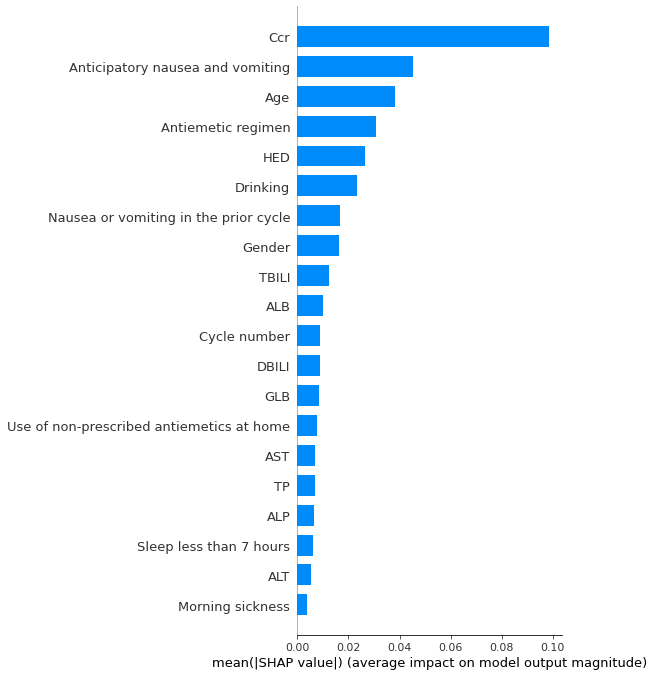

In [68]:
shap.summary_plot(shap_values,X_test1,plot_type="bar")

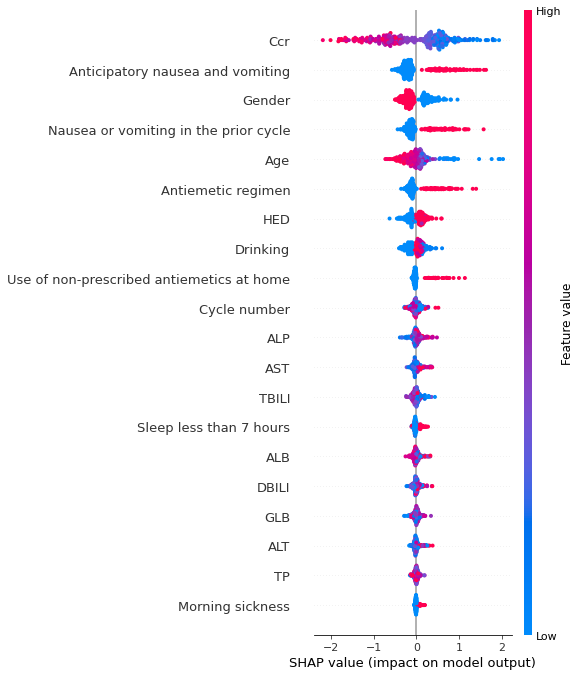

In [16]:
# SHAP value description
shap.summary_plot(shap_values,X_test1)

###### LIME interpretation for a single sample

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train_deepforest = sc_X.fit_transform(x_train_deepforest)

In [18]:
modeldeepforest.predict

<bound method CascadeForestRegressor.predict of CascadeForestRegressor(delta=1.2612388710134013e-06, max_layers=10,
                       min_samples_leaf=4, min_samples_split=9, n_estimators=4,
                       random_state=1)>

In [32]:
## Sample 1 and 97 were interpreted using deepforest model
import lime  
from lime import lime_tabular  
from sklearn.ensemble import RandomForestClassifier  
interpretor = lime_tabular.LimeTabularExplainer(  
    training_data=np.array(trainx_deepforest),  
    feature_names=trainx_deepforest.columns,  
    mode='regression')  
exp = interpretor.explain_instance(  
    data_row=testx_deepforest.iloc[97], ##new data  
    predict_fn=modeldeepforest.predict,num_features=9)  
exp.show_in_notebook(show_table=True)  


[2023-02-28 03:14:33.126] Start to evalute the model:
[2023-02-28 03:14:33.126] Evaluating cascade layer = 0 
[2023-02-28 03:14:33.421] Evaluating cascade layer = 1 


###### Single sample shap interpretation

In [255]:
shap.initjs()
explainer = shap.SamplingExplainer(modeldeepforest.predict, trainx_deepforest)
shap_values = explainer(testx_deepforest)

[2023-02-27 07:50:00.566] Start to evalute the model:
[2023-02-27 07:50:00.567] Evaluating cascade layer = 0 
[2023-02-27 07:50:00.686] Evaluating cascade layer = 1 


  0%|          | 0/350 [00:00<?, ?it/s]

[2023-02-27 07:50:01.619] Start to evalute the model:
[2023-02-27 07:50:01.619] Evaluating cascade layer = 0 
[2023-02-27 07:50:01.658] Evaluating cascade layer = 1 
[2023-02-27 07:50:01.693] Start to evalute the model:
[2023-02-27 07:50:01.693] Evaluating cascade layer = 0 
[2023-02-27 07:50:01.747] Evaluating cascade layer = 1 
[2023-02-27 07:50:01.795] Start to evalute the model:
[2023-02-27 07:50:01.795] Evaluating cascade layer = 0 
[2023-02-27 07:50:01.842] Evaluating cascade layer = 1 
[2023-02-27 07:50:01.883] Start to evalute the model:
[2023-02-27 07:50:01.883] Evaluating cascade layer = 0 
[2023-02-27 07:50:01.929] Evaluating cascade layer = 1 
[2023-02-27 07:50:01.976] Start to evalute the model:
[2023-02-27 07:50:01.976] Evaluating cascade layer = 0 
[2023-02-27 07:50:02.032] Evaluating cascade layer = 1 
[2023-02-27 07:50:02.077] Start to evalute the model:
[2023-02-27 07:50:02.077] Evaluating cascade layer = 0 
[2023-02-27 07:50:02.118] Evaluating cascade layer = 1 
[202

[2023-02-27 07:50:08.139] Start to evalute the model:
[2023-02-27 07:50:08.139] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.183] Evaluating cascade layer = 1 
[2023-02-27 07:50:08.229] Start to evalute the model:
[2023-02-27 07:50:08.229] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.276] Evaluating cascade layer = 1 
[2023-02-27 07:50:08.323] Start to evalute the model:
[2023-02-27 07:50:08.323] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.375] Evaluating cascade layer = 1 
[2023-02-27 07:50:08.422] Start to evalute the model:
[2023-02-27 07:50:08.422] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.469] Evaluating cascade layer = 1 
[2023-02-27 07:50:08.516] Start to evalute the model:
[2023-02-27 07:50:08.516] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.556] Evaluating cascade layer = 1 
[2023-02-27 07:50:08.603] Start to evalute the model:
[2023-02-27 07:50:08.603] Evaluating cascade layer = 0 
[2023-02-27 07:50:08.650] Evaluating cascade layer = 1 
[202

[2023-02-27 07:50:14.549] Evaluating cascade layer = 0 
[2023-02-27 07:50:14.599] Evaluating cascade layer = 1 
[2023-02-27 07:50:14.656] Start to evalute the model:
[2023-02-27 07:50:14.657] Evaluating cascade layer = 0 
[2023-02-27 07:50:14.703] Evaluating cascade layer = 1 
[2023-02-27 07:50:14.752] Start to evalute the model:
[2023-02-27 07:50:14.752] Evaluating cascade layer = 0 
[2023-02-27 07:50:14.799] Evaluating cascade layer = 1 
[2023-02-27 07:50:14.846] Start to evalute the model:
[2023-02-27 07:50:14.846] Evaluating cascade layer = 0 
[2023-02-27 07:50:14.893] Evaluating cascade layer = 1 
[2023-02-27 07:50:15.738] Start to evalute the model:
[2023-02-27 07:50:15.738] Evaluating cascade layer = 0 
[2023-02-27 07:50:15.784] Evaluating cascade layer = 1 
[2023-02-27 07:50:15.816] Start to evalute the model:
[2023-02-27 07:50:15.816] Evaluating cascade layer = 0 
[2023-02-27 07:50:15.863] Evaluating cascade layer = 1 
[2023-02-27 07:50:15.909] Start to evalute the model:
[202

[2023-02-27 07:50:21.869] Evaluating cascade layer = 1 
[2023-02-27 07:50:21.910] Start to evalute the model:
[2023-02-27 07:50:21.910] Evaluating cascade layer = 0 
[2023-02-27 07:50:21.957] Evaluating cascade layer = 1 
[2023-02-27 07:50:22.004] Start to evalute the model:
[2023-02-27 07:50:22.004] Evaluating cascade layer = 0 
[2023-02-27 07:50:22.051] Evaluating cascade layer = 1 
[2023-02-27 07:50:22.098] Start to evalute the model:
[2023-02-27 07:50:22.098] Evaluating cascade layer = 0 
[2023-02-27 07:50:22.145] Evaluating cascade layer = 1 
[2023-02-27 07:50:22.200] Start to evalute the model:
[2023-02-27 07:50:22.200] Evaluating cascade layer = 0 
[2023-02-27 07:50:22.247] Evaluating cascade layer = 1 
[2023-02-27 07:50:22.294] Start to evalute the model:
[2023-02-27 07:50:22.294] Evaluating cascade layer = 0 
[2023-02-27 07:50:22.341] Evaluating cascade layer = 1 
[2023-02-27 07:50:22.388] Start to evalute the model:
[2023-02-27 07:50:22.388] Evaluating cascade layer = 0 
[202

[2023-02-27 07:50:28.647] Start to evalute the model:
[2023-02-27 07:50:28.647] Evaluating cascade layer = 0 
[2023-02-27 07:50:28.694] Evaluating cascade layer = 1 
[2023-02-27 07:50:28.746] Start to evalute the model:
[2023-02-27 07:50:28.746] Evaluating cascade layer = 0 
[2023-02-27 07:50:28.791] Evaluating cascade layer = 1 
[2023-02-27 07:50:28.828] Start to evalute the model:
[2023-02-27 07:50:28.828] Evaluating cascade layer = 0 
[2023-02-27 07:50:28.882] Evaluating cascade layer = 1 
[2023-02-27 07:50:28.929] Start to evalute the model:
[2023-02-27 07:50:28.929] Evaluating cascade layer = 0 
[2023-02-27 07:50:28.985] Evaluating cascade layer = 1 
[2023-02-27 07:50:29.034] Start to evalute the model:
[2023-02-27 07:50:29.034] Evaluating cascade layer = 0 
[2023-02-27 07:50:29.082] Evaluating cascade layer = 1 
[2023-02-27 07:50:29.126] Start to evalute the model:
[2023-02-27 07:50:29.126] Evaluating cascade layer = 0 
[2023-02-27 07:50:29.180] Evaluating cascade layer = 1 
[202

[2023-02-27 07:50:36.133] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.193] Start to evalute the model:
[2023-02-27 07:50:36.193] Evaluating cascade layer = 0 
[2023-02-27 07:50:36.255] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.302] Start to evalute the model:
[2023-02-27 07:50:36.302] Evaluating cascade layer = 0 
[2023-02-27 07:50:36.353] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.400] Start to evalute the model:
[2023-02-27 07:50:36.400] Evaluating cascade layer = 0 
[2023-02-27 07:50:36.455] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.504] Start to evalute the model:
[2023-02-27 07:50:36.504] Evaluating cascade layer = 0 
[2023-02-27 07:50:36.551] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.602] Start to evalute the model:
[2023-02-27 07:50:36.602] Evaluating cascade layer = 0 
[2023-02-27 07:50:36.649] Evaluating cascade layer = 1 
[2023-02-27 07:50:36.706] Start to evalute the model:
[2023-02-27 07:50:36.707] Evaluating cascade layer = 0 
[202

[2023-02-27 07:50:42.886] Start to evalute the model:
[2023-02-27 07:50:42.887] Evaluating cascade layer = 0 
[2023-02-27 07:50:42.923] Evaluating cascade layer = 1 
[2023-02-27 07:50:42.983] Start to evalute the model:
[2023-02-27 07:50:42.984] Evaluating cascade layer = 0 
[2023-02-27 07:50:43.030] Evaluating cascade layer = 1 
[2023-02-27 07:50:43.076] Start to evalute the model:
[2023-02-27 07:50:43.076] Evaluating cascade layer = 0 
[2023-02-27 07:50:43.126] Evaluating cascade layer = 1 
[2023-02-27 07:50:43.166] Start to evalute the model:
[2023-02-27 07:50:43.166] Evaluating cascade layer = 0 
[2023-02-27 07:50:43.213] Evaluating cascade layer = 1 
[2023-02-27 07:50:43.260] Start to evalute the model:
[2023-02-27 07:50:43.260] Evaluating cascade layer = 0 
[2023-02-27 07:50:43.305] Evaluating cascade layer = 1 
[2023-02-27 07:50:43.352] Start to evalute the model:
[2023-02-27 07:50:43.352] Evaluating cascade layer = 0 
[2023-02-27 07:50:43.398] Evaluating cascade layer = 1 
[202

[2023-02-27 07:50:49.878] Evaluating cascade layer = 0 
[2023-02-27 07:50:49.933] Evaluating cascade layer = 1 
[2023-02-27 07:50:50.790] Start to evalute the model:
[2023-02-27 07:50:50.790] Evaluating cascade layer = 0 
[2023-02-27 07:50:50.837] Evaluating cascade layer = 1 
[2023-02-27 07:50:50.868] Start to evalute the model:
[2023-02-27 07:50:50.868] Evaluating cascade layer = 0 
[2023-02-27 07:50:50.915] Evaluating cascade layer = 1 
[2023-02-27 07:50:50.962] Start to evalute the model:
[2023-02-27 07:50:50.962] Evaluating cascade layer = 0 
[2023-02-27 07:50:51.014] Evaluating cascade layer = 1 
[2023-02-27 07:50:51.061] Start to evalute the model:
[2023-02-27 07:50:51.061] Evaluating cascade layer = 0 
[2023-02-27 07:50:51.108] Evaluating cascade layer = 1 
[2023-02-27 07:50:51.155] Start to evalute the model:
[2023-02-27 07:50:51.155] Evaluating cascade layer = 0 
[2023-02-27 07:50:51.202] Evaluating cascade layer = 1 
[2023-02-27 07:50:51.245] Start to evalute the model:
[202

[2023-02-27 07:50:57.197] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.243] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.290] Start to evalute the model:
[2023-02-27 07:50:57.290] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.337] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.384] Start to evalute the model:
[2023-02-27 07:50:57.384] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.432] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.478] Start to evalute the model:
[2023-02-27 07:50:57.478] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.525] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.572] Start to evalute the model:
[2023-02-27 07:50:57.572] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.627] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.674] Start to evalute the model:
[2023-02-27 07:50:57.674] Evaluating cascade layer = 0 
[2023-02-27 07:50:57.721] Evaluating cascade layer = 1 
[2023-02-27 07:50:57.772] Start to evalute the model:
[202

[2023-02-27 07:51:03.697] Evaluating cascade layer = 0 
[2023-02-27 07:51:03.752] Evaluating cascade layer = 1 
[2023-02-27 07:51:03.799] Start to evalute the model:
[2023-02-27 07:51:03.799] Evaluating cascade layer = 0 
[2023-02-27 07:51:03.846] Evaluating cascade layer = 1 
[2023-02-27 07:51:03.897] Start to evalute the model:
[2023-02-27 07:51:03.897] Evaluating cascade layer = 0 
[2023-02-27 07:51:03.947] Evaluating cascade layer = 1 
[2023-02-27 07:51:03.994] Start to evalute the model:
[2023-02-27 07:51:03.994] Evaluating cascade layer = 0 
[2023-02-27 07:51:04.040] Evaluating cascade layer = 1 
[2023-02-27 07:51:04.087] Start to evalute the model:
[2023-02-27 07:51:04.087] Evaluating cascade layer = 0 
[2023-02-27 07:51:04.141] Evaluating cascade layer = 1 
[2023-02-27 07:51:05.006] Start to evalute the model:
[2023-02-27 07:51:05.006] Evaluating cascade layer = 0 
[2023-02-27 07:51:05.052] Evaluating cascade layer = 1 
[2023-02-27 07:51:05.084] Start to evalute the model:
[202

[2023-02-27 07:51:11.119] Start to evalute the model:
[2023-02-27 07:51:11.119] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.166] Evaluating cascade layer = 1 
[2023-02-27 07:51:11.231] Start to evalute the model:
[2023-02-27 07:51:11.231] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.277] Evaluating cascade layer = 1 
[2023-02-27 07:51:11.324] Start to evalute the model:
[2023-02-27 07:51:11.324] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.371] Evaluating cascade layer = 1 
[2023-02-27 07:51:11.418] Start to evalute the model:
[2023-02-27 07:51:11.418] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.465] Evaluating cascade layer = 1 
[2023-02-27 07:51:11.527] Start to evalute the model:
[2023-02-27 07:51:11.527] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.574] Evaluating cascade layer = 1 
[2023-02-27 07:51:11.632] Start to evalute the model:
[2023-02-27 07:51:11.632] Evaluating cascade layer = 0 
[2023-02-27 07:51:11.680] Evaluating cascade layer = 1 
[202

[2023-02-27 07:51:17.586] Evaluating cascade layer = 0 
[2023-02-27 07:51:17.633] Evaluating cascade layer = 1 
[2023-02-27 07:51:17.680] Start to evalute the model:
[2023-02-27 07:51:17.680] Evaluating cascade layer = 0 
[2023-02-27 07:51:17.727] Evaluating cascade layer = 1 
[2023-02-27 07:51:17.774] Start to evalute the model:
[2023-02-27 07:51:17.774] Evaluating cascade layer = 0 
[2023-02-27 07:51:17.828] Evaluating cascade layer = 1 
[2023-02-27 07:51:17.875] Start to evalute the model:
[2023-02-27 07:51:17.875] Evaluating cascade layer = 0 
[2023-02-27 07:51:17.922] Evaluating cascade layer = 1 
[2023-02-27 07:51:17.968] Start to evalute the model:
[2023-02-27 07:51:17.968] Evaluating cascade layer = 0 
[2023-02-27 07:51:18.015] Evaluating cascade layer = 1 
[2023-02-27 07:51:18.062] Start to evalute the model:
[2023-02-27 07:51:18.062] Evaluating cascade layer = 0 
[2023-02-27 07:51:18.109] Evaluating cascade layer = 1 
[2023-02-27 07:51:18.156] Start to evalute the model:
[202

[2023-02-27 07:51:24.917] Evaluating cascade layer = 1 
[2023-02-27 07:51:24.964] Start to evalute the model:
[2023-02-27 07:51:24.964] Evaluating cascade layer = 0 
[2023-02-27 07:51:25.011] Evaluating cascade layer = 1 
[2023-02-27 07:51:25.058] Start to evalute the model:
[2023-02-27 07:51:25.058] Evaluating cascade layer = 0 
[2023-02-27 07:51:25.105] Evaluating cascade layer = 1 
[2023-02-27 07:51:25.154] Start to evalute the model:
[2023-02-27 07:51:25.154] Evaluating cascade layer = 0 
[2023-02-27 07:51:25.200] Evaluating cascade layer = 1 
[2023-02-27 07:51:25.247] Start to evalute the model:
[2023-02-27 07:51:25.247] Evaluating cascade layer = 0 
[2023-02-27 07:51:25.294] Evaluating cascade layer = 1 
[2023-02-27 07:51:25.341] Start to evalute the model:
[2023-02-27 07:51:25.341] Evaluating cascade layer = 0 
[2023-02-27 07:51:25.390] Evaluating cascade layer = 1 
[2023-02-27 07:51:25.453] Start to evalute the model:
[2023-02-27 07:51:25.453] Evaluating cascade layer = 0 
[202

[2023-02-27 07:51:31.372] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.418] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.465] Start to evalute the model:
[2023-02-27 07:51:31.465] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.512] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.559] Start to evalute the model:
[2023-02-27 07:51:31.559] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.612] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.659] Start to evalute the model:
[2023-02-27 07:51:31.659] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.706] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.765] Start to evalute the model:
[2023-02-27 07:51:31.766] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.810] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.857] Start to evalute the model:
[2023-02-27 07:51:31.857] Evaluating cascade layer = 0 
[2023-02-27 07:51:31.904] Evaluating cascade layer = 1 
[2023-02-27 07:51:31.951] Start to evalute the model:
[202

[2023-02-27 07:51:37.733] Evaluating cascade layer = 0 
[2023-02-27 07:51:37.779] Evaluating cascade layer = 1 
[2023-02-27 07:51:37.826] Start to evalute the model:
[2023-02-27 07:51:37.826] Evaluating cascade layer = 0 
[2023-02-27 07:51:37.873] Evaluating cascade layer = 1 
[2023-02-27 07:51:38.720] Start to evalute the model:
[2023-02-27 07:51:38.720] Evaluating cascade layer = 0 
[2023-02-27 07:51:38.767] Evaluating cascade layer = 1 
[2023-02-27 07:51:38.798] Start to evalute the model:
[2023-02-27 07:51:38.798] Evaluating cascade layer = 0 
[2023-02-27 07:51:38.845] Evaluating cascade layer = 1 
[2023-02-27 07:51:38.892] Start to evalute the model:
[2023-02-27 07:51:38.907] Evaluating cascade layer = 0 
[2023-02-27 07:51:38.947] Evaluating cascade layer = 1 
[2023-02-27 07:51:38.994] Start to evalute the model:
[2023-02-27 07:51:38.994] Evaluating cascade layer = 0 
[2023-02-27 07:51:39.041] Evaluating cascade layer = 1 
[2023-02-27 07:51:39.088] Start to evalute the model:
[202

[2023-02-27 07:51:45.446] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.495] Evaluating cascade layer = 1 
[2023-02-27 07:51:45.542] Start to evalute the model:
[2023-02-27 07:51:45.542] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.589] Evaluating cascade layer = 1 
[2023-02-27 07:51:45.636] Start to evalute the model:
[2023-02-27 07:51:45.636] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.675] Evaluating cascade layer = 1 
[2023-02-27 07:51:45.722] Start to evalute the model:
[2023-02-27 07:51:45.722] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.769] Evaluating cascade layer = 1 
[2023-02-27 07:51:45.816] Start to evalute the model:
[2023-02-27 07:51:45.816] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.869] Evaluating cascade layer = 1 
[2023-02-27 07:51:45.916] Start to evalute the model:
[2023-02-27 07:51:45.916] Evaluating cascade layer = 0 
[2023-02-27 07:51:45.963] Evaluating cascade layer = 1 
[2023-02-27 07:51:46.010] Start to evalute the model:
[202

[2023-02-27 07:51:52.107] Start to evalute the model:
[2023-02-27 07:51:52.107] Evaluating cascade layer = 0 
[2023-02-27 07:51:52.149] Evaluating cascade layer = 1 
[2023-02-27 07:51:52.196] Start to evalute the model:
[2023-02-27 07:51:52.196] Evaluating cascade layer = 0 
[2023-02-27 07:51:52.243] Evaluating cascade layer = 1 
[2023-02-27 07:51:52.289] Start to evalute the model:
[2023-02-27 07:51:52.289] Evaluating cascade layer = 0 
[2023-02-27 07:51:52.368] Evaluating cascade layer = 1 
[2023-02-27 07:51:52.430] Start to evalute the model:
[2023-02-27 07:51:52.430] Evaluating cascade layer = 0 
[2023-02-27 07:51:52.498] Evaluating cascade layer = 1 
[2023-02-27 07:51:52.546] Start to evalute the model:
[2023-02-27 07:51:52.546] Evaluating cascade layer = 0 
[2023-02-27 07:51:52.578] Evaluating cascade layer = 1 
[2023-02-27 07:51:53.479] Start to evalute the model:
[2023-02-27 07:51:53.479] Evaluating cascade layer = 0 
[2023-02-27 07:51:53.526] Evaluating cascade layer = 1 
[202

[2023-02-27 07:51:59.471] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.511] Start to evalute the model:
[2023-02-27 07:51:59.511] Evaluating cascade layer = 0 
[2023-02-27 07:51:59.558] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.604] Start to evalute the model:
[2023-02-27 07:51:59.604] Evaluating cascade layer = 0 
[2023-02-27 07:51:59.651] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.709] Start to evalute the model:
[2023-02-27 07:51:59.709] Evaluating cascade layer = 0 
[2023-02-27 07:51:59.756] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.802] Start to evalute the model:
[2023-02-27 07:51:59.802] Evaluating cascade layer = 0 
[2023-02-27 07:51:59.849] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.896] Start to evalute the model:
[2023-02-27 07:51:59.896] Evaluating cascade layer = 0 
[2023-02-27 07:51:59.941] Evaluating cascade layer = 1 
[2023-02-27 07:51:59.987] Start to evalute the model:
[2023-02-27 07:51:59.987] Evaluating cascade layer = 0 
[202

[2023-02-27 07:52:06.090] Start to evalute the model:
[2023-02-27 07:52:06.090] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.146] Evaluating cascade layer = 1 
[2023-02-27 07:52:06.211] Start to evalute the model:
[2023-02-27 07:52:06.211] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.251] Evaluating cascade layer = 1 
[2023-02-27 07:52:06.319] Start to evalute the model:
[2023-02-27 07:52:06.320] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.352] Evaluating cascade layer = 1 
[2023-02-27 07:52:06.415] Start to evalute the model:
[2023-02-27 07:52:06.415] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.462] Evaluating cascade layer = 1 
[2023-02-27 07:52:06.508] Start to evalute the model:
[2023-02-27 07:52:06.508] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.567] Evaluating cascade layer = 1 
[2023-02-27 07:52:06.624] Start to evalute the model:
[2023-02-27 07:52:06.625] Evaluating cascade layer = 0 
[2023-02-27 07:52:06.677] Evaluating cascade layer = 1 
[202

[2023-02-27 07:52:13.645] Start to evalute the model:
[2023-02-27 07:52:13.645] Evaluating cascade layer = 0 
[2023-02-27 07:52:13.676] Evaluating cascade layer = 1 
[2023-02-27 07:52:13.723] Start to evalute the model:
[2023-02-27 07:52:13.723] Evaluating cascade layer = 0 
[2023-02-27 07:52:13.770] Evaluating cascade layer = 1 
[2023-02-27 07:52:13.816] Start to evalute the model:
[2023-02-27 07:52:13.816] Evaluating cascade layer = 0 
[2023-02-27 07:52:13.869] Evaluating cascade layer = 1 
[2023-02-27 07:52:13.915] Start to evalute the model:
[2023-02-27 07:52:13.915] Evaluating cascade layer = 0 
[2023-02-27 07:52:13.962] Evaluating cascade layer = 1 
[2023-02-27 07:52:14.009] Start to evalute the model:
[2023-02-27 07:52:14.009] Evaluating cascade layer = 0 
[2023-02-27 07:52:14.056] Evaluating cascade layer = 1 
[2023-02-27 07:52:14.099] Start to evalute the model:
[2023-02-27 07:52:14.099] Evaluating cascade layer = 0 
[2023-02-27 07:52:14.146] Evaluating cascade layer = 1 
[202

[2023-02-27 07:52:20.009] Start to evalute the model:
[2023-02-27 07:52:20.009] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.059] Evaluating cascade layer = 1 
[2023-02-27 07:52:20.106] Start to evalute the model:
[2023-02-27 07:52:20.106] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.153] Evaluating cascade layer = 1 
[2023-02-27 07:52:20.200] Start to evalute the model:
[2023-02-27 07:52:20.200] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.245] Evaluating cascade layer = 1 
[2023-02-27 07:52:20.292] Start to evalute the model:
[2023-02-27 07:52:20.292] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.339] Evaluating cascade layer = 1 
[2023-02-27 07:52:20.386] Start to evalute the model:
[2023-02-27 07:52:20.386] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.439] Evaluating cascade layer = 1 
[2023-02-27 07:52:20.486] Start to evalute the model:
[2023-02-27 07:52:20.486] Evaluating cascade layer = 0 
[2023-02-27 07:52:20.533] Evaluating cascade layer = 1 
[202

[2023-02-27 07:52:26.525] Evaluating cascade layer = 0 
[2023-02-27 07:52:26.578] Evaluating cascade layer = 1 
[2023-02-27 07:52:26.625] Start to evalute the model:
[2023-02-27 07:52:26.625] Evaluating cascade layer = 0 
[2023-02-27 07:52:26.672] Evaluating cascade layer = 1 
[2023-02-27 07:52:26.719] Start to evalute the model:
[2023-02-27 07:52:26.719] Evaluating cascade layer = 0 
[2023-02-27 07:52:26.774] Evaluating cascade layer = 1 
[2023-02-27 07:52:26.821] Start to evalute the model:
[2023-02-27 07:52:26.821] Evaluating cascade layer = 0 
[2023-02-27 07:52:26.868] Evaluating cascade layer = 1 
[2023-02-27 07:52:27.752] Start to evalute the model:
[2023-02-27 07:52:27.752] Evaluating cascade layer = 0 
[2023-02-27 07:52:27.799] Evaluating cascade layer = 1 
[2023-02-27 07:52:27.830] Start to evalute the model:
[2023-02-27 07:52:27.846] Evaluating cascade layer = 0 
[2023-02-27 07:52:27.893] Evaluating cascade layer = 1 
[2023-02-27 07:52:27.940] Start to evalute the model:
[202

[2023-02-27 07:52:33.820] Start to evalute the model:
[2023-02-27 07:52:33.821] Evaluating cascade layer = 0 
[2023-02-27 07:52:33.868] Evaluating cascade layer = 1 
[2023-02-27 07:52:33.915] Start to evalute the model:
[2023-02-27 07:52:33.915] Evaluating cascade layer = 0 
[2023-02-27 07:52:33.962] Evaluating cascade layer = 1 
[2023-02-27 07:52:34.009] Start to evalute the model:
[2023-02-27 07:52:34.009] Evaluating cascade layer = 0 
[2023-02-27 07:52:34.052] Evaluating cascade layer = 1 
[2023-02-27 07:52:34.099] Start to evalute the model:
[2023-02-27 07:52:34.099] Evaluating cascade layer = 0 
[2023-02-27 07:52:34.146] Evaluating cascade layer = 1 
[2023-02-27 07:52:34.193] Start to evalute the model:
[2023-02-27 07:52:34.193] Evaluating cascade layer = 0 
[2023-02-27 07:52:34.239] Evaluating cascade layer = 1 
[2023-02-27 07:52:34.285] Start to evalute the model:
[2023-02-27 07:52:34.285] Evaluating cascade layer = 0 
[2023-02-27 07:52:34.332] Evaluating cascade layer = 1 
[202

[2023-02-27 07:52:40.198] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.247] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.294] Start to evalute the model:
[2023-02-27 07:52:40.294] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.341] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.387] Start to evalute the model:
[2023-02-27 07:52:40.387] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.441] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.488] Start to evalute the model:
[2023-02-27 07:52:40.488] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.535] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.586] Start to evalute the model:
[2023-02-27 07:52:40.586] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.636] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.683] Start to evalute the model:
[2023-02-27 07:52:40.683] Evaluating cascade layer = 0 
[2023-02-27 07:52:40.729] Evaluating cascade layer = 1 
[2023-02-27 07:52:40.776] Start to evalute the model:
[202

[2023-02-27 07:52:47.667] Start to evalute the model:
[2023-02-27 07:52:47.667] Evaluating cascade layer = 0 
[2023-02-27 07:52:47.698] Evaluating cascade layer = 1 
[2023-02-27 07:52:47.745] Start to evalute the model:
[2023-02-27 07:52:47.745] Evaluating cascade layer = 0 
[2023-02-27 07:52:47.792] Evaluating cascade layer = 1 
[2023-02-27 07:52:47.839] Start to evalute the model:
[2023-02-27 07:52:47.839] Evaluating cascade layer = 0 
[2023-02-27 07:52:47.890] Evaluating cascade layer = 1 
[2023-02-27 07:52:47.937] Start to evalute the model:
[2023-02-27 07:52:47.937] Evaluating cascade layer = 0 
[2023-02-27 07:52:47.984] Evaluating cascade layer = 1 
[2023-02-27 07:52:48.046] Start to evalute the model:
[2023-02-27 07:52:48.046] Evaluating cascade layer = 0 
[2023-02-27 07:52:48.119] Evaluating cascade layer = 1 
[2023-02-27 07:52:48.182] Start to evalute the model:
[2023-02-27 07:52:48.182] Evaluating cascade layer = 0 
[2023-02-27 07:52:48.229] Evaluating cascade layer = 1 
[202

[2023-02-27 07:52:54.381] Start to evalute the model:
[2023-02-27 07:52:54.381] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.428] Evaluating cascade layer = 1 
[2023-02-27 07:52:54.475] Start to evalute the model:
[2023-02-27 07:52:54.475] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.522] Evaluating cascade layer = 1 
[2023-02-27 07:52:54.569] Start to evalute the model:
[2023-02-27 07:52:54.569] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.613] Evaluating cascade layer = 1 
[2023-02-27 07:52:54.660] Start to evalute the model:
[2023-02-27 07:52:54.660] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.707] Evaluating cascade layer = 1 
[2023-02-27 07:52:54.770] Start to evalute the model:
[2023-02-27 07:52:54.770] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.808] Evaluating cascade layer = 1 
[2023-02-27 07:52:54.855] Start to evalute the model:
[2023-02-27 07:52:54.855] Evaluating cascade layer = 0 
[2023-02-27 07:52:54.901] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:00.975] Start to evalute the model:
[2023-02-27 07:53:00.975] Evaluating cascade layer = 0 
[2023-02-27 07:53:01.022] Evaluating cascade layer = 1 
[2023-02-27 07:53:01.084] Start to evalute the model:
[2023-02-27 07:53:01.084] Evaluating cascade layer = 0 
[2023-02-27 07:53:01.147] Evaluating cascade layer = 1 
[2023-02-27 07:53:01.226] Start to evalute the model:
[2023-02-27 07:53:01.226] Evaluating cascade layer = 0 
[2023-02-27 07:53:01.273] Evaluating cascade layer = 1 
[2023-02-27 07:53:01.320] Start to evalute the model:
[2023-02-27 07:53:01.320] Evaluating cascade layer = 0 
[2023-02-27 07:53:01.367] Evaluating cascade layer = 1 
[2023-02-27 07:53:02.274] Start to evalute the model:
[2023-02-27 07:53:02.274] Evaluating cascade layer = 0 
[2023-02-27 07:53:02.305] Evaluating cascade layer = 1 
[2023-02-27 07:53:02.352] Start to evalute the model:
[2023-02-27 07:53:02.352] Evaluating cascade layer = 0 
[2023-02-27 07:53:02.399] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:08.435] Start to evalute the model:
[2023-02-27 07:53:08.435] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.482] Evaluating cascade layer = 1 
[2023-02-27 07:53:08.528] Start to evalute the model:
[2023-02-27 07:53:08.528] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.575] Evaluating cascade layer = 1 
[2023-02-27 07:53:08.622] Start to evalute the model:
[2023-02-27 07:53:08.622] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.677] Evaluating cascade layer = 1 
[2023-02-27 07:53:08.724] Start to evalute the model:
[2023-02-27 07:53:08.724] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.771] Evaluating cascade layer = 1 
[2023-02-27 07:53:08.823] Start to evalute the model:
[2023-02-27 07:53:08.823] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.858] Evaluating cascade layer = 1 
[2023-02-27 07:53:08.905] Start to evalute the model:
[2023-02-27 07:53:08.905] Evaluating cascade layer = 0 
[2023-02-27 07:53:08.952] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:14.927] Start to evalute the model:
[2023-02-27 07:53:14.927] Evaluating cascade layer = 0 
[2023-02-27 07:53:14.976] Evaluating cascade layer = 1 
[2023-02-27 07:53:15.023] Start to evalute the model:
[2023-02-27 07:53:15.023] Evaluating cascade layer = 0 
[2023-02-27 07:53:15.070] Evaluating cascade layer = 1 
[2023-02-27 07:53:15.117] Start to evalute the model:
[2023-02-27 07:53:15.133] Evaluating cascade layer = 0 
[2023-02-27 07:53:15.170] Evaluating cascade layer = 1 
[2023-02-27 07:53:15.217] Start to evalute the model:
[2023-02-27 07:53:15.217] Evaluating cascade layer = 0 
[2023-02-27 07:53:15.264] Evaluating cascade layer = 1 
[2023-02-27 07:53:15.326] Start to evalute the model:
[2023-02-27 07:53:15.326] Evaluating cascade layer = 0 
[2023-02-27 07:53:15.364] Evaluating cascade layer = 1 
[2023-02-27 07:53:15.411] Start to evalute the model:
[2023-02-27 07:53:15.411] Evaluating cascade layer = 0 
[2023-02-27 07:53:15.458] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:22.158] Start to evalute the model:
[2023-02-27 07:53:22.158] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.205] Evaluating cascade layer = 1 
[2023-02-27 07:53:22.236] Start to evalute the model:
[2023-02-27 07:53:22.236] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.283] Evaluating cascade layer = 1 
[2023-02-27 07:53:22.330] Start to evalute the model:
[2023-02-27 07:53:22.330] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.386] Evaluating cascade layer = 1 
[2023-02-27 07:53:22.422] Start to evalute the model:
[2023-02-27 07:53:22.422] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.469] Evaluating cascade layer = 1 
[2023-02-27 07:53:22.515] Start to evalute the model:
[2023-02-27 07:53:22.515] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.562] Evaluating cascade layer = 1 
[2023-02-27 07:53:22.621] Start to evalute the model:
[2023-02-27 07:53:22.621] Evaluating cascade layer = 0 
[2023-02-27 07:53:22.668] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:28.538] Start to evalute the model:
[2023-02-27 07:53:28.538] Evaluating cascade layer = 0 
[2023-02-27 07:53:28.588] Evaluating cascade layer = 1 
[2023-02-27 07:53:28.635] Start to evalute the model:
[2023-02-27 07:53:28.635] Evaluating cascade layer = 0 
[2023-02-27 07:53:28.681] Evaluating cascade layer = 1 
[2023-02-27 07:53:28.728] Start to evalute the model:
[2023-02-27 07:53:28.728] Evaluating cascade layer = 0 
[2023-02-27 07:53:28.774] Evaluating cascade layer = 1 
[2023-02-27 07:53:28.821] Start to evalute the model:
[2023-02-27 07:53:28.821] Evaluating cascade layer = 0 
[2023-02-27 07:53:28.868] Evaluating cascade layer = 1 
[2023-02-27 07:53:28.915] Start to evalute the model:
[2023-02-27 07:53:28.915] Evaluating cascade layer = 0 
[2023-02-27 07:53:28.962] Evaluating cascade layer = 1 
[2023-02-27 07:53:29.009] Start to evalute the model:
[2023-02-27 07:53:29.009] Evaluating cascade layer = 0 
[2023-02-27 07:53:29.055] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:35.100] Start to evalute the model:
[2023-02-27 07:53:35.100] Evaluating cascade layer = 0 
[2023-02-27 07:53:35.150] Evaluating cascade layer = 1 
[2023-02-27 07:53:35.197] Start to evalute the model:
[2023-02-27 07:53:35.197] Evaluating cascade layer = 0 
[2023-02-27 07:53:35.244] Evaluating cascade layer = 1 
[2023-02-27 07:53:35.291] Start to evalute the model:
[2023-02-27 07:53:35.291] Evaluating cascade layer = 0 
[2023-02-27 07:53:35.338] Evaluating cascade layer = 1 
[2023-02-27 07:53:35.385] Start to evalute the model:
[2023-02-27 07:53:35.385] Evaluating cascade layer = 0 
[2023-02-27 07:53:35.432] Evaluating cascade layer = 1 
[2023-02-27 07:53:36.309] Start to evalute the model:
[2023-02-27 07:53:36.309] Evaluating cascade layer = 0 
[2023-02-27 07:53:36.340] Evaluating cascade layer = 1 
[2023-02-27 07:53:36.387] Start to evalute the model:
[2023-02-27 07:53:36.387] Evaluating cascade layer = 0 
[2023-02-27 07:53:36.434] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:42.525] Start to evalute the model:
[2023-02-27 07:53:42.525] Evaluating cascade layer = 0 
[2023-02-27 07:53:42.572] Evaluating cascade layer = 1 
[2023-02-27 07:53:42.619] Start to evalute the model:
[2023-02-27 07:53:42.619] Evaluating cascade layer = 0 
[2023-02-27 07:53:42.665] Evaluating cascade layer = 1 
[2023-02-27 07:53:42.712] Start to evalute the model:
[2023-02-27 07:53:42.712] Evaluating cascade layer = 0 
[2023-02-27 07:53:42.762] Evaluating cascade layer = 1 
[2023-02-27 07:53:42.808] Start to evalute the model:
[2023-02-27 07:53:42.808] Evaluating cascade layer = 0 
[2023-02-27 07:53:42.855] Evaluating cascade layer = 1 
[2023-02-27 07:53:42.902] Start to evalute the model:
[2023-02-27 07:53:42.902] Evaluating cascade layer = 0 
[2023-02-27 07:53:42.956] Evaluating cascade layer = 1 
[2023-02-27 07:53:43.003] Start to evalute the model:
[2023-02-27 07:53:43.003] Evaluating cascade layer = 0 
[2023-02-27 07:53:43.050] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:48.913] Start to evalute the model:
[2023-02-27 07:53:48.913] Evaluating cascade layer = 0 
[2023-02-27 07:53:48.963] Evaluating cascade layer = 1 
[2023-02-27 07:53:49.010] Start to evalute the model:
[2023-02-27 07:53:49.010] Evaluating cascade layer = 0 
[2023-02-27 07:53:49.057] Evaluating cascade layer = 1 
[2023-02-27 07:53:49.104] Start to evalute the model:
[2023-02-27 07:53:49.104] Evaluating cascade layer = 0 
[2023-02-27 07:53:49.157] Evaluating cascade layer = 1 
[2023-02-27 07:53:49.203] Start to evalute the model:
[2023-02-27 07:53:49.203] Evaluating cascade layer = 0 
[2023-02-27 07:53:49.250] Evaluating cascade layer = 1 
[2023-02-27 07:53:49.297] Start to evalute the model:
[2023-02-27 07:53:49.297] Evaluating cascade layer = 0 
[2023-02-27 07:53:49.343] Evaluating cascade layer = 1 
[2023-02-27 07:53:49.390] Start to evalute the model:
[2023-02-27 07:53:49.390] Evaluating cascade layer = 0 
[2023-02-27 07:53:49.437] Evaluating cascade layer = 1 
[202

[2023-02-27 07:53:56.590] Start to evalute the model:
[2023-02-27 07:53:56.590] Evaluating cascade layer = 0 
[2023-02-27 07:53:56.637] Evaluating cascade layer = 1 
[2023-02-27 07:53:56.668] Start to evalute the model:
[2023-02-27 07:53:56.668] Evaluating cascade layer = 0 
[2023-02-27 07:53:56.715] Evaluating cascade layer = 1 
[2023-02-27 07:53:56.777] Start to evalute the model:
[2023-02-27 07:53:56.777] Evaluating cascade layer = 0 
[2023-02-27 07:53:56.816] Evaluating cascade layer = 1 
[2023-02-27 07:53:56.863] Start to evalute the model:
[2023-02-27 07:53:56.863] Evaluating cascade layer = 0 
[2023-02-27 07:53:56.910] Evaluating cascade layer = 1 
[2023-02-27 07:53:56.972] Start to evalute the model:
[2023-02-27 07:53:56.972] Evaluating cascade layer = 0 
[2023-02-27 07:53:57.012] Evaluating cascade layer = 1 
[2023-02-27 07:53:57.059] Start to evalute the model:
[2023-02-27 07:53:57.059] Evaluating cascade layer = 0 
[2023-02-27 07:53:57.121] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:03.023] Start to evalute the model:
[2023-02-27 07:54:03.024] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.062] Evaluating cascade layer = 1 
[2023-02-27 07:54:03.109] Start to evalute the model:
[2023-02-27 07:54:03.109] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.156] Evaluating cascade layer = 1 
[2023-02-27 07:54:03.218] Start to evalute the model:
[2023-02-27 07:54:03.218] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.262] Evaluating cascade layer = 1 
[2023-02-27 07:54:03.309] Start to evalute the model:
[2023-02-27 07:54:03.309] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.356] Evaluating cascade layer = 1 
[2023-02-27 07:54:03.403] Start to evalute the model:
[2023-02-27 07:54:03.403] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.456] Evaluating cascade layer = 1 
[2023-02-27 07:54:03.503] Start to evalute the model:
[2023-02-27 07:54:03.503] Evaluating cascade layer = 0 
[2023-02-27 07:54:03.550] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:09.915] Evaluating cascade layer = 0 
[2023-02-27 07:54:09.970] Evaluating cascade layer = 1 
[2023-02-27 07:54:10.017] Start to evalute the model:
[2023-02-27 07:54:10.017] Evaluating cascade layer = 0 
[2023-02-27 07:54:10.064] Evaluating cascade layer = 1 
[2023-02-27 07:54:10.115] Start to evalute the model:
[2023-02-27 07:54:10.115] Evaluating cascade layer = 0 
[2023-02-27 07:54:10.165] Evaluating cascade layer = 1 
[2023-02-27 07:54:10.212] Start to evalute the model:
[2023-02-27 07:54:10.212] Evaluating cascade layer = 0 
[2023-02-27 07:54:10.259] Evaluating cascade layer = 1 
[2023-02-27 07:54:11.120] Start to evalute the model:
[2023-02-27 07:54:11.120] Evaluating cascade layer = 0 
[2023-02-27 07:54:11.167] Evaluating cascade layer = 1 
[2023-02-27 07:54:11.198] Start to evalute the model:
[2023-02-27 07:54:11.198] Evaluating cascade layer = 0 
[2023-02-27 07:54:11.245] Evaluating cascade layer = 1 
[2023-02-27 07:54:11.292] Start to evalute the model:
[202

[2023-02-27 07:54:17.167] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.220] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.266] Start to evalute the model:
[2023-02-27 07:54:17.266] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.313] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.365] Start to evalute the model:
[2023-02-27 07:54:17.365] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.415] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.462] Start to evalute the model:
[2023-02-27 07:54:17.462] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.509] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.555] Start to evalute the model:
[2023-02-27 07:54:17.555] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.601] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.648] Start to evalute the model:
[2023-02-27 07:54:17.648] Evaluating cascade layer = 0 
[2023-02-27 07:54:17.695] Evaluating cascade layer = 1 
[2023-02-27 07:54:17.742] Start to evalute the model:
[202

[2023-02-27 07:54:23.678] Start to evalute the model:
[2023-02-27 07:54:23.678] Evaluating cascade layer = 0 
[2023-02-27 07:54:23.727] Evaluating cascade layer = 1 
[2023-02-27 07:54:23.774] Start to evalute the model:
[2023-02-27 07:54:23.774] Evaluating cascade layer = 0 
[2023-02-27 07:54:23.821] Evaluating cascade layer = 1 
[2023-02-27 07:54:23.868] Start to evalute the model:
[2023-02-27 07:54:23.868] Evaluating cascade layer = 0 
[2023-02-27 07:54:23.922] Evaluating cascade layer = 1 
[2023-02-27 07:54:23.969] Start to evalute the model:
[2023-02-27 07:54:23.969] Evaluating cascade layer = 0 
[2023-02-27 07:54:24.016] Evaluating cascade layer = 1 
[2023-02-27 07:54:24.063] Start to evalute the model:
[2023-02-27 07:54:24.063] Evaluating cascade layer = 0 
[2023-02-27 07:54:24.116] Evaluating cascade layer = 1 
[2023-02-27 07:54:24.163] Start to evalute the model:
[2023-02-27 07:54:24.163] Evaluating cascade layer = 0 
[2023-02-27 07:54:24.210] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:30.915] Start to evalute the model:
[2023-02-27 07:54:30.915] Evaluating cascade layer = 0 
[2023-02-27 07:54:30.946] Evaluating cascade layer = 1 
[2023-02-27 07:54:30.977] Start to evalute the model:
[2023-02-27 07:54:30.977] Evaluating cascade layer = 0 
[2023-02-27 07:54:31.024] Evaluating cascade layer = 1 
[2023-02-27 07:54:31.071] Start to evalute the model:
[2023-02-27 07:54:31.087] Evaluating cascade layer = 0 
[2023-02-27 07:54:31.122] Evaluating cascade layer = 1 
[2023-02-27 07:54:31.172] Start to evalute the model:
[2023-02-27 07:54:31.172] Evaluating cascade layer = 0 
[2023-02-27 07:54:31.219] Evaluating cascade layer = 1 
[2023-02-27 07:54:31.281] Start to evalute the model:
[2023-02-27 07:54:31.281] Evaluating cascade layer = 0 
[2023-02-27 07:54:31.331] Evaluating cascade layer = 1 
[2023-02-27 07:54:31.373] Start to evalute the model:
[2023-02-27 07:54:31.373] Evaluating cascade layer = 0 
[2023-02-27 07:54:31.420] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:37.384] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.421] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.468] Start to evalute the model:
[2023-02-27 07:54:37.468] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.515] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.562] Start to evalute the model:
[2023-02-27 07:54:37.562] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.617] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.679] Start to evalute the model:
[2023-02-27 07:54:37.679] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.726] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.778] Start to evalute the model:
[2023-02-27 07:54:37.778] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.827] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.874] Start to evalute the model:
[2023-02-27 07:54:37.874] Evaluating cascade layer = 0 
[2023-02-27 07:54:37.920] Evaluating cascade layer = 1 
[2023-02-27 07:54:37.967] Start to evalute the model:
[202

[2023-02-27 07:54:43.928] Start to evalute the model:
[2023-02-27 07:54:43.928] Evaluating cascade layer = 0 
[2023-02-27 07:54:43.978] Evaluating cascade layer = 1 
[2023-02-27 07:54:44.025] Start to evalute the model:
[2023-02-27 07:54:44.025] Evaluating cascade layer = 0 
[2023-02-27 07:54:44.072] Evaluating cascade layer = 1 
[2023-02-27 07:54:44.118] Start to evalute the model:
[2023-02-27 07:54:44.118] Evaluating cascade layer = 0 
[2023-02-27 07:54:44.164] Evaluating cascade layer = 1 
[2023-02-27 07:54:45.051] Start to evalute the model:
[2023-02-27 07:54:45.051] Evaluating cascade layer = 0 
[2023-02-27 07:54:45.097] Evaluating cascade layer = 1 
[2023-02-27 07:54:45.129] Start to evalute the model:
[2023-02-27 07:54:45.129] Evaluating cascade layer = 0 
[2023-02-27 07:54:45.176] Evaluating cascade layer = 1 
[2023-02-27 07:54:45.222] Start to evalute the model:
[2023-02-27 07:54:45.222] Evaluating cascade layer = 0 
[2023-02-27 07:54:45.274] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:51.130] Start to evalute the model:
[2023-02-27 07:54:51.130] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.176] Evaluating cascade layer = 1 
[2023-02-27 07:54:51.223] Start to evalute the model:
[2023-02-27 07:54:51.223] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.270] Evaluating cascade layer = 1 
[2023-02-27 07:54:51.317] Start to evalute the model:
[2023-02-27 07:54:51.317] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.374] Evaluating cascade layer = 1 
[2023-02-27 07:54:51.421] Start to evalute the model:
[2023-02-27 07:54:51.421] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.467] Evaluating cascade layer = 1 
[2023-02-27 07:54:51.514] Start to evalute the model:
[2023-02-27 07:54:51.514] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.560] Evaluating cascade layer = 1 
[2023-02-27 07:54:51.607] Start to evalute the model:
[2023-02-27 07:54:51.607] Evaluating cascade layer = 0 
[2023-02-27 07:54:51.654] Evaluating cascade layer = 1 
[202

[2023-02-27 07:54:57.825] Start to evalute the model:
[2023-02-27 07:54:57.826] Evaluating cascade layer = 0 
[2023-02-27 07:54:57.869] Evaluating cascade layer = 1 
[2023-02-27 07:54:57.931] Start to evalute the model:
[2023-02-27 07:54:57.931] Evaluating cascade layer = 0 
[2023-02-27 07:54:57.994] Evaluating cascade layer = 1 
[2023-02-27 07:54:58.067] Start to evalute the model:
[2023-02-27 07:54:58.067] Evaluating cascade layer = 0 
[2023-02-27 07:54:58.130] Evaluating cascade layer = 1 
[2023-02-27 07:54:58.177] Start to evalute the model:
[2023-02-27 07:54:58.177] Evaluating cascade layer = 0 
[2023-02-27 07:54:58.239] Evaluating cascade layer = 1 
[2023-02-27 07:54:58.275] Start to evalute the model:
[2023-02-27 07:54:58.275] Evaluating cascade layer = 0 
[2023-02-27 07:54:58.325] Evaluating cascade layer = 1 
[2023-02-27 07:54:58.419] Start to evalute the model:
[2023-02-27 07:54:58.419] Evaluating cascade layer = 0 
[2023-02-27 07:54:58.494] Evaluating cascade layer = 1 
[202

[2023-02-27 07:55:04.776] Evaluating cascade layer = 1 
[2023-02-27 07:55:05.640] Start to evalute the model:
[2023-02-27 07:55:05.640] Evaluating cascade layer = 0 
[2023-02-27 07:55:05.671] Evaluating cascade layer = 1 
[2023-02-27 07:55:05.718] Start to evalute the model:
[2023-02-27 07:55:05.718] Evaluating cascade layer = 0 
[2023-02-27 07:55:05.765] Evaluating cascade layer = 1 
[2023-02-27 07:55:05.812] Start to evalute the model:
[2023-02-27 07:55:05.812] Evaluating cascade layer = 0 
[2023-02-27 07:55:05.862] Evaluating cascade layer = 1 
[2023-02-27 07:55:05.895] Start to evalute the model:
[2023-02-27 07:55:05.895] Evaluating cascade layer = 0 
[2023-02-27 07:55:05.942] Evaluating cascade layer = 1 
[2023-02-27 07:55:05.989] Start to evalute the model:
[2023-02-27 07:55:05.989] Evaluating cascade layer = 0 
[2023-02-27 07:55:06.036] Evaluating cascade layer = 1 
[2023-02-27 07:55:06.094] Start to evalute the model:
[2023-02-27 07:55:06.094] Evaluating cascade layer = 0 
[202

[2023-02-27 07:55:12.306] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.375] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.453] Start to evalute the model:
[2023-02-27 07:55:12.453] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.521] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.570] Start to evalute the model:
[2023-02-27 07:55:12.570] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.617] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.664] Start to evalute the model:
[2023-02-27 07:55:12.664] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.711] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.755] Start to evalute the model:
[2023-02-27 07:55:12.755] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.802] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.849] Start to evalute the model:
[2023-02-27 07:55:12.849] Evaluating cascade layer = 0 
[2023-02-27 07:55:12.896] Evaluating cascade layer = 1 
[2023-02-27 07:55:12.942] Start to evalute the model:
[202

[2023-02-27 07:55:18.977] Start to evalute the model:
[2023-02-27 07:55:18.977] Evaluating cascade layer = 0 
[2023-02-27 07:55:19.027] Evaluating cascade layer = 1 
[2023-02-27 07:55:19.074] Start to evalute the model:
[2023-02-27 07:55:19.074] Evaluating cascade layer = 0 
[2023-02-27 07:55:19.121] Evaluating cascade layer = 1 
[2023-02-27 07:55:19.168] Start to evalute the model:
[2023-02-27 07:55:19.168] Evaluating cascade layer = 0 
[2023-02-27 07:55:19.221] Evaluating cascade layer = 1 
[2023-02-27 07:55:19.268] Start to evalute the model:
[2023-02-27 07:55:19.268] Evaluating cascade layer = 0 
[2023-02-27 07:55:19.315] Evaluating cascade layer = 1 
[2023-02-27 07:55:19.366] Start to evalute the model:
[2023-02-27 07:55:19.366] Evaluating cascade layer = 0 
[2023-02-27 07:55:19.416] Evaluating cascade layer = 1 
[2023-02-27 07:55:20.310] Start to evalute the model:
[2023-02-27 07:55:20.310] Evaluating cascade layer = 0 
[2023-02-27 07:55:20.342] Evaluating cascade layer = 1 
[202

[2023-02-27 07:55:26.132] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.173] Start to evalute the model:
[2023-02-27 07:55:26.173] Evaluating cascade layer = 0 
[2023-02-27 07:55:26.220] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.267] Start to evalute the model:
[2023-02-27 07:55:26.267] Evaluating cascade layer = 0 
[2023-02-27 07:55:26.314] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.367] Start to evalute the model:
[2023-02-27 07:55:26.367] Evaluating cascade layer = 0 
[2023-02-27 07:55:26.414] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.461] Start to evalute the model:
[2023-02-27 07:55:26.461] Evaluating cascade layer = 0 
[2023-02-27 07:55:26.508] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.555] Start to evalute the model:
[2023-02-27 07:55:26.555] Evaluating cascade layer = 0 
[2023-02-27 07:55:26.603] Evaluating cascade layer = 1 
[2023-02-27 07:55:26.650] Start to evalute the model:
[2023-02-27 07:55:26.650] Evaluating cascade layer = 0 
[202

[2023-02-27 07:55:32.584] Evaluating cascade layer = 0 
[2023-02-27 07:55:32.638] Evaluating cascade layer = 1 
[2023-02-27 07:55:32.685] Start to evalute the model:
[2023-02-27 07:55:32.685] Evaluating cascade layer = 0 
[2023-02-27 07:55:32.732] Evaluating cascade layer = 1 
[2023-02-27 07:55:32.779] Start to evalute the model:
[2023-02-27 07:55:32.779] Evaluating cascade layer = 0 
[2023-02-27 07:55:32.833] Evaluating cascade layer = 1 
[2023-02-27 07:55:32.880] Start to evalute the model:
[2023-02-27 07:55:32.880] Evaluating cascade layer = 0 
[2023-02-27 07:55:32.926] Evaluating cascade layer = 1 
[2023-02-27 07:55:32.977] Start to evalute the model:
[2023-02-27 07:55:32.977] Evaluating cascade layer = 0 
[2023-02-27 07:55:33.027] Evaluating cascade layer = 1 
[2023-02-27 07:55:33.077] Start to evalute the model:
[2023-02-27 07:55:33.077] Evaluating cascade layer = 0 
[2023-02-27 07:55:33.124] Evaluating cascade layer = 1 
[2023-02-27 07:55:33.171] Start to evalute the model:
[202

[2023-02-27 07:55:38.965] Evaluating cascade layer = 0 
[2023-02-27 07:55:39.012] Evaluating cascade layer = 1 
[2023-02-27 07:55:39.059] Start to evalute the model:
[2023-02-27 07:55:39.059] Evaluating cascade layer = 0 
[2023-02-27 07:55:39.106] Evaluating cascade layer = 1 
[2023-02-27 07:55:39.972] Start to evalute the model:
[2023-02-27 07:55:39.972] Evaluating cascade layer = 0 
[2023-02-27 07:55:40.019] Evaluating cascade layer = 1 
[2023-02-27 07:55:40.050] Start to evalute the model:
[2023-02-27 07:55:40.066] Evaluating cascade layer = 0 
[2023-02-27 07:55:40.097] Evaluating cascade layer = 1 
[2023-02-27 07:55:40.160] Start to evalute the model:
[2023-02-27 07:55:40.160] Evaluating cascade layer = 0 
[2023-02-27 07:55:40.208] Evaluating cascade layer = 1 
[2023-02-27 07:55:40.243] Start to evalute the model:
[2023-02-27 07:55:40.243] Evaluating cascade layer = 0 
[2023-02-27 07:55:40.290] Evaluating cascade layer = 1 
[2023-02-27 07:55:40.337] Start to evalute the model:
[202

[2023-02-27 07:55:46.276] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.333] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.380] Start to evalute the model:
[2023-02-27 07:55:46.380] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.427] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.483] Start to evalute the model:
[2023-02-27 07:55:46.484] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.529] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.576] Start to evalute the model:
[2023-02-27 07:55:46.576] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.623] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.670] Start to evalute the model:
[2023-02-27 07:55:46.670] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.714] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.761] Start to evalute the model:
[2023-02-27 07:55:46.761] Evaluating cascade layer = 0 
[2023-02-27 07:55:46.807] Evaluating cascade layer = 1 
[2023-02-27 07:55:46.854] Start to evalute the model:
[202

[2023-02-27 07:55:52.702] Evaluating cascade layer = 0 
[2023-02-27 07:55:52.757] Evaluating cascade layer = 1 
[2023-02-27 07:55:52.803] Start to evalute the model:
[2023-02-27 07:55:52.803] Evaluating cascade layer = 0 
[2023-02-27 07:55:52.850] Evaluating cascade layer = 1 
[2023-02-27 07:55:52.897] Start to evalute the model:
[2023-02-27 07:55:52.897] Evaluating cascade layer = 0 
[2023-02-27 07:55:52.950] Evaluating cascade layer = 1 
[2023-02-27 07:55:52.997] Start to evalute the model:
[2023-02-27 07:55:52.997] Evaluating cascade layer = 0 
[2023-02-27 07:55:53.044] Evaluating cascade layer = 1 
[2023-02-27 07:55:53.091] Start to evalute the model:
[2023-02-27 07:55:53.091] Evaluating cascade layer = 0 
[2023-02-27 07:55:53.145] Evaluating cascade layer = 1 
[2023-02-27 07:55:53.191] Start to evalute the model:
[2023-02-27 07:55:53.191] Evaluating cascade layer = 0 
[2023-02-27 07:55:53.238] Evaluating cascade layer = 1 
[2023-02-27 07:55:54.099] Start to evalute the model:
[202

[2023-02-27 07:55:59.995] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.044] Start to evalute the model:
[2023-02-27 07:56:00.044] Evaluating cascade layer = 0 
[2023-02-27 07:56:00.091] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.138] Start to evalute the model:
[2023-02-27 07:56:00.138] Evaluating cascade layer = 0 
[2023-02-27 07:56:00.184] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.229] Start to evalute the model:
[2023-02-27 07:56:00.229] Evaluating cascade layer = 0 
[2023-02-27 07:56:00.276] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.323] Start to evalute the model:
[2023-02-27 07:56:00.323] Evaluating cascade layer = 0 
[2023-02-27 07:56:00.370] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.416] Start to evalute the model:
[2023-02-27 07:56:00.416] Evaluating cascade layer = 0 
[2023-02-27 07:56:00.472] Evaluating cascade layer = 1 
[2023-02-27 07:56:00.519] Start to evalute the model:
[2023-02-27 07:56:00.519] Evaluating cascade layer = 0 
[202

[2023-02-27 07:56:06.762] Start to evalute the model:
[2023-02-27 07:56:06.762] Evaluating cascade layer = 0 
[2023-02-27 07:56:06.830] Evaluating cascade layer = 1 
[2023-02-27 07:56:06.892] Start to evalute the model:
[2023-02-27 07:56:06.892] Evaluating cascade layer = 0 
[2023-02-27 07:56:06.939] Evaluating cascade layer = 1 
[2023-02-27 07:56:06.986] Start to evalute the model:
[2023-02-27 07:56:06.986] Evaluating cascade layer = 0 
[2023-02-27 07:56:07.033] Evaluating cascade layer = 1 
[2023-02-27 07:56:07.080] Start to evalute the model:
[2023-02-27 07:56:07.080] Evaluating cascade layer = 0 
[2023-02-27 07:56:07.127] Evaluating cascade layer = 1 
[2023-02-27 07:56:07.173] Start to evalute the model:
[2023-02-27 07:56:07.173] Evaluating cascade layer = 0 
[2023-02-27 07:56:07.230] Evaluating cascade layer = 1 
[2023-02-27 07:56:07.277] Start to evalute the model:
[2023-02-27 07:56:07.277] Evaluating cascade layer = 0 
[2023-02-27 07:56:07.324] Evaluating cascade layer = 1 
[202

[2023-02-27 07:56:13.229] Evaluating cascade layer = 0 
[2023-02-27 07:56:13.285] Evaluating cascade layer = 1 
[2023-02-27 07:56:13.332] Start to evalute the model:
[2023-02-27 07:56:13.332] Evaluating cascade layer = 0 
[2023-02-27 07:56:13.378] Evaluating cascade layer = 1 
[2023-02-27 07:56:14.241] Start to evalute the model:
[2023-02-27 07:56:14.241] Evaluating cascade layer = 0 
[2023-02-27 07:56:14.288] Evaluating cascade layer = 1 
[2023-02-27 07:56:14.319] Start to evalute the model:
[2023-02-27 07:56:14.319] Evaluating cascade layer = 0 
[2023-02-27 07:56:14.366] Evaluating cascade layer = 1 
[2023-02-27 07:56:14.413] Start to evalute the model:
[2023-02-27 07:56:14.413] Evaluating cascade layer = 0 
[2023-02-27 07:56:14.470] Evaluating cascade layer = 1 
[2023-02-27 07:56:14.517] Start to evalute the model:
[2023-02-27 07:56:14.517] Evaluating cascade layer = 0 
[2023-02-27 07:56:14.564] Evaluating cascade layer = 1 
[2023-02-27 07:56:14.611] Start to evalute the model:
[202

[2023-02-27 07:56:21.053] Start to evalute the model:
[2023-02-27 07:56:21.053] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.105] Evaluating cascade layer = 1 
[2023-02-27 07:56:21.152] Start to evalute the model:
[2023-02-27 07:56:21.152] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.199] Evaluating cascade layer = 1 
[2023-02-27 07:56:21.245] Start to evalute the model:
[2023-02-27 07:56:21.261] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.298] Evaluating cascade layer = 1 
[2023-02-27 07:56:21.344] Start to evalute the model:
[2023-02-27 07:56:21.344] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.391] Evaluating cascade layer = 1 
[2023-02-27 07:56:21.438] Start to evalute the model:
[2023-02-27 07:56:21.438] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.493] Evaluating cascade layer = 1 
[2023-02-27 07:56:21.540] Start to evalute the model:
[2023-02-27 07:56:21.540] Evaluating cascade layer = 0 
[2023-02-27 07:56:21.587] Evaluating cascade layer = 1 
[202

[2023-02-27 07:56:27.464] Start to evalute the model:
[2023-02-27 07:56:27.464] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.514] Evaluating cascade layer = 1 
[2023-02-27 07:56:27.561] Start to evalute the model:
[2023-02-27 07:56:27.561] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.608] Evaluating cascade layer = 1 
[2023-02-27 07:56:27.655] Start to evalute the model:
[2023-02-27 07:56:27.655] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.709] Evaluating cascade layer = 1 
[2023-02-27 07:56:27.755] Start to evalute the model:
[2023-02-27 07:56:27.755] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.802] Evaluating cascade layer = 1 
[2023-02-27 07:56:27.853] Start to evalute the model:
[2023-02-27 07:56:27.853] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.903] Evaluating cascade layer = 1 
[2023-02-27 07:56:27.950] Start to evalute the model:
[2023-02-27 07:56:27.950] Evaluating cascade layer = 0 
[2023-02-27 07:56:27.997] Evaluating cascade layer = 1 
[202

[2023-02-27 07:56:34.752] Evaluating cascade layer = 1 
[2023-02-27 07:56:34.794] Start to evalute the model:
[2023-02-27 07:56:34.794] Evaluating cascade layer = 0 
[2023-02-27 07:56:34.841] Evaluating cascade layer = 1 
[2023-02-27 07:56:34.887] Start to evalute the model:
[2023-02-27 07:56:34.887] Evaluating cascade layer = 0 
[2023-02-27 07:56:34.934] Evaluating cascade layer = 1 
[2023-02-27 07:56:34.991] Start to evalute the model:
[2023-02-27 07:56:34.992] Evaluating cascade layer = 0 
[2023-02-27 07:56:35.038] Evaluating cascade layer = 1 
[2023-02-27 07:56:35.085] Start to evalute the model:
[2023-02-27 07:56:35.085] Evaluating cascade layer = 0 
[2023-02-27 07:56:35.132] Evaluating cascade layer = 1 
[2023-02-27 07:56:35.179] Start to evalute the model:
[2023-02-27 07:56:35.179] Evaluating cascade layer = 0 
[2023-02-27 07:56:35.223] Evaluating cascade layer = 1 
[2023-02-27 07:56:35.269] Start to evalute the model:
[2023-02-27 07:56:35.269] Evaluating cascade layer = 0 
[202

[2023-02-27 07:56:41.155] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.209] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.256] Start to evalute the model:
[2023-02-27 07:56:41.256] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.302] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.354] Start to evalute the model:
[2023-02-27 07:56:41.354] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.403] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.450] Start to evalute the model:
[2023-02-27 07:56:41.450] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.497] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.544] Start to evalute the model:
[2023-02-27 07:56:41.544] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.598] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.644] Start to evalute the model:
[2023-02-27 07:56:41.644] Evaluating cascade layer = 0 
[2023-02-27 07:56:41.691] Evaluating cascade layer = 1 
[2023-02-27 07:56:41.742] Start to evalute the model:
[202

[2023-02-27 07:56:47.529] Evaluating cascade layer = 0 
[2023-02-27 07:56:47.582] Evaluating cascade layer = 1 
[2023-02-27 07:56:47.629] Start to evalute the model:
[2023-02-27 07:56:47.629] Evaluating cascade layer = 0 
[2023-02-27 07:56:47.676] Evaluating cascade layer = 1 
[2023-02-27 07:56:48.533] Start to evalute the model:
[2023-02-27 07:56:48.533] Evaluating cascade layer = 0 
[2023-02-27 07:56:48.565] Evaluating cascade layer = 1 
[2023-02-27 07:56:48.612] Start to evalute the model:
[2023-02-27 07:56:48.612] Evaluating cascade layer = 0 
[2023-02-27 07:56:48.658] Evaluating cascade layer = 1 
[2023-02-27 07:56:48.705] Start to evalute the model:
[2023-02-27 07:56:48.705] Evaluating cascade layer = 0 
[2023-02-27 07:56:48.760] Evaluating cascade layer = 1 
[2023-02-27 07:56:48.794] Start to evalute the model:
[2023-02-27 07:56:48.794] Evaluating cascade layer = 0 
[2023-02-27 07:56:48.841] Evaluating cascade layer = 1 
[2023-02-27 07:56:48.903] Start to evalute the model:
[202

[2023-02-27 07:56:54.848] Evaluating cascade layer = 0 
[2023-02-27 07:56:54.903] Evaluating cascade layer = 1 
[2023-02-27 07:56:54.950] Start to evalute the model:
[2023-02-27 07:56:54.950] Evaluating cascade layer = 0 
[2023-02-27 07:56:54.997] Evaluating cascade layer = 1 
[2023-02-27 07:56:55.044] Start to evalute the model:
[2023-02-27 07:56:55.044] Evaluating cascade layer = 0 
[2023-02-27 07:56:55.090] Evaluating cascade layer = 1 
[2023-02-27 07:56:55.137] Start to evalute the model:
[2023-02-27 07:56:55.137] Evaluating cascade layer = 0 
[2023-02-27 07:56:55.183] Evaluating cascade layer = 1 
[2023-02-27 07:56:55.230] Start to evalute the model:
[2023-02-27 07:56:55.230] Evaluating cascade layer = 0 
[2023-02-27 07:56:55.284] Evaluating cascade layer = 1 
[2023-02-27 07:56:55.331] Start to evalute the model:
[2023-02-27 07:56:55.331] Evaluating cascade layer = 0 
[2023-02-27 07:56:55.377] Evaluating cascade layer = 1 
[2023-02-27 07:56:55.439] Start to evalute the model:
[202

[2023-02-27 07:57:01.322] Start to evalute the model:
[2023-02-27 07:57:01.322] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.368] Evaluating cascade layer = 1 
[2023-02-27 07:57:01.415] Start to evalute the model:
[2023-02-27 07:57:01.415] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.462] Evaluating cascade layer = 1 
[2023-02-27 07:57:01.509] Start to evalute the model:
[2023-02-27 07:57:01.509] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.562] Evaluating cascade layer = 1 
[2023-02-27 07:57:01.609] Start to evalute the model:
[2023-02-27 07:57:01.609] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.656] Evaluating cascade layer = 1 
[2023-02-27 07:57:01.703] Start to evalute the model:
[2023-02-27 07:57:01.703] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.758] Evaluating cascade layer = 1 
[2023-02-27 07:57:01.805] Start to evalute the model:
[2023-02-27 07:57:01.805] Evaluating cascade layer = 0 
[2023-02-27 07:57:01.851] Evaluating cascade layer = 1 
[202

[2023-02-27 07:57:08.644] Evaluating cascade layer = 1 
[2023-02-27 07:57:08.691] Start to evalute the model:
[2023-02-27 07:57:08.691] Evaluating cascade layer = 0 
[2023-02-27 07:57:08.738] Evaluating cascade layer = 1 
[2023-02-27 07:57:08.784] Start to evalute the model:
[2023-02-27 07:57:08.784] Evaluating cascade layer = 0 
[2023-02-27 07:57:08.831] Evaluating cascade layer = 1 
[2023-02-27 07:57:08.881] Start to evalute the model:
[2023-02-27 07:57:08.881] Evaluating cascade layer = 0 
[2023-02-27 07:57:08.928] Evaluating cascade layer = 1 
[2023-02-27 07:57:08.975] Start to evalute the model:
[2023-02-27 07:57:08.975] Evaluating cascade layer = 0 
[2023-02-27 07:57:09.037] Evaluating cascade layer = 1 
[2023-02-27 07:57:09.110] Start to evalute the model:
[2023-02-27 07:57:09.110] Evaluating cascade layer = 0 
[2023-02-27 07:57:09.188] Evaluating cascade layer = 1 
[2023-02-27 07:57:09.235] Start to evalute the model:
[2023-02-27 07:57:09.235] Evaluating cascade layer = 0 
[202

[2023-02-27 07:57:15.586] Evaluating cascade layer = 0 
[2023-02-27 07:57:15.640] Evaluating cascade layer = 1 
[2023-02-27 07:57:15.687] Start to evalute the model:
[2023-02-27 07:57:15.687] Evaluating cascade layer = 0 
[2023-02-27 07:57:15.734] Evaluating cascade layer = 1 
[2023-02-27 07:57:15.780] Start to evalute the model:
[2023-02-27 07:57:15.780] Evaluating cascade layer = 0 
[2023-02-27 07:57:15.833] Evaluating cascade layer = 1 
[2023-02-27 07:57:15.880] Start to evalute the model:
[2023-02-27 07:57:15.880] Evaluating cascade layer = 0 
[2023-02-27 07:57:15.927] Evaluating cascade layer = 1 
[2023-02-27 07:57:15.980] Start to evalute the model:
[2023-02-27 07:57:15.980] Evaluating cascade layer = 0 
[2023-02-27 07:57:16.030] Evaluating cascade layer = 1 
[2023-02-27 07:57:16.077] Start to evalute the model:
[2023-02-27 07:57:16.077] Evaluating cascade layer = 0 
[2023-02-27 07:57:16.124] Evaluating cascade layer = 1 
[2023-02-27 07:57:16.171] Start to evalute the model:
[202

[2023-02-27 07:57:22.160] Start to evalute the model:
[2023-02-27 07:57:22.160] Evaluating cascade layer = 0 
[2023-02-27 07:57:22.207] Evaluating cascade layer = 1 
[2023-02-27 07:57:22.254] Start to evalute the model:
[2023-02-27 07:57:22.254] Evaluating cascade layer = 0 
[2023-02-27 07:57:22.300] Evaluating cascade layer = 1 
[2023-02-27 07:57:23.296] Start to evalute the model:
[2023-02-27 07:57:23.296] Evaluating cascade layer = 0 
[2023-02-27 07:57:23.327] Evaluating cascade layer = 1 
[2023-02-27 07:57:23.374] Start to evalute the model:
[2023-02-27 07:57:23.374] Evaluating cascade layer = 0 
[2023-02-27 07:57:23.421] Evaluating cascade layer = 1 
[2023-02-27 07:57:23.468] Start to evalute the model:
[2023-02-27 07:57:23.468] Evaluating cascade layer = 0 
[2023-02-27 07:57:23.518] Evaluating cascade layer = 1 
[2023-02-27 07:57:23.582] Start to evalute the model:
[2023-02-27 07:57:23.582] Evaluating cascade layer = 0 
[2023-02-27 07:57:23.660] Evaluating cascade layer = 1 
[202

[2023-02-27 07:57:29.864] Start to evalute the model:
[2023-02-27 07:57:29.864] Evaluating cascade layer = 0 
[2023-02-27 07:57:29.901] Evaluating cascade layer = 1 
[2023-02-27 07:57:29.948] Start to evalute the model:
[2023-02-27 07:57:29.948] Evaluating cascade layer = 0 
[2023-02-27 07:57:29.995] Evaluating cascade layer = 1 
[2023-02-27 07:57:30.042] Start to evalute the model:
[2023-02-27 07:57:30.057] Evaluating cascade layer = 0 
[2023-02-27 07:57:30.098] Evaluating cascade layer = 1 
[2023-02-27 07:57:30.145] Start to evalute the model:
[2023-02-27 07:57:30.145] Evaluating cascade layer = 0 
[2023-02-27 07:57:30.192] Evaluating cascade layer = 1 
[2023-02-27 07:57:30.239] Start to evalute the model:
[2023-02-27 07:57:30.239] Evaluating cascade layer = 0 
[2023-02-27 07:57:30.285] Evaluating cascade layer = 1 
[2023-02-27 07:57:30.332] Start to evalute the model:
[2023-02-27 07:57:30.332] Evaluating cascade layer = 0 
[2023-02-27 07:57:30.378] Evaluating cascade layer = 1 
[202

[2023-02-27 07:57:36.281] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.335] Evaluating cascade layer = 1 
[2023-02-27 07:57:36.381] Start to evalute the model:
[2023-02-27 07:57:36.381] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.428] Evaluating cascade layer = 1 
[2023-02-27 07:57:36.479] Start to evalute the model:
[2023-02-27 07:57:36.479] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.529] Evaluating cascade layer = 1 
[2023-02-27 07:57:36.576] Start to evalute the model:
[2023-02-27 07:57:36.576] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.623] Evaluating cascade layer = 1 
[2023-02-27 07:57:36.670] Start to evalute the model:
[2023-02-27 07:57:36.670] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.715] Evaluating cascade layer = 1 
[2023-02-27 07:57:36.762] Start to evalute the model:
[2023-02-27 07:57:36.762] Evaluating cascade layer = 0 
[2023-02-27 07:57:36.809] Evaluating cascade layer = 1 
[2023-02-27 07:57:37.682] Start to evalute the model:
[202

[2023-02-27 07:57:43.571] Evaluating cascade layer = 1 
[2023-02-27 07:57:43.607] Start to evalute the model:
[2023-02-27 07:57:43.607] Evaluating cascade layer = 0 
[2023-02-27 07:57:43.670] Evaluating cascade layer = 1 
[2023-02-27 07:57:43.717] Start to evalute the model:
[2023-02-27 07:57:43.717] Evaluating cascade layer = 0 
[2023-02-27 07:57:43.763] Evaluating cascade layer = 1 
[2023-02-27 07:57:43.806] Start to evalute the model:
[2023-02-27 07:57:43.806] Evaluating cascade layer = 0 
[2023-02-27 07:57:43.853] Evaluating cascade layer = 1 
[2023-02-27 07:57:43.919] Start to evalute the model:
[2023-02-27 07:57:43.919] Evaluating cascade layer = 0 
[2023-02-27 07:57:43.969] Evaluating cascade layer = 1 
[2023-02-27 07:57:44.021] Start to evalute the model:
[2023-02-27 07:57:44.021] Evaluating cascade layer = 0 
[2023-02-27 07:57:44.070] Evaluating cascade layer = 1 
[2023-02-27 07:57:44.123] Start to evalute the model:
[2023-02-27 07:57:44.124] Evaluating cascade layer = 0 
[202

[2023-02-27 07:57:50.137] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.186] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.224] Start to evalute the model:
[2023-02-27 07:57:50.224] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.271] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.318] Start to evalute the model:
[2023-02-27 07:57:50.318] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.368] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.431] Start to evalute the model:
[2023-02-27 07:57:50.431] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.479] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.530] Start to evalute the model:
[2023-02-27 07:57:50.531] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.575] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.630] Start to evalute the model:
[2023-02-27 07:57:50.631] Evaluating cascade layer = 0 
[2023-02-27 07:57:50.680] Evaluating cascade layer = 1 
[2023-02-27 07:57:50.730] Start to evalute the model:
[202

[2023-02-27 07:57:56.847] Start to evalute the model:
[2023-02-27 07:57:56.847] Evaluating cascade layer = 0 
[2023-02-27 07:57:56.894] Evaluating cascade layer = 1 
[2023-02-27 07:57:57.757] Start to evalute the model:
[2023-02-27 07:57:57.757] Evaluating cascade layer = 0 
[2023-02-27 07:57:57.804] Evaluating cascade layer = 1 
[2023-02-27 07:57:57.835] Start to evalute the model:
[2023-02-27 07:57:57.835] Evaluating cascade layer = 0 
[2023-02-27 07:57:57.882] Evaluating cascade layer = 1 
[2023-02-27 07:57:57.944] Start to evalute the model:
[2023-02-27 07:57:57.944] Evaluating cascade layer = 0 
[2023-02-27 07:57:57.988] Evaluating cascade layer = 1 
[2023-02-27 07:57:58.035] Start to evalute the model:
[2023-02-27 07:57:58.035] Evaluating cascade layer = 0 
[2023-02-27 07:57:58.081] Evaluating cascade layer = 1 
[2023-02-27 07:57:58.134] Start to evalute the model:
[2023-02-27 07:57:58.134] Evaluating cascade layer = 0 
[2023-02-27 07:57:58.182] Evaluating cascade layer = 1 
[202

[2023-02-27 07:58:04.271] Start to evalute the model:
[2023-02-27 07:58:04.271] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.313] Evaluating cascade layer = 1 
[2023-02-27 07:58:04.360] Start to evalute the model:
[2023-02-27 07:58:04.360] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.423] Evaluating cascade layer = 1 
[2023-02-27 07:58:04.476] Start to evalute the model:
[2023-02-27 07:58:04.476] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.524] Evaluating cascade layer = 1 
[2023-02-27 07:58:04.589] Start to evalute the model:
[2023-02-27 07:58:04.590] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.642] Evaluating cascade layer = 1 
[2023-02-27 07:58:04.698] Start to evalute the model:
[2023-02-27 07:58:04.699] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.740] Evaluating cascade layer = 1 
[2023-02-27 07:58:04.786] Start to evalute the model:
[2023-02-27 07:58:04.786] Evaluating cascade layer = 0 
[2023-02-27 07:58:04.833] Evaluating cascade layer = 1 
[202

[2023-02-27 07:58:11.202] Start to evalute the model:
[2023-02-27 07:58:11.202] Evaluating cascade layer = 0 
[2023-02-27 07:58:11.238] Evaluating cascade layer = 1 
[2023-02-27 07:58:11.300] Start to evalute the model:
[2023-02-27 07:58:11.300] Evaluating cascade layer = 0 
[2023-02-27 07:58:11.347] Evaluating cascade layer = 1 
[2023-02-27 07:58:11.394] Start to evalute the model:
[2023-02-27 07:58:11.394] Evaluating cascade layer = 0 
[2023-02-27 07:58:11.432] Evaluating cascade layer = 1 
[2023-02-27 07:58:11.479] Start to evalute the model:
[2023-02-27 07:58:11.479] Evaluating cascade layer = 0 
[2023-02-27 07:58:11.526] Evaluating cascade layer = 1 
[2023-02-27 07:58:12.403] Start to evalute the model:
[2023-02-27 07:58:12.403] Evaluating cascade layer = 0 
[2023-02-27 07:58:12.450] Evaluating cascade layer = 1 
[2023-02-27 07:58:12.481] Start to evalute the model:
[2023-02-27 07:58:12.481] Evaluating cascade layer = 0 
[2023-02-27 07:58:12.528] Evaluating cascade layer = 1 
[202

[2023-02-27 07:58:19.140] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.187] Start to evalute the model:
[2023-02-27 07:58:19.187] Evaluating cascade layer = 0 
[2023-02-27 07:58:19.233] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.280] Start to evalute the model:
[2023-02-27 07:58:19.280] Evaluating cascade layer = 0 
[2023-02-27 07:58:19.327] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.390] Start to evalute the model:
[2023-02-27 07:58:19.390] Evaluating cascade layer = 0 
[2023-02-27 07:58:19.452] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.515] Start to evalute the model:
[2023-02-27 07:58:19.515] Evaluating cascade layer = 0 
[2023-02-27 07:58:19.561] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.624] Start to evalute the model:
[2023-02-27 07:58:19.624] Evaluating cascade layer = 0 
[2023-02-27 07:58:19.671] Evaluating cascade layer = 1 
[2023-02-27 07:58:19.718] Start to evalute the model:
[2023-02-27 07:58:19.718] Evaluating cascade layer = 0 
[202

[2023-02-27 07:58:26.007] Start to evalute the model:
[2023-02-27 07:58:26.007] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.054] Evaluating cascade layer = 1 
[2023-02-27 07:58:26.116] Start to evalute the model:
[2023-02-27 07:58:26.116] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.163] Evaluating cascade layer = 1 
[2023-02-27 07:58:26.225] Start to evalute the model:
[2023-02-27 07:58:26.225] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.272] Evaluating cascade layer = 1 
[2023-02-27 07:58:26.335] Start to evalute the model:
[2023-02-27 07:58:26.335] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.382] Evaluating cascade layer = 1 
[2023-02-27 07:58:26.429] Start to evalute the model:
[2023-02-27 07:58:26.429] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.475] Evaluating cascade layer = 1 
[2023-02-27 07:58:26.538] Start to evalute the model:
[2023-02-27 07:58:26.538] Evaluating cascade layer = 0 
[2023-02-27 07:58:26.600] Evaluating cascade layer = 1 
[202

[2023-02-27 07:58:34.311] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.358] Start to evalute the model:
[2023-02-27 07:58:34.358] Evaluating cascade layer = 0 
[2023-02-27 07:58:34.421] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.468] Start to evalute the model:
[2023-02-27 07:58:34.468] Evaluating cascade layer = 0 
[2023-02-27 07:58:34.515] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.561] Start to evalute the model:
[2023-02-27 07:58:34.561] Evaluating cascade layer = 0 
[2023-02-27 07:58:34.608] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.655] Start to evalute the model:
[2023-02-27 07:58:34.655] Evaluating cascade layer = 0 
[2023-02-27 07:58:34.702] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.749] Start to evalute the model:
[2023-02-27 07:58:34.749] Evaluating cascade layer = 0 
[2023-02-27 07:58:34.796] Evaluating cascade layer = 1 
[2023-02-27 07:58:34.858] Start to evalute the model:
[2023-02-27 07:58:34.858] Evaluating cascade layer = 0 
[202

[2023-02-27 07:58:40.986] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.032] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.095] Start to evalute the model:
[2023-02-27 07:58:41.095] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.142] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.194] Start to evalute the model:
[2023-02-27 07:58:41.195] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.239] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.285] Start to evalute the model:
[2023-02-27 07:58:41.285] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.332] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.379] Start to evalute the model:
[2023-02-27 07:58:41.379] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.445] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.485] Start to evalute the model:
[2023-02-27 07:58:41.485] Evaluating cascade layer = 0 
[2023-02-27 07:58:41.547] Evaluating cascade layer = 1 
[2023-02-27 07:58:41.594] Start to evalute the model:
[202

[2023-02-27 07:58:47.641] Evaluating cascade layer = 0 
[2023-02-27 07:58:47.703] Evaluating cascade layer = 1 
[2023-02-27 07:58:47.750] Start to evalute the model:
[2023-02-27 07:58:47.750] Evaluating cascade layer = 0 
[2023-02-27 07:58:47.797] Evaluating cascade layer = 1 
[2023-02-27 07:58:47.859] Start to evalute the model:
[2023-02-27 07:58:47.859] Evaluating cascade layer = 0 
[2023-02-27 07:58:47.906] Evaluating cascade layer = 1 
[2023-02-27 07:58:48.798] Start to evalute the model:
[2023-02-27 07:58:48.798] Evaluating cascade layer = 0 
[2023-02-27 07:58:48.829] Evaluating cascade layer = 1 
[2023-02-27 07:58:48.876] Start to evalute the model:
[2023-02-27 07:58:48.876] Evaluating cascade layer = 0 
[2023-02-27 07:58:48.923] Evaluating cascade layer = 1 
[2023-02-27 07:58:48.970] Start to evalute the model:
[2023-02-27 07:58:48.970] Evaluating cascade layer = 0 
[2023-02-27 07:58:49.017] Evaluating cascade layer = 1 
[2023-02-27 07:58:49.064] Start to evalute the model:
[202

[2023-02-27 07:58:55.197] Start to evalute the model:
[2023-02-27 07:58:55.197] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.259] Evaluating cascade layer = 1 
[2023-02-27 07:58:55.306] Start to evalute the model:
[2023-02-27 07:58:55.306] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.361] Evaluating cascade layer = 1 
[2023-02-27 07:58:55.439] Start to evalute the model:
[2023-02-27 07:58:55.439] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.486] Evaluating cascade layer = 1 
[2023-02-27 07:58:55.533] Start to evalute the model:
[2023-02-27 07:58:55.533] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.595] Evaluating cascade layer = 1 
[2023-02-27 07:58:55.647] Start to evalute the model:
[2023-02-27 07:58:55.647] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.697] Evaluating cascade layer = 1 
[2023-02-27 07:58:55.744] Start to evalute the model:
[2023-02-27 07:58:55.744] Evaluating cascade layer = 0 
[2023-02-27 07:58:55.791] Evaluating cascade layer = 1 
[202

[2023-02-27 07:59:01.786] Start to evalute the model:
[2023-02-27 07:59:01.786] Evaluating cascade layer = 0 
[2023-02-27 07:59:01.842] Evaluating cascade layer = 1 
[2023-02-27 07:59:01.898] Start to evalute the model:
[2023-02-27 07:59:01.898] Evaluating cascade layer = 0 
[2023-02-27 07:59:01.947] Evaluating cascade layer = 1 
[2023-02-27 07:59:01.995] Start to evalute the model:
[2023-02-27 07:59:01.995] Evaluating cascade layer = 0 
[2023-02-27 07:59:02.044] Evaluating cascade layer = 1 
[2023-02-27 07:59:02.091] Start to evalute the model:
[2023-02-27 07:59:02.091] Evaluating cascade layer = 0 
[2023-02-27 07:59:02.132] Evaluating cascade layer = 1 
[2023-02-27 07:59:02.179] Start to evalute the model:
[2023-02-27 07:59:02.179] Evaluating cascade layer = 0 
[2023-02-27 07:59:02.232] Evaluating cascade layer = 1 
[2023-02-27 07:59:02.286] Start to evalute the model:
[2023-02-27 07:59:02.286] Evaluating cascade layer = 0 
[2023-02-27 07:59:02.337] Evaluating cascade layer = 1 
[202

[2023-02-27 07:59:09.055] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.106] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.163] Start to evalute the model:
[2023-02-27 07:59:09.163] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.198] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.245] Start to evalute the model:
[2023-02-27 07:59:09.245] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.293] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.340] Start to evalute the model:
[2023-02-27 07:59:09.340] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.387] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.434] Start to evalute the model:
[2023-02-27 07:59:09.434] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.489] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.536] Start to evalute the model:
[2023-02-27 07:59:09.536] Evaluating cascade layer = 0 
[2023-02-27 07:59:09.582] Evaluating cascade layer = 1 
[2023-02-27 07:59:09.634] Start to evalute the model:
[202

[2023-02-27 07:59:15.821] Start to evalute the model:
[2023-02-27 07:59:15.821] Evaluating cascade layer = 0 
[2023-02-27 07:59:15.878] Evaluating cascade layer = 1 
[2023-02-27 07:59:15.925] Start to evalute the model:
[2023-02-27 07:59:15.925] Evaluating cascade layer = 0 
[2023-02-27 07:59:15.972] Evaluating cascade layer = 1 
[2023-02-27 07:59:16.024] Start to evalute the model:
[2023-02-27 07:59:16.025] Evaluating cascade layer = 0 
[2023-02-27 07:59:16.058] Evaluating cascade layer = 1 
[2023-02-27 07:59:16.105] Start to evalute the model:
[2023-02-27 07:59:16.105] Evaluating cascade layer = 0 
[2023-02-27 07:59:16.152] Evaluating cascade layer = 1 
[2023-02-27 07:59:16.199] Start to evalute the model:
[2023-02-27 07:59:16.199] Evaluating cascade layer = 0 
[2023-02-27 07:59:16.250] Evaluating cascade layer = 1 
[2023-02-27 07:59:16.297] Start to evalute the model:
[2023-02-27 07:59:16.297] Evaluating cascade layer = 0 
[2023-02-27 07:59:16.344] Evaluating cascade layer = 1 
[202

[2023-02-27 07:59:22.806] Evaluating cascade layer = 0 
[2023-02-27 07:59:22.864] Evaluating cascade layer = 1 
[2023-02-27 07:59:23.784] Start to evalute the model:
[2023-02-27 07:59:23.784] Evaluating cascade layer = 0 
[2023-02-27 07:59:23.846] Evaluating cascade layer = 1 
[2023-02-27 07:59:23.893] Start to evalute the model:
[2023-02-27 07:59:23.893] Evaluating cascade layer = 0 
[2023-02-27 07:59:23.940] Evaluating cascade layer = 1 
[2023-02-27 07:59:23.998] Start to evalute the model:
[2023-02-27 07:59:23.999] Evaluating cascade layer = 0 
[2023-02-27 07:59:24.038] Evaluating cascade layer = 1 
[2023-02-27 07:59:24.085] Start to evalute the model:
[2023-02-27 07:59:24.085] Evaluating cascade layer = 0 
[2023-02-27 07:59:24.132] Evaluating cascade layer = 1 
[2023-02-27 07:59:24.179] Start to evalute the model:
[2023-02-27 07:59:24.179] Evaluating cascade layer = 0 
[2023-02-27 07:59:24.232] Evaluating cascade layer = 1 
[2023-02-27 07:59:24.279] Start to evalute the model:
[202

[2023-02-27 07:59:30.387] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.433] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.480] Start to evalute the model:
[2023-02-27 07:59:30.480] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.527] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.574] Start to evalute the model:
[2023-02-27 07:59:30.574] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.628] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.675] Start to evalute the model:
[2023-02-27 07:59:30.675] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.722] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.773] Start to evalute the model:
[2023-02-27 07:59:30.773] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.822] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.869] Start to evalute the model:
[2023-02-27 07:59:30.869] Evaluating cascade layer = 0 
[2023-02-27 07:59:30.916] Evaluating cascade layer = 1 
[2023-02-27 07:59:30.963] Start to evalute the model:
[202

[2023-02-27 07:59:37.421] Evaluating cascade layer = 0 
[2023-02-27 07:59:37.467] Evaluating cascade layer = 1 
[2023-02-27 07:59:37.514] Start to evalute the model:
[2023-02-27 07:59:37.514] Evaluating cascade layer = 0 
[2023-02-27 07:59:37.561] Evaluating cascade layer = 1 
[2023-02-27 07:59:37.652] Start to evalute the model:
[2023-02-27 07:59:37.653] Evaluating cascade layer = 0 
[2023-02-27 07:59:37.706] Evaluating cascade layer = 1 
[2023-02-27 07:59:37.761] Start to evalute the model:
[2023-02-27 07:59:37.761] Evaluating cascade layer = 0 
[2023-02-27 07:59:37.812] Evaluating cascade layer = 1 
[2023-02-27 07:59:38.668] Start to evalute the model:
[2023-02-27 07:59:38.668] Evaluating cascade layer = 0 
[2023-02-27 07:59:38.711] Evaluating cascade layer = 1 
[2023-02-27 07:59:38.748] Start to evalute the model:
[2023-02-27 07:59:38.748] Evaluating cascade layer = 0 
[2023-02-27 07:59:38.795] Evaluating cascade layer = 1 
[2023-02-27 07:59:38.842] Start to evalute the model:
[202

[2023-02-27 07:59:45.374] Start to evalute the model:
[2023-02-27 07:59:45.374] Evaluating cascade layer = 0 
[2023-02-27 07:59:45.434] Evaluating cascade layer = 1 
[2023-02-27 07:59:45.495] Start to evalute the model:
[2023-02-27 07:59:45.496] Evaluating cascade layer = 0 
[2023-02-27 07:59:45.551] Evaluating cascade layer = 1 
[2023-02-27 07:59:45.610] Start to evalute the model:
[2023-02-27 07:59:45.611] Evaluating cascade layer = 0 
[2023-02-27 07:59:45.665] Evaluating cascade layer = 1 
[2023-02-27 07:59:45.721] Start to evalute the model:
[2023-02-27 07:59:45.722] Evaluating cascade layer = 0 
[2023-02-27 07:59:45.774] Evaluating cascade layer = 1 
[2023-02-27 07:59:45.830] Start to evalute the model:
[2023-02-27 07:59:45.831] Evaluating cascade layer = 0 
[2023-02-27 07:59:45.889] Evaluating cascade layer = 1 
[2023-02-27 07:59:46.000] Start to evalute the model:
[2023-02-27 07:59:46.001] Evaluating cascade layer = 0 
[2023-02-27 07:59:46.056] Evaluating cascade layer = 1 
[202

[2023-02-27 07:59:52.487] Start to evalute the model:
[2023-02-27 07:59:52.487] Evaluating cascade layer = 0 
[2023-02-27 07:59:52.537] Evaluating cascade layer = 1 
[2023-02-27 07:59:52.591] Start to evalute the model:
[2023-02-27 07:59:52.592] Evaluating cascade layer = 0 
[2023-02-27 07:59:52.640] Evaluating cascade layer = 1 
[2023-02-27 07:59:52.695] Start to evalute the model:
[2023-02-27 07:59:52.696] Evaluating cascade layer = 0 
[2023-02-27 07:59:52.745] Evaluating cascade layer = 1 
[2023-02-27 07:59:52.795] Start to evalute the model:
[2023-02-27 07:59:52.799] Evaluating cascade layer = 0 
[2023-02-27 07:59:52.849] Evaluating cascade layer = 1 
[2023-02-27 07:59:52.897] Start to evalute the model:
[2023-02-27 07:59:52.897] Evaluating cascade layer = 0 
[2023-02-27 07:59:52.954] Evaluating cascade layer = 1 
[2023-02-27 07:59:53.008] Start to evalute the model:
[2023-02-27 07:59:53.008] Evaluating cascade layer = 0 
[2023-02-27 07:59:53.057] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:00.403] Start to evalute the model:
[2023-02-27 08:00:00.403] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.441] Evaluating cascade layer = 1 
[2023-02-27 08:00:00.481] Start to evalute the model:
[2023-02-27 08:00:00.481] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.529] Evaluating cascade layer = 1 
[2023-02-27 08:00:00.577] Start to evalute the model:
[2023-02-27 08:00:00.578] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.624] Evaluating cascade layer = 1 
[2023-02-27 08:00:00.674] Start to evalute the model:
[2023-02-27 08:00:00.674] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.722] Evaluating cascade layer = 1 
[2023-02-27 08:00:00.772] Start to evalute the model:
[2023-02-27 08:00:00.773] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.820] Evaluating cascade layer = 1 
[2023-02-27 08:00:00.871] Start to evalute the model:
[2023-02-27 08:00:00.871] Evaluating cascade layer = 0 
[2023-02-27 08:00:00.920] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:07.217] Start to evalute the model:
[2023-02-27 08:00:07.217] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.265] Evaluating cascade layer = 1 
[2023-02-27 08:00:07.321] Start to evalute the model:
[2023-02-27 08:00:07.321] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.377] Evaluating cascade layer = 1 
[2023-02-27 08:00:07.432] Start to evalute the model:
[2023-02-27 08:00:07.432] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.487] Evaluating cascade layer = 1 
[2023-02-27 08:00:07.536] Start to evalute the model:
[2023-02-27 08:00:07.536] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.592] Evaluating cascade layer = 1 
[2023-02-27 08:00:07.640] Start to evalute the model:
[2023-02-27 08:00:07.640] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.696] Evaluating cascade layer = 1 
[2023-02-27 08:00:07.745] Start to evalute the model:
[2023-02-27 08:00:07.751] Evaluating cascade layer = 0 
[2023-02-27 08:00:07.803] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:14.069] Evaluating cascade layer = 0 
[2023-02-27 08:00:14.118] Evaluating cascade layer = 1 
[2023-02-27 08:00:14.168] Start to evalute the model:
[2023-02-27 08:00:14.169] Evaluating cascade layer = 0 
[2023-02-27 08:00:14.217] Evaluating cascade layer = 1 
[2023-02-27 08:00:14.268] Start to evalute the model:
[2023-02-27 08:00:14.268] Evaluating cascade layer = 0 
[2023-02-27 08:00:14.317] Evaluating cascade layer = 1 
[2023-02-27 08:00:15.158] Start to evalute the model:
[2023-02-27 08:00:15.158] Evaluating cascade layer = 0 
[2023-02-27 08:00:15.198] Evaluating cascade layer = 1 
[2023-02-27 08:00:15.240] Start to evalute the model:
[2023-02-27 08:00:15.240] Evaluating cascade layer = 0 
[2023-02-27 08:00:15.292] Evaluating cascade layer = 1 
[2023-02-27 08:00:15.347] Start to evalute the model:
[2023-02-27 08:00:15.348] Evaluating cascade layer = 0 
[2023-02-27 08:00:15.399] Evaluating cascade layer = 1 
[2023-02-27 08:00:15.449] Start to evalute the model:
[202

[2023-02-27 08:00:21.769] Start to evalute the model:
[2023-02-27 08:00:21.770] Evaluating cascade layer = 0 
[2023-02-27 08:00:21.817] Evaluating cascade layer = 1 
[2023-02-27 08:00:21.869] Start to evalute the model:
[2023-02-27 08:00:21.870] Evaluating cascade layer = 0 
[2023-02-27 08:00:21.917] Evaluating cascade layer = 1 
[2023-02-27 08:00:21.968] Start to evalute the model:
[2023-02-27 08:00:21.969] Evaluating cascade layer = 0 
[2023-02-27 08:00:22.019] Evaluating cascade layer = 1 
[2023-02-27 08:00:22.076] Start to evalute the model:
[2023-02-27 08:00:22.076] Evaluating cascade layer = 0 
[2023-02-27 08:00:22.125] Evaluating cascade layer = 1 
[2023-02-27 08:00:22.176] Start to evalute the model:
[2023-02-27 08:00:22.176] Evaluating cascade layer = 0 
[2023-02-27 08:00:22.225] Evaluating cascade layer = 1 
[2023-02-27 08:00:22.277] Start to evalute the model:
[2023-02-27 08:00:22.278] Evaluating cascade layer = 0 
[2023-02-27 08:00:22.326] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:28.632] Start to evalute the model:
[2023-02-27 08:00:28.633] Evaluating cascade layer = 0 
[2023-02-27 08:00:28.685] Evaluating cascade layer = 1 
[2023-02-27 08:00:28.738] Start to evalute the model:
[2023-02-27 08:00:28.738] Evaluating cascade layer = 0 
[2023-02-27 08:00:28.788] Evaluating cascade layer = 1 
[2023-02-27 08:00:28.841] Start to evalute the model:
[2023-02-27 08:00:28.841] Evaluating cascade layer = 0 
[2023-02-27 08:00:28.895] Evaluating cascade layer = 1 
[2023-02-27 08:00:28.950] Start to evalute the model:
[2023-02-27 08:00:28.951] Evaluating cascade layer = 0 
[2023-02-27 08:00:29.007] Evaluating cascade layer = 1 
[2023-02-27 08:00:29.064] Start to evalute the model:
[2023-02-27 08:00:29.064] Evaluating cascade layer = 0 
[2023-02-27 08:00:29.122] Evaluating cascade layer = 1 
[2023-02-27 08:00:29.179] Start to evalute the model:
[2023-02-27 08:00:29.179] Evaluating cascade layer = 0 
[2023-02-27 08:00:29.235] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:37.195] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.247] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.299] Start to evalute the model:
[2023-02-27 08:00:37.299] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.348] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.401] Start to evalute the model:
[2023-02-27 08:00:37.402] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.454] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.505] Start to evalute the model:
[2023-02-27 08:00:37.506] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.553] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.606] Start to evalute the model:
[2023-02-27 08:00:37.607] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.659] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.709] Start to evalute the model:
[2023-02-27 08:00:37.709] Evaluating cascade layer = 0 
[2023-02-27 08:00:37.758] Evaluating cascade layer = 1 
[2023-02-27 08:00:37.810] Start to evalute the model:
[202

[2023-02-27 08:00:44.621] Evaluating cascade layer = 0 
[2023-02-27 08:00:44.670] Evaluating cascade layer = 1 
[2023-02-27 08:00:44.723] Start to evalute the model:
[2023-02-27 08:00:44.724] Evaluating cascade layer = 0 
[2023-02-27 08:00:44.776] Evaluating cascade layer = 1 
[2023-02-27 08:00:44.832] Start to evalute the model:
[2023-02-27 08:00:44.833] Evaluating cascade layer = 0 
[2023-02-27 08:00:44.885] Evaluating cascade layer = 1 
[2023-02-27 08:00:44.938] Start to evalute the model:
[2023-02-27 08:00:44.939] Evaluating cascade layer = 0 
[2023-02-27 08:00:44.988] Evaluating cascade layer = 1 
[2023-02-27 08:00:45.051] Start to evalute the model:
[2023-02-27 08:00:45.052] Evaluating cascade layer = 0 
[2023-02-27 08:00:45.123] Evaluating cascade layer = 1 
[2023-02-27 08:00:45.191] Start to evalute the model:
[2023-02-27 08:00:45.192] Evaluating cascade layer = 0 
[2023-02-27 08:00:45.240] Evaluating cascade layer = 1 
[2023-02-27 08:00:45.292] Start to evalute the model:
[202

[2023-02-27 08:00:51.354] Start to evalute the model:
[2023-02-27 08:00:51.355] Evaluating cascade layer = 0 
[2023-02-27 08:00:51.409] Evaluating cascade layer = 1 
[2023-02-27 08:00:51.461] Start to evalute the model:
[2023-02-27 08:00:51.461] Evaluating cascade layer = 0 
[2023-02-27 08:00:51.509] Evaluating cascade layer = 1 
[2023-02-27 08:00:51.559] Start to evalute the model:
[2023-02-27 08:00:51.559] Evaluating cascade layer = 0 
[2023-02-27 08:00:51.609] Evaluating cascade layer = 1 
[2023-02-27 08:00:52.484] Start to evalute the model:
[2023-02-27 08:00:52.484] Evaluating cascade layer = 0 
[2023-02-27 08:00:52.524] Evaluating cascade layer = 1 
[2023-02-27 08:00:52.566] Start to evalute the model:
[2023-02-27 08:00:52.566] Evaluating cascade layer = 0 
[2023-02-27 08:00:52.615] Evaluating cascade layer = 1 
[2023-02-27 08:00:52.665] Start to evalute the model:
[2023-02-27 08:00:52.666] Evaluating cascade layer = 0 
[2023-02-27 08:00:52.715] Evaluating cascade layer = 1 
[202

[2023-02-27 08:00:58.798] Start to evalute the model:
[2023-02-27 08:00:58.799] Evaluating cascade layer = 0 
[2023-02-27 08:00:58.849] Evaluating cascade layer = 1 
[2023-02-27 08:00:58.899] Start to evalute the model:
[2023-02-27 08:00:58.899] Evaluating cascade layer = 0 
[2023-02-27 08:00:58.948] Evaluating cascade layer = 1 
[2023-02-27 08:00:58.998] Start to evalute the model:
[2023-02-27 08:00:58.999] Evaluating cascade layer = 0 
[2023-02-27 08:00:59.049] Evaluating cascade layer = 1 
[2023-02-27 08:00:59.099] Start to evalute the model:
[2023-02-27 08:00:59.100] Evaluating cascade layer = 0 
[2023-02-27 08:00:59.148] Evaluating cascade layer = 1 
[2023-02-27 08:00:59.200] Start to evalute the model:
[2023-02-27 08:00:59.200] Evaluating cascade layer = 0 
[2023-02-27 08:00:59.253] Evaluating cascade layer = 1 
[2023-02-27 08:00:59.304] Start to evalute the model:
[2023-02-27 08:00:59.305] Evaluating cascade layer = 0 
[2023-02-27 08:00:59.355] Evaluating cascade layer = 1 
[202

[2023-02-27 08:01:05.805] Start to evalute the model:
[2023-02-27 08:01:05.805] Evaluating cascade layer = 0 
[2023-02-27 08:01:05.855] Evaluating cascade layer = 1 
[2023-02-27 08:01:05.907] Start to evalute the model:
[2023-02-27 08:01:05.907] Evaluating cascade layer = 0 
[2023-02-27 08:01:05.954] Evaluating cascade layer = 1 
[2023-02-27 08:01:06.005] Start to evalute the model:
[2023-02-27 08:01:06.005] Evaluating cascade layer = 0 
[2023-02-27 08:01:06.055] Evaluating cascade layer = 1 
[2023-02-27 08:01:06.106] Start to evalute the model:
[2023-02-27 08:01:06.106] Evaluating cascade layer = 0 
[2023-02-27 08:01:06.154] Evaluating cascade layer = 1 
[2023-02-27 08:01:06.204] Start to evalute the model:
[2023-02-27 08:01:06.205] Evaluating cascade layer = 0 
[2023-02-27 08:01:06.253] Evaluating cascade layer = 1 
[2023-02-27 08:01:06.303] Start to evalute the model:
[2023-02-27 08:01:06.304] Evaluating cascade layer = 0 
[2023-02-27 08:01:06.350] Evaluating cascade layer = 1 
[202

[2023-02-27 08:01:13.595] Evaluating cascade layer = 1 
[2023-02-27 08:01:13.649] Start to evalute the model:
[2023-02-27 08:01:13.650] Evaluating cascade layer = 0 
[2023-02-27 08:01:13.702] Evaluating cascade layer = 1 
[2023-02-27 08:01:13.757] Start to evalute the model:
[2023-02-27 08:01:13.757] Evaluating cascade layer = 0 
[2023-02-27 08:01:13.808] Evaluating cascade layer = 1 
[2023-02-27 08:01:13.862] Start to evalute the model:
[2023-02-27 08:01:13.863] Evaluating cascade layer = 0 
[2023-02-27 08:01:13.912] Evaluating cascade layer = 1 
[2023-02-27 08:01:13.964] Start to evalute the model:
[2023-02-27 08:01:13.965] Evaluating cascade layer = 0 
[2023-02-27 08:01:14.014] Evaluating cascade layer = 1 
[2023-02-27 08:01:14.067] Start to evalute the model:
[2023-02-27 08:01:14.068] Evaluating cascade layer = 0 
[2023-02-27 08:01:14.119] Evaluating cascade layer = 1 
[2023-02-27 08:01:14.171] Start to evalute the model:
[2023-02-27 08:01:14.171] Evaluating cascade layer = 0 
[202

[2023-02-27 08:01:20.926] Evaluating cascade layer = 1 
[2023-02-27 08:01:20.979] Start to evalute the model:
[2023-02-27 08:01:20.979] Evaluating cascade layer = 0 
[2023-02-27 08:01:21.030] Evaluating cascade layer = 1 
[2023-02-27 08:01:21.086] Start to evalute the model:
[2023-02-27 08:01:21.086] Evaluating cascade layer = 0 
[2023-02-27 08:01:21.139] Evaluating cascade layer = 1 
[2023-02-27 08:01:21.197] Start to evalute the model:
[2023-02-27 08:01:21.198] Evaluating cascade layer = 0 
[2023-02-27 08:01:21.249] Evaluating cascade layer = 1 
[2023-02-27 08:01:21.301] Start to evalute the model:
[2023-02-27 08:01:21.302] Evaluating cascade layer = 0 
[2023-02-27 08:01:21.353] Evaluating cascade layer = 1 
[2023-02-27 08:01:21.407] Start to evalute the model:
[2023-02-27 08:01:21.408] Evaluating cascade layer = 0 
[2023-02-27 08:01:21.460] Evaluating cascade layer = 1 
[2023-02-27 08:01:21.513] Start to evalute the model:
[2023-02-27 08:01:21.514] Evaluating cascade layer = 0 
[202

[2023-02-27 08:01:29.704] Evaluating cascade layer = 0 
[2023-02-27 08:01:29.761] Evaluating cascade layer = 1 
[2023-02-27 08:01:30.809] Start to evalute the model:
[2023-02-27 08:01:30.809] Evaluating cascade layer = 0 
[2023-02-27 08:01:30.853] Evaluating cascade layer = 1 
[2023-02-27 08:01:30.914] Start to evalute the model:
[2023-02-27 08:01:30.915] Evaluating cascade layer = 0 
[2023-02-27 08:01:30.974] Evaluating cascade layer = 1 
[2023-02-27 08:01:31.032] Start to evalute the model:
[2023-02-27 08:01:31.032] Evaluating cascade layer = 0 
[2023-02-27 08:01:31.091] Evaluating cascade layer = 1 
[2023-02-27 08:01:31.169] Start to evalute the model:
[2023-02-27 08:01:31.170] Evaluating cascade layer = 0 
[2023-02-27 08:01:31.238] Evaluating cascade layer = 1 
[2023-02-27 08:01:31.304] Start to evalute the model:
[2023-02-27 08:01:31.304] Evaluating cascade layer = 0 
[2023-02-27 08:01:31.377] Evaluating cascade layer = 1 
[2023-02-27 08:01:31.433] Start to evalute the model:
[202

[2023-02-27 08:01:39.334] Start to evalute the model:
[2023-02-27 08:01:39.334] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.384] Evaluating cascade layer = 1 
[2023-02-27 08:01:39.436] Start to evalute the model:
[2023-02-27 08:01:39.436] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.487] Evaluating cascade layer = 1 
[2023-02-27 08:01:39.561] Start to evalute the model:
[2023-02-27 08:01:39.561] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.635] Evaluating cascade layer = 1 
[2023-02-27 08:01:39.692] Start to evalute the model:
[2023-02-27 08:01:39.692] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.744] Evaluating cascade layer = 1 
[2023-02-27 08:01:39.798] Start to evalute the model:
[2023-02-27 08:01:39.799] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.849] Evaluating cascade layer = 1 
[2023-02-27 08:01:39.901] Start to evalute the model:
[2023-02-27 08:01:39.901] Evaluating cascade layer = 0 
[2023-02-27 08:01:39.967] Evaluating cascade layer = 1 
[202

[2023-02-27 08:01:46.660] Evaluating cascade layer = 0 
[2023-02-27 08:01:46.710] Evaluating cascade layer = 1 
[2023-02-27 08:01:46.764] Start to evalute the model:
[2023-02-27 08:01:46.764] Evaluating cascade layer = 0 
[2023-02-27 08:01:46.815] Evaluating cascade layer = 1 
[2023-02-27 08:01:46.865] Start to evalute the model:
[2023-02-27 08:01:46.865] Evaluating cascade layer = 0 
[2023-02-27 08:01:46.916] Evaluating cascade layer = 1 
[2023-02-27 08:01:46.967] Start to evalute the model:
[2023-02-27 08:01:46.968] Evaluating cascade layer = 0 
[2023-02-27 08:01:47.019] Evaluating cascade layer = 1 
[2023-02-27 08:01:47.071] Start to evalute the model:
[2023-02-27 08:01:47.071] Evaluating cascade layer = 0 
[2023-02-27 08:01:47.142] Evaluating cascade layer = 1 
[2023-02-27 08:01:48.050] Start to evalute the model:
[2023-02-27 08:01:48.050] Evaluating cascade layer = 0 
[2023-02-27 08:01:48.091] Evaluating cascade layer = 1 
[2023-02-27 08:01:48.132] Start to evalute the model:
[202

[2023-02-27 08:01:54.649] Start to evalute the model:
[2023-02-27 08:01:54.649] Evaluating cascade layer = 0 
[2023-02-27 08:01:54.698] Evaluating cascade layer = 1 
[2023-02-27 08:01:54.753] Start to evalute the model:
[2023-02-27 08:01:54.754] Evaluating cascade layer = 0 
[2023-02-27 08:01:54.815] Evaluating cascade layer = 1 
[2023-02-27 08:01:54.877] Start to evalute the model:
[2023-02-27 08:01:54.878] Evaluating cascade layer = 0 
[2023-02-27 08:01:54.936] Evaluating cascade layer = 1 
[2023-02-27 08:01:54.995] Start to evalute the model:
[2023-02-27 08:01:54.996] Evaluating cascade layer = 0 
[2023-02-27 08:01:55.052] Evaluating cascade layer = 1 
[2023-02-27 08:01:55.190] Start to evalute the model:
[2023-02-27 08:01:55.192] Evaluating cascade layer = 0 
[2023-02-27 08:01:55.273] Evaluating cascade layer = 1 
[2023-02-27 08:01:55.325] Start to evalute the model:
[2023-02-27 08:01:55.327] Evaluating cascade layer = 0 
[2023-02-27 08:01:55.397] Evaluating cascade layer = 1 
[202

[2023-02-27 08:02:02.884] Evaluating cascade layer = 1 
[2023-02-27 08:02:02.939] Start to evalute the model:
[2023-02-27 08:02:02.939] Evaluating cascade layer = 0 
[2023-02-27 08:02:02.988] Evaluating cascade layer = 1 
[2023-02-27 08:02:03.045] Start to evalute the model:
[2023-02-27 08:02:03.046] Evaluating cascade layer = 0 
[2023-02-27 08:02:03.115] Evaluating cascade layer = 1 
[2023-02-27 08:02:03.189] Start to evalute the model:
[2023-02-27 08:02:03.190] Evaluating cascade layer = 0 
[2023-02-27 08:02:03.237] Evaluating cascade layer = 1 
[2023-02-27 08:02:03.289] Start to evalute the model:
[2023-02-27 08:02:03.289] Evaluating cascade layer = 0 
[2023-02-27 08:02:03.338] Evaluating cascade layer = 1 
[2023-02-27 08:02:03.392] Start to evalute the model:
[2023-02-27 08:02:03.393] Evaluating cascade layer = 0 
[2023-02-27 08:02:03.442] Evaluating cascade layer = 1 
[2023-02-27 08:02:03.493] Start to evalute the model:
[2023-02-27 08:02:03.493] Evaluating cascade layer = 0 
[202

[2023-02-27 08:02:11.417] Evaluating cascade layer = 1 
[2023-02-27 08:02:11.478] Start to evalute the model:
[2023-02-27 08:02:11.479] Evaluating cascade layer = 0 
[2023-02-27 08:02:11.536] Evaluating cascade layer = 1 
[2023-02-27 08:02:11.593] Start to evalute the model:
[2023-02-27 08:02:11.593] Evaluating cascade layer = 0 
[2023-02-27 08:02:11.652] Evaluating cascade layer = 1 
[2023-02-27 08:02:11.737] Start to evalute the model:
[2023-02-27 08:02:11.738] Evaluating cascade layer = 0 
[2023-02-27 08:02:11.830] Evaluating cascade layer = 1 
[2023-02-27 08:02:11.893] Start to evalute the model:
[2023-02-27 08:02:11.893] Evaluating cascade layer = 0 
[2023-02-27 08:02:11.954] Evaluating cascade layer = 1 
[2023-02-27 08:02:12.014] Start to evalute the model:
[2023-02-27 08:02:12.014] Evaluating cascade layer = 0 
[2023-02-27 08:02:12.071] Evaluating cascade layer = 1 
[2023-02-27 08:02:12.136] Start to evalute the model:
[2023-02-27 08:02:12.136] Evaluating cascade layer = 0 
[202

[2023-02-27 08:02:18.895] Evaluating cascade layer = 0 
[2023-02-27 08:02:18.947] Evaluating cascade layer = 1 
[2023-02-27 08:02:18.999] Start to evalute the model:
[2023-02-27 08:02:19.000] Evaluating cascade layer = 0 
[2023-02-27 08:02:19.048] Evaluating cascade layer = 1 
[2023-02-27 08:02:19.100] Start to evalute the model:
[2023-02-27 08:02:19.101] Evaluating cascade layer = 0 
[2023-02-27 08:02:19.151] Evaluating cascade layer = 1 
[2023-02-27 08:02:19.199] Start to evalute the model:
[2023-02-27 08:02:19.200] Evaluating cascade layer = 0 
[2023-02-27 08:02:19.250] Evaluating cascade layer = 1 
[2023-02-27 08:02:19.299] Start to evalute the model:
[2023-02-27 08:02:19.300] Evaluating cascade layer = 0 
[2023-02-27 08:02:19.355] Evaluating cascade layer = 1 
[2023-02-27 08:02:19.405] Start to evalute the model:
[2023-02-27 08:02:19.406] Evaluating cascade layer = 0 
[2023-02-27 08:02:19.456] Evaluating cascade layer = 1 
[2023-02-27 08:02:19.511] Start to evalute the model:
[202

[2023-02-27 08:02:25.750] Evaluating cascade layer = 0 
[2023-02-27 08:02:25.799] Evaluating cascade layer = 1 
[2023-02-27 08:02:25.850] Start to evalute the model:
[2023-02-27 08:02:25.850] Evaluating cascade layer = 0 
[2023-02-27 08:02:25.899] Evaluating cascade layer = 1 
[2023-02-27 08:02:25.948] Start to evalute the model:
[2023-02-27 08:02:25.948] Evaluating cascade layer = 0 
[2023-02-27 08:02:25.998] Evaluating cascade layer = 1 
[2023-02-27 08:02:26.851] Start to evalute the model:
[2023-02-27 08:02:26.851] Evaluating cascade layer = 0 
[2023-02-27 08:02:26.890] Evaluating cascade layer = 1 
[2023-02-27 08:02:26.934] Start to evalute the model:
[2023-02-27 08:02:26.935] Evaluating cascade layer = 0 
[2023-02-27 08:02:26.985] Evaluating cascade layer = 1 
[2023-02-27 08:02:27.035] Start to evalute the model:
[2023-02-27 08:02:27.036] Evaluating cascade layer = 0 
[2023-02-27 08:02:27.086] Evaluating cascade layer = 1 
[2023-02-27 08:02:27.137] Start to evalute the model:
[202

[2023-02-27 08:02:35.261] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.311] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.362] Start to evalute the model:
[2023-02-27 08:02:35.363] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.412] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.466] Start to evalute the model:
[2023-02-27 08:02:35.466] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.537] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.612] Start to evalute the model:
[2023-02-27 08:02:35.612] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.669] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.721] Start to evalute the model:
[2023-02-27 08:02:35.721] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.771] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.821] Start to evalute the model:
[2023-02-27 08:02:35.821] Evaluating cascade layer = 0 
[2023-02-27 08:02:35.870] Evaluating cascade layer = 1 
[2023-02-27 08:02:35.922] Start to evalute the model:
[202

[2023-02-27 08:02:42.803] Start to evalute the model:
[2023-02-27 08:02:42.804] Evaluating cascade layer = 0 
[2023-02-27 08:02:42.855] Evaluating cascade layer = 1 
[2023-02-27 08:02:42.908] Start to evalute the model:
[2023-02-27 08:02:42.909] Evaluating cascade layer = 0 
[2023-02-27 08:02:42.963] Evaluating cascade layer = 1 
[2023-02-27 08:02:43.019] Start to evalute the model:
[2023-02-27 08:02:43.020] Evaluating cascade layer = 0 
[2023-02-27 08:02:43.072] Evaluating cascade layer = 1 
[2023-02-27 08:02:43.124] Start to evalute the model:
[2023-02-27 08:02:43.125] Evaluating cascade layer = 0 
[2023-02-27 08:02:43.177] Evaluating cascade layer = 1 
[2023-02-27 08:02:43.232] Start to evalute the model:
[2023-02-27 08:02:43.233] Evaluating cascade layer = 0 
[2023-02-27 08:02:43.287] Evaluating cascade layer = 1 
[2023-02-27 08:02:43.352] Start to evalute the model:
[2023-02-27 08:02:43.353] Evaluating cascade layer = 0 
[2023-02-27 08:02:43.405] Evaluating cascade layer = 1 
[202

[2023-02-27 08:02:51.490] Evaluating cascade layer = 0 
[2023-02-27 08:02:51.560] Evaluating cascade layer = 1 
[2023-02-27 08:02:51.635] Start to evalute the model:
[2023-02-27 08:02:51.636] Evaluating cascade layer = 0 
[2023-02-27 08:02:51.706] Evaluating cascade layer = 1 
[2023-02-27 08:02:51.783] Start to evalute the model:
[2023-02-27 08:02:51.783] Evaluating cascade layer = 0 
[2023-02-27 08:02:51.832] Evaluating cascade layer = 1 
[2023-02-27 08:02:51.883] Start to evalute the model:
[2023-02-27 08:02:51.884] Evaluating cascade layer = 0 
[2023-02-27 08:02:51.933] Evaluating cascade layer = 1 
[2023-02-27 08:02:51.985] Start to evalute the model:
[2023-02-27 08:02:51.985] Evaluating cascade layer = 0 
[2023-02-27 08:02:52.034] Evaluating cascade layer = 1 
[2023-02-27 08:02:52.084] Start to evalute the model:
[2023-02-27 08:02:52.084] Evaluating cascade layer = 0 
[2023-02-27 08:02:52.133] Evaluating cascade layer = 1 
[2023-02-27 08:02:52.185] Start to evalute the model:
[202

[2023-02-27 08:02:59.270] Start to evalute the model:
[2023-02-27 08:02:59.274] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.325] Evaluating cascade layer = 1 
[2023-02-27 08:02:59.371] Start to evalute the model:
[2023-02-27 08:02:59.371] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.428] Evaluating cascade layer = 1 
[2023-02-27 08:02:59.463] Start to evalute the model:
[2023-02-27 08:02:59.463] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.528] Evaluating cascade layer = 1 
[2023-02-27 08:02:59.573] Start to evalute the model:
[2023-02-27 08:02:59.573] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.623] Evaluating cascade layer = 1 
[2023-02-27 08:02:59.678] Start to evalute the model:
[2023-02-27 08:02:59.679] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.729] Evaluating cascade layer = 1 
[2023-02-27 08:02:59.774] Start to evalute the model:
[2023-02-27 08:02:59.774] Evaluating cascade layer = 0 
[2023-02-27 08:02:59.824] Evaluating cascade layer = 1 
[202

[2023-02-27 08:03:06.448] Evaluating cascade layer = 1 
[2023-02-27 08:03:06.507] Start to evalute the model:
[2023-02-27 08:03:06.508] Evaluating cascade layer = 0 
[2023-02-27 08:03:06.560] Evaluating cascade layer = 1 
[2023-02-27 08:03:06.611] Start to evalute the model:
[2023-02-27 08:03:06.611] Evaluating cascade layer = 0 
[2023-02-27 08:03:06.670] Evaluating cascade layer = 1 
[2023-02-27 08:03:06.707] Start to evalute the model:
[2023-02-27 08:03:06.707] Evaluating cascade layer = 0 
[2023-02-27 08:03:06.761] Evaluating cascade layer = 1 
[2023-02-27 08:03:07.901] Start to evalute the model:
[2023-02-27 08:03:07.901] Evaluating cascade layer = 0 
[2023-02-27 08:03:07.962] Evaluating cascade layer = 1 
[2023-02-27 08:03:08.004] Start to evalute the model:
[2023-02-27 08:03:08.005] Evaluating cascade layer = 0 
[2023-02-27 08:03:08.052] Evaluating cascade layer = 1 
[2023-02-27 08:03:08.108] Start to evalute the model:
[2023-02-27 08:03:08.109] Evaluating cascade layer = 0 
[202

[2023-02-27 08:03:14.849] Evaluating cascade layer = 0 
[2023-02-27 08:03:14.908] Evaluating cascade layer = 1 
[2023-02-27 08:03:14.960] Start to evalute the model:
[2023-02-27 08:03:14.960] Evaluating cascade layer = 0 
[2023-02-27 08:03:15.004] Evaluating cascade layer = 1 
[2023-02-27 08:03:15.063] Start to evalute the model:
[2023-02-27 08:03:15.063] Evaluating cascade layer = 0 
[2023-02-27 08:03:15.114] Evaluating cascade layer = 1 
[2023-02-27 08:03:15.166] Start to evalute the model:
[2023-02-27 08:03:15.167] Evaluating cascade layer = 0 
[2023-02-27 08:03:15.205] Evaluating cascade layer = 1 
[2023-02-27 08:03:15.270] Start to evalute the model:
[2023-02-27 08:03:15.270] Evaluating cascade layer = 0 
[2023-02-27 08:03:15.322] Evaluating cascade layer = 1 
[2023-02-27 08:03:15.365] Start to evalute the model:
[2023-02-27 08:03:15.365] Evaluating cascade layer = 0 
[2023-02-27 08:03:15.424] Evaluating cascade layer = 1 
[2023-02-27 08:03:15.499] Start to evalute the model:
[202

[2023-02-27 08:03:22.033] Start to evalute the model:
[2023-02-27 08:03:22.033] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.085] Evaluating cascade layer = 1 
[2023-02-27 08:03:22.138] Start to evalute the model:
[2023-02-27 08:03:22.138] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.179] Evaluating cascade layer = 1 
[2023-02-27 08:03:22.245] Start to evalute the model:
[2023-02-27 08:03:22.246] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.297] Evaluating cascade layer = 1 
[2023-02-27 08:03:22.346] Start to evalute the model:
[2023-02-27 08:03:22.346] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.401] Evaluating cascade layer = 1 
[2023-02-27 08:03:22.454] Start to evalute the model:
[2023-02-27 08:03:22.454] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.518] Evaluating cascade layer = 1 
[2023-02-27 08:03:22.608] Start to evalute the model:
[2023-02-27 08:03:22.612] Evaluating cascade layer = 0 
[2023-02-27 08:03:22.677] Evaluating cascade layer = 1 
[202

[2023-02-27 08:03:30.310] Start to evalute the model:
[2023-02-27 08:03:30.310] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.339] Evaluating cascade layer = 1 
[2023-02-27 08:03:30.381] Start to evalute the model:
[2023-02-27 08:03:30.381] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.435] Evaluating cascade layer = 1 
[2023-02-27 08:03:30.488] Start to evalute the model:
[2023-02-27 08:03:30.488] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.525] Evaluating cascade layer = 1 
[2023-02-27 08:03:30.588] Start to evalute the model:
[2023-02-27 08:03:30.588] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.636] Evaluating cascade layer = 1 
[2023-02-27 08:03:30.690] Start to evalute the model:
[2023-02-27 08:03:30.691] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.762] Evaluating cascade layer = 1 
[2023-02-27 08:03:30.838] Start to evalute the model:
[2023-02-27 08:03:30.838] Evaluating cascade layer = 0 
[2023-02-27 08:03:30.892] Evaluating cascade layer = 1 
[202

[2023-02-27 08:03:37.289] Start to evalute the model:
[2023-02-27 08:03:37.289] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.339] Evaluating cascade layer = 1 
[2023-02-27 08:03:37.388] Start to evalute the model:
[2023-02-27 08:03:37.388] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.438] Evaluating cascade layer = 1 
[2023-02-27 08:03:37.486] Start to evalute the model:
[2023-02-27 08:03:37.487] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.532] Evaluating cascade layer = 1 
[2023-02-27 08:03:37.586] Start to evalute the model:
[2023-02-27 08:03:37.588] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.624] Evaluating cascade layer = 1 
[2023-02-27 08:03:37.687] Start to evalute the model:
[2023-02-27 08:03:37.687] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.736] Evaluating cascade layer = 1 
[2023-02-27 08:03:37.809] Start to evalute the model:
[2023-02-27 08:03:37.809] Evaluating cascade layer = 0 
[2023-02-27 08:03:37.867] Evaluating cascade layer = 1 
[202

[2023-02-27 08:03:44.324] Start to evalute the model:
[2023-02-27 08:03:44.325] Evaluating cascade layer = 0 
[2023-02-27 08:03:44.372] Evaluating cascade layer = 1 
[2023-02-27 08:03:44.428] Start to evalute the model:
[2023-02-27 08:03:44.428] Evaluating cascade layer = 0 
[2023-02-27 08:03:44.464] Evaluating cascade layer = 1 
[2023-02-27 08:03:44.529] Start to evalute the model:
[2023-02-27 08:03:44.529] Evaluating cascade layer = 0 
[2023-02-27 08:03:44.580] Evaluating cascade layer = 1 
[2023-02-27 08:03:44.615] Start to evalute the model:
[2023-02-27 08:03:44.631] Evaluating cascade layer = 0 
[2023-02-27 08:03:44.680] Evaluating cascade layer = 1 
[2023-02-27 08:03:45.693] Start to evalute the model:
[2023-02-27 08:03:45.693] Evaluating cascade layer = 0 
[2023-02-27 08:03:45.737] Evaluating cascade layer = 1 
[2023-02-27 08:03:45.769] Start to evalute the model:
[2023-02-27 08:03:45.769] Evaluating cascade layer = 0 
[2023-02-27 08:03:45.826] Evaluating cascade layer = 1 
[202

[2023-02-27 08:03:52.387] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.437] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.488] Start to evalute the model:
[2023-02-27 08:03:52.488] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.538] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.589] Start to evalute the model:
[2023-02-27 08:03:52.590] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.639] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.688] Start to evalute the model:
[2023-02-27 08:03:52.688] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.747] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.796] Start to evalute the model:
[2023-02-27 08:03:52.796] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.847] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.896] Start to evalute the model:
[2023-02-27 08:03:52.896] Evaluating cascade layer = 0 
[2023-02-27 08:03:52.936] Evaluating cascade layer = 1 
[2023-02-27 08:03:52.995] Start to evalute the model:
[202

[2023-02-27 08:03:59.576] Evaluating cascade layer = 1 
[2023-02-27 08:03:59.617] Start to evalute the model:
[2023-02-27 08:03:59.617] Evaluating cascade layer = 0 
[2023-02-27 08:03:59.666] Evaluating cascade layer = 1 
[2023-02-27 08:03:59.727] Start to evalute the model:
[2023-02-27 08:03:59.727] Evaluating cascade layer = 0 
[2023-02-27 08:03:59.775] Evaluating cascade layer = 1 
[2023-02-27 08:03:59.834] Start to evalute the model:
[2023-02-27 08:03:59.835] Evaluating cascade layer = 0 
[2023-02-27 08:03:59.902] Evaluating cascade layer = 1 
[2023-02-27 08:03:59.972] Start to evalute the model:
[2023-02-27 08:03:59.973] Evaluating cascade layer = 0 
[2023-02-27 08:04:00.020] Evaluating cascade layer = 1 
[2023-02-27 08:04:00.074] Start to evalute the model:
[2023-02-27 08:04:00.074] Evaluating cascade layer = 0 
[2023-02-27 08:04:00.138] Evaluating cascade layer = 1 
[2023-02-27 08:04:00.214] Start to evalute the model:
[2023-02-27 08:04:00.214] Evaluating cascade layer = 0 
[202

[2023-02-27 08:04:07.866] Evaluating cascade layer = 1 
[2023-02-27 08:04:07.902] Start to evalute the model:
[2023-02-27 08:04:07.902] Evaluating cascade layer = 0 
[2023-02-27 08:04:07.963] Evaluating cascade layer = 1 
[2023-02-27 08:04:08.004] Start to evalute the model:
[2023-02-27 08:04:08.004] Evaluating cascade layer = 0 
[2023-02-27 08:04:08.064] Evaluating cascade layer = 1 
[2023-02-27 08:04:08.103] Start to evalute the model:
[2023-02-27 08:04:08.103] Evaluating cascade layer = 0 
[2023-02-27 08:04:08.164] Evaluating cascade layer = 1 
[2023-02-27 08:04:08.215] Start to evalute the model:
[2023-02-27 08:04:08.215] Evaluating cascade layer = 0 
[2023-02-27 08:04:08.263] Evaluating cascade layer = 1 
[2023-02-27 08:04:08.315] Start to evalute the model:
[2023-02-27 08:04:08.316] Evaluating cascade layer = 0 
[2023-02-27 08:04:08.380] Evaluating cascade layer = 1 
[2023-02-27 08:04:08.449] Start to evalute the model:
[2023-02-27 08:04:08.449] Evaluating cascade layer = 0 
[202

[2023-02-27 08:04:14.801] Evaluating cascade layer = 0 
[2023-02-27 08:04:14.853] Evaluating cascade layer = 1 
[2023-02-27 08:04:14.902] Start to evalute the model:
[2023-02-27 08:04:14.902] Evaluating cascade layer = 0 
[2023-02-27 08:04:14.937] Evaluating cascade layer = 1 
[2023-02-27 08:04:14.999] Start to evalute the model:
[2023-02-27 08:04:15.000] Evaluating cascade layer = 0 
[2023-02-27 08:04:15.047] Evaluating cascade layer = 1 
[2023-02-27 08:04:15.088] Start to evalute the model:
[2023-02-27 08:04:15.088] Evaluating cascade layer = 0 
[2023-02-27 08:04:15.144] Evaluating cascade layer = 1 
[2023-02-27 08:04:15.180] Start to evalute the model:
[2023-02-27 08:04:15.180] Evaluating cascade layer = 0 
[2023-02-27 08:04:15.241] Evaluating cascade layer = 1 
[2023-02-27 08:04:15.289] Start to evalute the model:
[2023-02-27 08:04:15.289] Evaluating cascade layer = 0 
[2023-02-27 08:04:15.340] Evaluating cascade layer = 1 
[2023-02-27 08:04:15.404] Start to evalute the model:
[202

[2023-02-27 08:04:21.701] Evaluating cascade layer = 0 
[2023-02-27 08:04:21.757] Evaluating cascade layer = 1 
[2023-02-27 08:04:21.806] Start to evalute the model:
[2023-02-27 08:04:21.806] Evaluating cascade layer = 0 
[2023-02-27 08:04:21.856] Evaluating cascade layer = 1 
[2023-02-27 08:04:21.907] Start to evalute the model:
[2023-02-27 08:04:21.907] Evaluating cascade layer = 0 
[2023-02-27 08:04:21.956] Evaluating cascade layer = 1 
[2023-02-27 08:04:22.863] Start to evalute the model:
[2023-02-27 08:04:22.864] Evaluating cascade layer = 0 
[2023-02-27 08:04:22.902] Evaluating cascade layer = 1 
[2023-02-27 08:04:22.947] Start to evalute the model:
[2023-02-27 08:04:22.947] Evaluating cascade layer = 0 
[2023-02-27 08:04:22.995] Evaluating cascade layer = 1 
[2023-02-27 08:04:23.046] Start to evalute the model:
[2023-02-27 08:04:23.046] Evaluating cascade layer = 0 
[2023-02-27 08:04:23.096] Evaluating cascade layer = 1 
[2023-02-27 08:04:23.130] Start to evalute the model:
[202

[2023-02-27 08:04:29.366] Start to evalute the model:
[2023-02-27 08:04:29.366] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.420] Evaluating cascade layer = 1 
[2023-02-27 08:04:29.465] Start to evalute the model:
[2023-02-27 08:04:29.465] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.526] Evaluating cascade layer = 1 
[2023-02-27 08:04:29.602] Start to evalute the model:
[2023-02-27 08:04:29.602] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.651] Evaluating cascade layer = 1 
[2023-02-27 08:04:29.712] Start to evalute the model:
[2023-02-27 08:04:29.713] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.760] Evaluating cascade layer = 1 
[2023-02-27 08:04:29.808] Start to evalute the model:
[2023-02-27 08:04:29.809] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.857] Evaluating cascade layer = 1 
[2023-02-27 08:04:29.908] Start to evalute the model:
[2023-02-27 08:04:29.908] Evaluating cascade layer = 0 
[2023-02-27 08:04:29.954] Evaluating cascade layer = 1 
[202

[2023-02-27 08:04:36.561] Start to evalute the model:
[2023-02-27 08:04:36.561] Evaluating cascade layer = 0 
[2023-02-27 08:04:36.655] Evaluating cascade layer = 1 
[2023-02-27 08:04:36.698] Start to evalute the model:
[2023-02-27 08:04:36.713] Evaluating cascade layer = 0 
[2023-02-27 08:04:36.772] Evaluating cascade layer = 1 
[2023-02-27 08:04:36.821] Start to evalute the model:
[2023-02-27 08:04:36.821] Evaluating cascade layer = 0 
[2023-02-27 08:04:36.884] Evaluating cascade layer = 1 
[2023-02-27 08:04:36.946] Start to evalute the model:
[2023-02-27 08:04:36.946] Evaluating cascade layer = 0 
[2023-02-27 08:04:37.006] Evaluating cascade layer = 1 
[2023-02-27 08:04:37.068] Start to evalute the model:
[2023-02-27 08:04:37.068] Evaluating cascade layer = 0 
[2023-02-27 08:04:37.115] Evaluating cascade layer = 1 
[2023-02-27 08:04:37.177] Start to evalute the model:
[2023-02-27 08:04:37.177] Evaluating cascade layer = 0 
[2023-02-27 08:04:37.235] Evaluating cascade layer = 1 
[202

[2023-02-27 08:04:45.267] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.318] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.371] Start to evalute the model:
[2023-02-27 08:04:45.371] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.423] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.481] Start to evalute the model:
[2023-02-27 08:04:45.481] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.531] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.583] Start to evalute the model:
[2023-02-27 08:04:45.584] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.632] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.684] Start to evalute the model:
[2023-02-27 08:04:45.685] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.734] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.785] Start to evalute the model:
[2023-02-27 08:04:45.786] Evaluating cascade layer = 0 
[2023-02-27 08:04:45.835] Evaluating cascade layer = 1 
[2023-02-27 08:04:45.905] Start to evalute the model:
[202

[2023-02-27 08:04:52.348] Start to evalute the model:
[2023-02-27 08:04:52.348] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.399] Evaluating cascade layer = 1 
[2023-02-27 08:04:52.448] Start to evalute the model:
[2023-02-27 08:04:52.448] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.494] Evaluating cascade layer = 1 
[2023-02-27 08:04:52.542] Start to evalute the model:
[2023-02-27 08:04:52.543] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.589] Evaluating cascade layer = 1 
[2023-02-27 08:04:52.640] Start to evalute the model:
[2023-02-27 08:04:52.640] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.687] Evaluating cascade layer = 1 
[2023-02-27 08:04:52.736] Start to evalute the model:
[2023-02-27 08:04:52.737] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.785] Evaluating cascade layer = 1 
[2023-02-27 08:04:52.834] Start to evalute the model:
[2023-02-27 08:04:52.834] Evaluating cascade layer = 0 
[2023-02-27 08:04:52.882] Evaluating cascade layer = 1 
[202

[2023-02-27 08:04:58.939] Evaluating cascade layer = 0 
[2023-02-27 08:04:58.987] Evaluating cascade layer = 1 
[2023-02-27 08:04:59.037] Start to evalute the model:
[2023-02-27 08:04:59.037] Evaluating cascade layer = 0 
[2023-02-27 08:04:59.085] Evaluating cascade layer = 1 
[2023-02-27 08:04:59.138] Start to evalute the model:
[2023-02-27 08:04:59.139] Evaluating cascade layer = 0 
[2023-02-27 08:04:59.188] Evaluating cascade layer = 1 
[2023-02-27 08:05:00.031] Start to evalute the model:
[2023-02-27 08:05:00.031] Evaluating cascade layer = 0 
[2023-02-27 08:05:00.068] Evaluating cascade layer = 1 
[2023-02-27 08:05:00.109] Start to evalute the model:
[2023-02-27 08:05:00.109] Evaluating cascade layer = 0 
[2023-02-27 08:05:00.156] Evaluating cascade layer = 1 
[2023-02-27 08:05:00.206] Start to evalute the model:
[2023-02-27 08:05:00.206] Evaluating cascade layer = 0 
[2023-02-27 08:05:00.259] Evaluating cascade layer = 1 
[2023-02-27 08:05:00.308] Start to evalute the model:
[202

[2023-02-27 08:05:06.446] Evaluating cascade layer = 0 
[2023-02-27 08:05:06.516] Evaluating cascade layer = 1 
[2023-02-27 08:05:06.594] Start to evalute the model:
[2023-02-27 08:05:06.595] Evaluating cascade layer = 0 
[2023-02-27 08:05:06.656] Evaluating cascade layer = 1 
[2023-02-27 08:05:06.713] Start to evalute the model:
[2023-02-27 08:05:06.714] Evaluating cascade layer = 0 
[2023-02-27 08:05:06.771] Evaluating cascade layer = 1 
[2023-02-27 08:05:06.845] Start to evalute the model:
[2023-02-27 08:05:06.845] Evaluating cascade layer = 0 
[2023-02-27 08:05:06.939] Evaluating cascade layer = 1 
[2023-02-27 08:05:07.021] Start to evalute the model:
[2023-02-27 08:05:07.022] Evaluating cascade layer = 0 
[2023-02-27 08:05:07.079] Evaluating cascade layer = 1 
[2023-02-27 08:05:07.134] Start to evalute the model:
[2023-02-27 08:05:07.135] Evaluating cascade layer = 0 
[2023-02-27 08:05:07.224] Evaluating cascade layer = 1 
[2023-02-27 08:05:07.321] Start to evalute the model:
[202

[2023-02-27 08:05:14.672] Start to evalute the model:
[2023-02-27 08:05:14.672] Evaluating cascade layer = 0 
[2023-02-27 08:05:14.733] Evaluating cascade layer = 1 
[2023-02-27 08:05:14.788] Start to evalute the model:
[2023-02-27 08:05:14.789] Evaluating cascade layer = 0 
[2023-02-27 08:05:14.843] Evaluating cascade layer = 1 
[2023-02-27 08:05:14.903] Start to evalute the model:
[2023-02-27 08:05:14.903] Evaluating cascade layer = 0 
[2023-02-27 08:05:14.954] Evaluating cascade layer = 1 
[2023-02-27 08:05:15.007] Start to evalute the model:
[2023-02-27 08:05:15.007] Evaluating cascade layer = 0 
[2023-02-27 08:05:15.057] Evaluating cascade layer = 1 
[2023-02-27 08:05:15.111] Start to evalute the model:
[2023-02-27 08:05:15.111] Evaluating cascade layer = 0 
[2023-02-27 08:05:15.159] Evaluating cascade layer = 1 
[2023-02-27 08:05:15.207] Start to evalute the model:
[2023-02-27 08:05:15.207] Evaluating cascade layer = 0 
[2023-02-27 08:05:15.260] Evaluating cascade layer = 1 
[202

[2023-02-27 08:05:22.736] Evaluating cascade layer = 0 
[2023-02-27 08:05:22.787] Evaluating cascade layer = 1 
[2023-02-27 08:05:22.837] Start to evalute the model:
[2023-02-27 08:05:22.837] Evaluating cascade layer = 0 
[2023-02-27 08:05:22.884] Evaluating cascade layer = 1 
[2023-02-27 08:05:22.933] Start to evalute the model:
[2023-02-27 08:05:22.933] Evaluating cascade layer = 0 
[2023-02-27 08:05:22.983] Evaluating cascade layer = 1 
[2023-02-27 08:05:23.033] Start to evalute the model:
[2023-02-27 08:05:23.034] Evaluating cascade layer = 0 
[2023-02-27 08:05:23.082] Evaluating cascade layer = 1 
[2023-02-27 08:05:23.133] Start to evalute the model:
[2023-02-27 08:05:23.133] Evaluating cascade layer = 0 
[2023-02-27 08:05:23.182] Evaluating cascade layer = 1 
[2023-02-27 08:05:23.230] Start to evalute the model:
[2023-02-27 08:05:23.230] Evaluating cascade layer = 0 
[2023-02-27 08:05:23.261] Evaluating cascade layer = 1 
[2023-02-27 08:05:23.324] Start to evalute the model:
[202

[2023-02-27 08:05:29.904] Start to evalute the model:
[2023-02-27 08:05:29.904] Evaluating cascade layer = 0 
[2023-02-27 08:05:29.964] Evaluating cascade layer = 1 
[2023-02-27 08:05:30.008] Start to evalute the model:
[2023-02-27 08:05:30.008] Evaluating cascade layer = 0 
[2023-02-27 08:05:30.055] Evaluating cascade layer = 1 
[2023-02-27 08:05:30.102] Start to evalute the model:
[2023-02-27 08:05:30.102] Evaluating cascade layer = 0 
[2023-02-27 08:05:30.164] Evaluating cascade layer = 1 
[2023-02-27 08:05:30.214] Start to evalute the model:
[2023-02-27 08:05:30.215] Evaluating cascade layer = 0 
[2023-02-27 08:05:30.263] Evaluating cascade layer = 1 
[2023-02-27 08:05:30.313] Start to evalute the model:
[2023-02-27 08:05:30.313] Evaluating cascade layer = 0 
[2023-02-27 08:05:30.361] Evaluating cascade layer = 1 
[2023-02-27 08:05:30.408] Start to evalute the model:
[2023-02-27 08:05:30.408] Evaluating cascade layer = 0 
[2023-02-27 08:05:30.455] Evaluating cascade layer = 1 
[202

[2023-02-27 08:05:36.749] Start to evalute the model:
[2023-02-27 08:05:36.749] Evaluating cascade layer = 0 
[2023-02-27 08:05:36.808] Evaluating cascade layer = 1 
[2023-02-27 08:05:36.858] Start to evalute the model:
[2023-02-27 08:05:36.858] Evaluating cascade layer = 0 
[2023-02-27 08:05:36.906] Evaluating cascade layer = 1 
[2023-02-27 08:05:36.956] Start to evalute the model:
[2023-02-27 08:05:36.956] Evaluating cascade layer = 0 
[2023-02-27 08:05:37.002] Evaluating cascade layer = 1 
[2023-02-27 08:05:37.901] Start to evalute the model:
[2023-02-27 08:05:37.901] Evaluating cascade layer = 0 
[2023-02-27 08:05:37.934] Evaluating cascade layer = 1 
[2023-02-27 08:05:37.981] Start to evalute the model:
[2023-02-27 08:05:37.981] Evaluating cascade layer = 0 
[2023-02-27 08:05:38.028] Evaluating cascade layer = 1 
[2023-02-27 08:05:38.090] Start to evalute the model:
[2023-02-27 08:05:38.090] Evaluating cascade layer = 0 
[2023-02-27 08:05:38.137] Evaluating cascade layer = 1 
[202

[2023-02-27 08:05:44.028] Start to evalute the model:
[2023-02-27 08:05:44.028] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.075] Evaluating cascade layer = 1 
[2023-02-27 08:05:44.127] Start to evalute the model:
[2023-02-27 08:05:44.127] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.170] Evaluating cascade layer = 1 
[2023-02-27 08:05:44.220] Start to evalute the model:
[2023-02-27 08:05:44.220] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.267] Evaluating cascade layer = 1 
[2023-02-27 08:05:44.313] Start to evalute the model:
[2023-02-27 08:05:44.313] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.360] Evaluating cascade layer = 1 
[2023-02-27 08:05:44.407] Start to evalute the model:
[2023-02-27 08:05:44.407] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.461] Evaluating cascade layer = 1 
[2023-02-27 08:05:44.509] Start to evalute the model:
[2023-02-27 08:05:44.509] Evaluating cascade layer = 0 
[2023-02-27 08:05:44.556] Evaluating cascade layer = 1 
[202

[2023-02-27 08:05:50.662] Evaluating cascade layer = 0 
[2023-02-27 08:05:50.709] Evaluating cascade layer = 1 
[2023-02-27 08:05:50.756] Start to evalute the model:
[2023-02-27 08:05:50.756] Evaluating cascade layer = 0 
[2023-02-27 08:05:50.809] Evaluating cascade layer = 1 
[2023-02-27 08:05:50.858] Start to evalute the model:
[2023-02-27 08:05:50.858] Evaluating cascade layer = 0 
[2023-02-27 08:05:50.905] Evaluating cascade layer = 1 
[2023-02-27 08:05:50.952] Start to evalute the model:
[2023-02-27 08:05:50.952] Evaluating cascade layer = 0 
[2023-02-27 08:05:50.999] Evaluating cascade layer = 1 
[2023-02-27 08:05:51.056] Start to evalute the model:
[2023-02-27 08:05:51.056] Evaluating cascade layer = 0 
[2023-02-27 08:05:51.102] Evaluating cascade layer = 1 
[2023-02-27 08:05:51.152] Start to evalute the model:
[2023-02-27 08:05:51.152] Evaluating cascade layer = 0 
[2023-02-27 08:05:51.198] Evaluating cascade layer = 1 
[2023-02-27 08:05:51.245] Start to evalute the model:
[202

[2023-02-27 08:05:58.270] Start to evalute the model:
[2023-02-27 08:05:58.271] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.319] Evaluating cascade layer = 1 
[2023-02-27 08:05:58.371] Start to evalute the model:
[2023-02-27 08:05:58.372] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.441] Evaluating cascade layer = 1 
[2023-02-27 08:05:58.509] Start to evalute the model:
[2023-02-27 08:05:58.510] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.563] Evaluating cascade layer = 1 
[2023-02-27 08:05:58.611] Start to evalute the model:
[2023-02-27 08:05:58.612] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.653] Evaluating cascade layer = 1 
[2023-02-27 08:05:58.700] Start to evalute the model:
[2023-02-27 08:05:58.700] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.747] Evaluating cascade layer = 1 
[2023-02-27 08:05:58.795] Start to evalute the model:
[2023-02-27 08:05:58.795] Evaluating cascade layer = 0 
[2023-02-27 08:05:58.847] Evaluating cascade layer = 1 
[202

[2023-02-27 08:06:04.965] Start to evalute the model:
[2023-02-27 08:06:04.965] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.012] Evaluating cascade layer = 1 
[2023-02-27 08:06:05.075] Start to evalute the model:
[2023-02-27 08:06:05.075] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.122] Evaluating cascade layer = 1 
[2023-02-27 08:06:05.169] Start to evalute the model:
[2023-02-27 08:06:05.169] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.215] Evaluating cascade layer = 1 
[2023-02-27 08:06:05.262] Start to evalute the model:
[2023-02-27 08:06:05.262] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.320] Evaluating cascade layer = 1 
[2023-02-27 08:06:05.368] Start to evalute the model:
[2023-02-27 08:06:05.368] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.431] Evaluating cascade layer = 1 
[2023-02-27 08:06:05.493] Start to evalute the model:
[2023-02-27 08:06:05.493] Evaluating cascade layer = 0 
[2023-02-27 08:06:05.556] Evaluating cascade layer = 1 
[202

[2023-02-27 08:06:12.269] Evaluating cascade layer = 0 
[2023-02-27 08:06:12.320] Evaluating cascade layer = 1 
[2023-02-27 08:06:12.371] Start to evalute the model:
[2023-02-27 08:06:12.372] Evaluating cascade layer = 0 
[2023-02-27 08:06:12.422] Evaluating cascade layer = 1 
[2023-02-27 08:06:12.479] Start to evalute the model:
[2023-02-27 08:06:12.480] Evaluating cascade layer = 0 
[2023-02-27 08:06:12.554] Evaluating cascade layer = 1 
[2023-02-27 08:06:13.459] Start to evalute the model:
[2023-02-27 08:06:13.460] Evaluating cascade layer = 0 
[2023-02-27 08:06:13.498] Evaluating cascade layer = 1 
[2023-02-27 08:06:13.538] Start to evalute the model:
[2023-02-27 08:06:13.539] Evaluating cascade layer = 0 
[2023-02-27 08:06:13.588] Evaluating cascade layer = 1 
[2023-02-27 08:06:13.642] Start to evalute the model:
[2023-02-27 08:06:13.642] Evaluating cascade layer = 0 
[2023-02-27 08:06:13.716] Evaluating cascade layer = 1 
[2023-02-27 08:06:13.784] Start to evalute the model:
[202

[2023-02-27 08:06:20.887] Start to evalute the model:
[2023-02-27 08:06:20.887] Evaluating cascade layer = 0 
[2023-02-27 08:06:20.935] Evaluating cascade layer = 1 
[2023-02-27 08:06:20.985] Start to evalute the model:
[2023-02-27 08:06:20.985] Evaluating cascade layer = 0 
[2023-02-27 08:06:21.033] Evaluating cascade layer = 1 
[2023-02-27 08:06:21.066] Start to evalute the model:
[2023-02-27 08:06:21.082] Evaluating cascade layer = 0 
[2023-02-27 08:06:21.129] Evaluating cascade layer = 1 
[2023-02-27 08:06:21.176] Start to evalute the model:
[2023-02-27 08:06:21.176] Evaluating cascade layer = 0 
[2023-02-27 08:06:21.222] Evaluating cascade layer = 1 
[2023-02-27 08:06:21.269] Start to evalute the model:
[2023-02-27 08:06:21.269] Evaluating cascade layer = 0 
[2023-02-27 08:06:21.316] Evaluating cascade layer = 1 
[2023-02-27 08:06:21.363] Start to evalute the model:
[2023-02-27 08:06:21.363] Evaluating cascade layer = 0 
[2023-02-27 08:06:21.410] Evaluating cascade layer = 1 
[202

[2023-02-27 08:06:27.687] Evaluating cascade layer = 0 
[2023-02-27 08:06:27.735] Evaluating cascade layer = 1 
[2023-02-27 08:06:27.785] Start to evalute the model:
[2023-02-27 08:06:27.785] Evaluating cascade layer = 0 
[2023-02-27 08:06:27.850] Evaluating cascade layer = 1 
[2023-02-27 08:06:27.910] Start to evalute the model:
[2023-02-27 08:06:27.910] Evaluating cascade layer = 0 
[2023-02-27 08:06:27.973] Evaluating cascade layer = 1 
[2023-02-27 08:06:28.020] Start to evalute the model:
[2023-02-27 08:06:28.020] Evaluating cascade layer = 0 
[2023-02-27 08:06:28.066] Evaluating cascade layer = 1 
[2023-02-27 08:06:28.130] Start to evalute the model:
[2023-02-27 08:06:28.130] Evaluating cascade layer = 0 
[2023-02-27 08:06:28.171] Evaluating cascade layer = 1 
[2023-02-27 08:06:28.218] Start to evalute the model:
[2023-02-27 08:06:28.218] Evaluating cascade layer = 0 
[2023-02-27 08:06:28.264] Evaluating cascade layer = 1 
[2023-02-27 08:06:28.314] Start to evalute the model:
[202

[2023-02-27 08:06:35.432] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.470] Start to evalute the model:
[2023-02-27 08:06:35.470] Evaluating cascade layer = 0 
[2023-02-27 08:06:35.516] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.563] Start to evalute the model:
[2023-02-27 08:06:35.563] Evaluating cascade layer = 0 
[2023-02-27 08:06:35.610] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.669] Start to evalute the model:
[2023-02-27 08:06:35.669] Evaluating cascade layer = 0 
[2023-02-27 08:06:35.716] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.763] Start to evalute the model:
[2023-02-27 08:06:35.763] Evaluating cascade layer = 0 
[2023-02-27 08:06:35.816] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.869] Start to evalute the model:
[2023-02-27 08:06:35.870] Evaluating cascade layer = 0 
[2023-02-27 08:06:35.905] Evaluating cascade layer = 1 
[2023-02-27 08:06:35.971] Start to evalute the model:
[2023-02-27 08:06:35.972] Evaluating cascade layer = 0 
[202

[2023-02-27 08:06:42.409] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.461] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.508] Start to evalute the model:
[2023-02-27 08:06:42.508] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.555] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.601] Start to evalute the model:
[2023-02-27 08:06:42.601] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.655] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.702] Start to evalute the model:
[2023-02-27 08:06:42.702] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.749] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.793] Start to evalute the model:
[2023-02-27 08:06:42.793] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.850] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.897] Start to evalute the model:
[2023-02-27 08:06:42.897] Evaluating cascade layer = 0 
[2023-02-27 08:06:42.943] Evaluating cascade layer = 1 
[2023-02-27 08:06:42.995] Start to evalute the model:
[202

[2023-02-27 08:06:50.195] Start to evalute the model:
[2023-02-27 08:06:50.195] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.252] Evaluating cascade layer = 1 
[2023-02-27 08:06:50.312] Start to evalute the model:
[2023-02-27 08:06:50.312] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.368] Evaluating cascade layer = 1 
[2023-02-27 08:06:50.418] Start to evalute the model:
[2023-02-27 08:06:50.418] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.471] Evaluating cascade layer = 1 
[2023-02-27 08:06:50.521] Start to evalute the model:
[2023-02-27 08:06:50.521] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.569] Evaluating cascade layer = 1 
[2023-02-27 08:06:50.619] Start to evalute the model:
[2023-02-27 08:06:50.620] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.668] Evaluating cascade layer = 1 
[2023-02-27 08:06:50.716] Start to evalute the model:
[2023-02-27 08:06:50.716] Evaluating cascade layer = 0 
[2023-02-27 08:06:50.765] Evaluating cascade layer = 1 
[202

[2023-02-27 08:06:56.982] Start to evalute the model:
[2023-02-27 08:06:56.983] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.031] Evaluating cascade layer = 1 
[2023-02-27 08:06:57.078] Start to evalute the model:
[2023-02-27 08:06:57.078] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.125] Evaluating cascade layer = 1 
[2023-02-27 08:06:57.172] Start to evalute the model:
[2023-02-27 08:06:57.172] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.217] Evaluating cascade layer = 1 
[2023-02-27 08:06:57.279] Start to evalute the model:
[2023-02-27 08:06:57.279] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.342] Evaluating cascade layer = 1 
[2023-02-27 08:06:57.411] Start to evalute the model:
[2023-02-27 08:06:57.411] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.458] Evaluating cascade layer = 1 
[2023-02-27 08:06:57.517] Start to evalute the model:
[2023-02-27 08:06:57.518] Evaluating cascade layer = 0 
[2023-02-27 08:06:57.559] Evaluating cascade layer = 1 
[202

[2023-02-27 08:07:03.833] Evaluating cascade layer = 0 
[2023-02-27 08:07:03.878] Evaluating cascade layer = 1 
[2023-02-27 08:07:03.925] Start to evalute the model:
[2023-02-27 08:07:03.925] Evaluating cascade layer = 0 
[2023-02-27 08:07:03.972] Evaluating cascade layer = 1 
[2023-02-27 08:07:04.018] Start to evalute the model:
[2023-02-27 08:07:04.018] Evaluating cascade layer = 0 
[2023-02-27 08:07:04.078] Evaluating cascade layer = 1 
[2023-02-27 08:07:04.143] Start to evalute the model:
[2023-02-27 08:07:04.143] Evaluating cascade layer = 0 
[2023-02-27 08:07:04.191] Evaluating cascade layer = 1 
[2023-02-27 08:07:05.100] Start to evalute the model:
[2023-02-27 08:07:05.100] Evaluating cascade layer = 0 
[2023-02-27 08:07:05.146] Evaluating cascade layer = 1 
[2023-02-27 08:07:05.193] Start to evalute the model:
[2023-02-27 08:07:05.193] Evaluating cascade layer = 0 
[2023-02-27 08:07:05.240] Evaluating cascade layer = 1 
[2023-02-27 08:07:05.287] Start to evalute the model:
[202

[2023-02-27 08:07:11.547] Start to evalute the model:
[2023-02-27 08:07:11.547] Evaluating cascade layer = 0 
[2023-02-27 08:07:11.610] Evaluating cascade layer = 1 
[2023-02-27 08:07:11.691] Start to evalute the model:
[2023-02-27 08:07:11.692] Evaluating cascade layer = 0 
[2023-02-27 08:07:11.773] Evaluating cascade layer = 1 
[2023-02-27 08:07:11.826] Start to evalute the model:
[2023-02-27 08:07:11.827] Evaluating cascade layer = 0 
[2023-02-27 08:07:11.878] Evaluating cascade layer = 1 
[2023-02-27 08:07:11.930] Start to evalute the model:
[2023-02-27 08:07:11.931] Evaluating cascade layer = 0 
[2023-02-27 08:07:11.991] Evaluating cascade layer = 1 
[2023-02-27 08:07:12.043] Start to evalute the model:
[2023-02-27 08:07:12.044] Evaluating cascade layer = 0 
[2023-02-27 08:07:12.093] Evaluating cascade layer = 1 
[2023-02-27 08:07:12.145] Start to evalute the model:
[2023-02-27 08:07:12.145] Evaluating cascade layer = 0 
[2023-02-27 08:07:12.195] Evaluating cascade layer = 1 
[202

[2023-02-27 08:07:18.400] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.446] Evaluating cascade layer = 1 
[2023-02-27 08:07:18.513] Start to evalute the model:
[2023-02-27 08:07:18.513] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.576] Evaluating cascade layer = 1 
[2023-02-27 08:07:18.648] Start to evalute the model:
[2023-02-27 08:07:18.648] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.695] Evaluating cascade layer = 1 
[2023-02-27 08:07:18.742] Start to evalute the model:
[2023-02-27 08:07:18.742] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.788] Evaluating cascade layer = 1 
[2023-02-27 08:07:18.835] Start to evalute the model:
[2023-02-27 08:07:18.835] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.884] Evaluating cascade layer = 1 
[2023-02-27 08:07:18.931] Start to evalute the model:
[2023-02-27 08:07:18.931] Evaluating cascade layer = 0 
[2023-02-27 08:07:18.978] Evaluating cascade layer = 1 
[2023-02-27 08:07:19.025] Start to evalute the model:
[202

[2023-02-27 08:07:25.900] Start to evalute the model:
[2023-02-27 08:07:25.900] Evaluating cascade layer = 0 
[2023-02-27 08:07:25.941] Evaluating cascade layer = 1 
[2023-02-27 08:07:26.826] Start to evalute the model:
[2023-02-27 08:07:26.826] Evaluating cascade layer = 0 
[2023-02-27 08:07:26.873] Evaluating cascade layer = 1 
[2023-02-27 08:07:26.920] Start to evalute the model:
[2023-02-27 08:07:26.920] Evaluating cascade layer = 0 
[2023-02-27 08:07:26.967] Evaluating cascade layer = 1 
[2023-02-27 08:07:27.003] Start to evalute the model:
[2023-02-27 08:07:27.003] Evaluating cascade layer = 0 
[2023-02-27 08:07:27.059] Evaluating cascade layer = 1 
[2023-02-27 08:07:27.106] Start to evalute the model:
[2023-02-27 08:07:27.106] Evaluating cascade layer = 0 
[2023-02-27 08:07:27.152] Evaluating cascade layer = 1 
[2023-02-27 08:07:27.199] Start to evalute the model:
[2023-02-27 08:07:27.199] Evaluating cascade layer = 0 
[2023-02-27 08:07:27.251] Evaluating cascade layer = 1 
[202

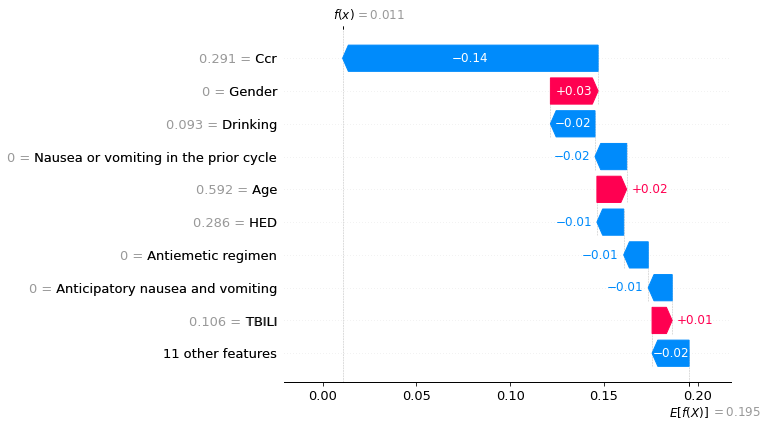

In [256]:
shap_values.base_values = shap_values.base_values[0]
shap.plots.waterfall(shap_values[1])

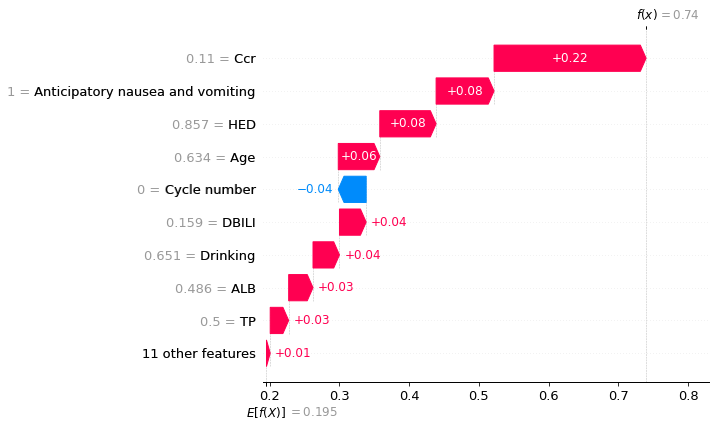

In [258]:
shap.plots.waterfall(shap_values[97])

###### Accuracy, recall, F1-score and other basic indexes of the model

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, confusion_matrix,accuracy_score

In [12]:
def plot_cm(labels,y_pred):
    cm = confusion_matrix(labels,  y_pred)
    #auc_score = roc_auc_score(labels,predictions)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    #print(classification_report(labels,predictions > p))
    #print('AUC:',auc_score)
    return

In [13]:
def get_p(labels, predictions):
    best1 = 0
    p1 = 0
    for p in np.arange(0,1,0.001):
        auc_score = roc_auc_score(labels,predictions > p)
        if auc_score > best1:
            best1 = auc_score
            p1 = p
    return p1

最佳阈值: 0.198
[[262  61]
 [  5  22]]
              precision    recall  f1-score   support

           0    0.98127   0.81115   0.88814       323
           1    0.26506   0.81481   0.40000        27

    accuracy                        0.81143       350
   macro avg    0.62317   0.81298   0.64407       350
weighted avg    0.92602   0.81143   0.85048       350



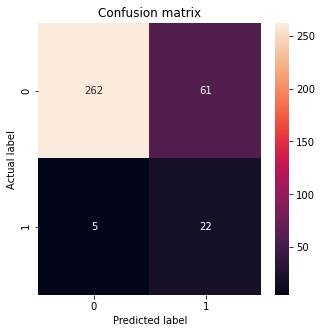

In [14]:
#deepforest
p = get_p(testy_deepforest, predy_deepforest)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_deepforest)):
    if  predy_deepforest[i] > p: 
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_deepforest, pred_y_thr)
print(confusion_matrix(testy_deepforest, pred_y_thr))
print(classification_report(testy_deepforest, pred_y_thr, digits=5))

In [15]:
precision = precision_score(testy_deepforest, pred_y_thr)
recall = recall_score(testy_deepforest, pred_y_thr)
f1score = f1_score(testy_deepforest, pred_y_thr)
accuracy = accuracy_score(testy_deepforest, pred_y_thr)
print('precison:',precision)
print('recall:',recall)
print('f1score:',f1score)
print('accuracy:',accuracy)

precison: 0.26506024096385544
recall: 0.8148148148148148
f1score: 0.4
accuracy: 0.8114285714285714


In [10]:
roc_auc_score(testy_deepforest, pred_y_thr)

0.8129801628253641

最佳阈值: 0.08600000000000001
[[191 131]
 [  1  27]]
              precision    recall  f1-score   support

           0    0.99479   0.59317   0.74319       322
           1    0.17089   0.96429   0.29032        28

    accuracy                        0.62286       350
   macro avg    0.58284   0.77873   0.51676       350
weighted avg    0.92888   0.62286   0.70696       350



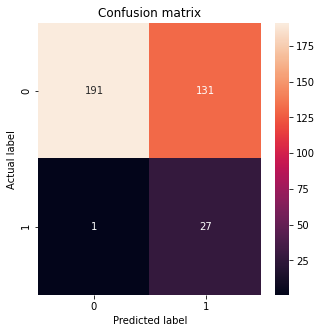

In [27]:
#keras
p = get_p(testy_keras, predy_keras)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_keras)):
    if  predy_keras[i] > p:
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_keras, pred_y_thr)
print(confusion_matrix(testy_keras, pred_y_thr))
print(classification_report(testy_keras, pred_y_thr, digits=5))

In [29]:
roc_auc_score(testy_keras, pred_y_thr)

0.7787267080745343

最佳阈值: 0.079
[[175 130]
 [  3  42]]
              precision    recall  f1-score   support

           0    0.98315   0.57377   0.72464       305
           1    0.24419   0.93333   0.38710        45

    accuracy                        0.62000       350
   macro avg    0.61367   0.75355   0.55587       350
weighted avg    0.88814   0.62000   0.68124       350



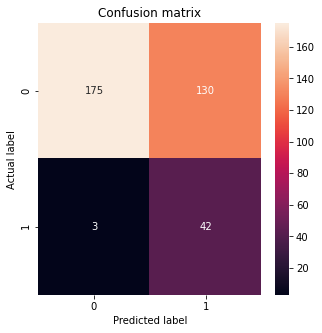

In [16]:
#catboost
p = get_p(testy_cb, predy_cb)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_cb)):
    if  predy_cb[i] > p:
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_cb, pred_y_thr)
print(confusion_matrix(testy_cb, pred_y_thr))
print(classification_report(testy_cb, pred_y_thr, digits=5))

In [18]:
roc_auc_score(testy_cb, pred_y_thr)

0.7535519125683059

最佳阈值: 0.081
[[245  70]
 [ 11  24]]
              precision    recall  f1-score   support

           0    0.95703   0.77778   0.85814       315
           1    0.25532   0.68571   0.37209        35

    accuracy                        0.76857       350
   macro avg    0.60618   0.73175   0.61512       350
weighted avg    0.88686   0.76857   0.80954       350



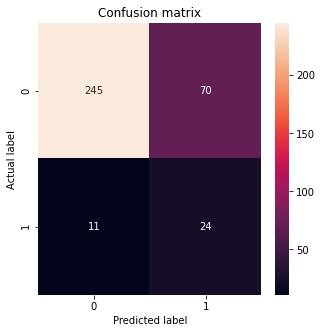

In [20]:
#Decision tree
p = get_p(testy_dt, predy_dt)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_dt)):
    if  predy_dt[i] > p:
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_dt, pred_y_thr)
print(confusion_matrix(testy_dt, pred_y_thr))
print(classification_report(testy_dt, pred_y_thr, digits=5))

In [21]:
roc_auc_score(testy_dt, pred_y_thr)

0.7317460317460317

最佳阈值: 0.47700000000000004
[[216  86]
 [ 12  36]]
              precision    recall  f1-score   support

           0    0.94737   0.71523   0.81509       302
           1    0.29508   0.75000   0.42353        48

    accuracy                        0.72000       350
   macro avg    0.62123   0.73262   0.61931       350
weighted avg    0.85791   0.72000   0.76139       350



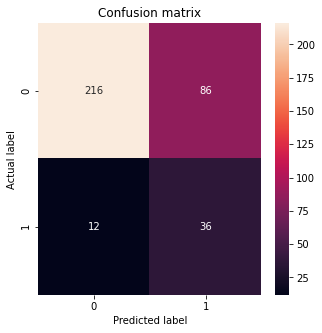

In [22]:
#SVM
p = get_p(testy_svm, predy_svm)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_svm)):
    if  predy_svm[i] > p:
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_svm, pred_y_thr)
print(confusion_matrix(testy_svm, pred_y_thr))
print(classification_report(testy_svm, pred_y_thr, digits=5))

In [24]:
roc_auc_score(testy_svm, pred_y_thr)

0.732615894039735

最佳阈值: 0.14
[[240  77]
 [  7  26]]
              precision    recall  f1-score   support

           0    0.97166   0.75710   0.85106       317
           1    0.25243   0.78788   0.38235        33

    accuracy                        0.76000       350
   macro avg    0.61204   0.77249   0.61671       350
weighted avg    0.90385   0.76000   0.80687       350



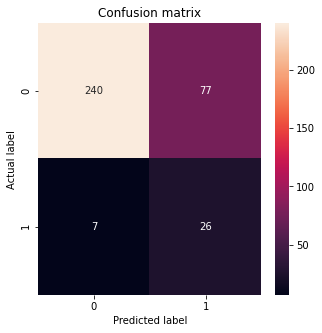

In [25]:
#Random forest
p = get_p(testy_rf, predy_rf)
print('Optimal threshold:',p)
pred_y_thr = []
for i in range(len(testy_rf)):
    if  predy_rf[i] > p: 
        pred_y_thr.append(1)
    else:
        pred_y_thr.append(0)
plot_cm(testy_rf, pred_y_thr)
print(confusion_matrix(testy_rf, pred_y_thr))
print(classification_report(testy_rf, pred_y_thr, digits=5))

In [26]:
roc_auc_score(testy_rf, pred_y_thr)

0.7724882898384475

###### PDP partial dependency graph

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

In [9]:
PartialDependenceDisplay.from_estimator(modeldeepforest_nostn, testx_deepforest_nostn, features= ['Age'],subsample=119,
    kind='both')

NameError: name 'modeldeepforest_nostn' is not defined